# Objetivo del proceso a realizar				
## Objetivos del desafío 1			
- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.		
- Realizar un análisis descriptivo de las principales variables.		
- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.		

### 1) Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x) # Evita la notacion cientifica
pd.set_option('display.max_columns', 500) # Ancho de cantidad de columnas
# pd.set_option('display.max_colwidth', None) #Ancho de lo que tiene dentro la columna

In [2]:
path = '~/Desktop/Data/properatti.csv'
data = pd.read_csv(path, sep = ",", index_col='Unnamed: 0')

In [3]:
df = data.copy()

### 2) Analisis General del Data Set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

Revisamos el porcentaje de nulos

In [5]:
df.isnull().sum()/df.shape[0]*100

operation                     0.000
property_type                 0.000
place_name                    0.019
place_with_parent_names       0.000
country_name                  0.000
state_name                    0.000
geonames_id                  15.441
lat-lon                      42.526
lat                          42.526
lon                          42.526
price                        16.837
currency                     16.838
price_aprox_local_currency   16.837
price_aprox_usd              16.837
surface_total_in_m2          32.443
surface_covered_in_m2        16.422
price_usd_per_m2             43.395
price_per_m2                 27.687
floor                        93.484
rooms                        60.906
expenses                     88.235
properati_url                 0.000
description                   0.002
title                         0.000
image_thumbnail               2.567
dtype: float64

Transformamos a category las variables currency state_name country_name place_with_parent_names place_name property_type operation.

Transformamos a string las variables title description properati_url


In [6]:
df.iloc[:,1:6]=df.iloc[:,1:6].astype('category')
df.iloc[:,22:25]=df.iloc[:,22:25].astype(str)
df['currency']=df.currency.astype('category')

In [7]:
df.dtypes

operation                       object
property_type                 category
place_name                    category
place_with_parent_names       category
country_name                  category
state_name                    category
geonames_id                    float64
lat-lon                         object
lat                            float64
lon                            float64
price                          float64
currency                      category
price_aprox_local_currency     float64
price_aprox_usd                float64
surface_total_in_m2            float64
surface_covered_in_m2          float64
price_usd_per_m2               float64
price_per_m2                   float64
floor                          float64
rooms                          float64
expenses                       float64
properati_url                   object
description                     object
title                           object
image_thumbnail                 object
dtype: object

### 3) Analisis de duplicados

Vamos a ver si tenemos inmuebles duplicados en nuetro dataset.

Definimos que tenemos un duplicado si coinciden las filas "price", "place_name", "title", "surface_total_in_m2"

In [8]:
df.duplicated(['price','place_name','title','surface_total_in_m2']).any()

True

Nos muestra que tenemos duplicados, vamos a estudiarlos

In [9]:
duplicados_mask=df.duplicated(['price','place_name','title','surface_total_in_m2'], keep=False)


df[duplicados_mask].sort_values(['price','place_name','title','surface_total_in_m2'])[:20]


operation property_type            place_name  \
47708       sell     apartment               Florida   
47715       sell     apartment               Florida   
47717       sell     apartment               Florida   
28938       sell     apartment             San Telmo   
88036       sell     apartment             San Telmo   
48580       sell         house     Barrio Alto Camet   
48581       sell         house     Barrio Alto Camet   
48588       sell         house     Barrio Alto Camet   
94684       sell         store                 Lanús   
94694       sell         store                 Lanús   
94705       sell         store                 Lanús   
33524       sell     apartment         Mar del Plata   
63768       sell     apartment         Mar del Plata   
115661      sell     apartment               Córdoba   
115694      sell     apartment               Córdoba   
99138       sell     apartment         Villa Urquiza   
99162       sell     apartment         Villa Urquiza   
26300       sell     apartment              Congreso   
26507       sell     apartment              Congreso   
6446        sell         store  Centro / Microcentro   

                                  place_with_parent_names country_name  \
47708   |Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...    Argentina   
47715   |Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...    Argentina   
47717   |Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...    Argentina   
28938               |Argentina|Capital Federal|San Telmo|    Argentina   
88036               |Argentina|Capital Federal|San Telmo|    Argentina   
48580   |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
48581   |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
48588   |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
94684      |Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|    Argentina   
94694      |Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|    Argentina   
94705      |Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|    Argentina   
33524   |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
63768   |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
115661                        |Argentina|Córdoba|Córdoba|    Argentina   
115694                        |Argentina|Córdoba|Córdoba|    Argentina   
99138           |Argentina|Capital Federal|Villa Urquiza|    Argentina   
99162           |Argentina|Capital Federal|Villa Urquiza|    Argentina   
26300                |Argentina|Capital Federal|Congreso|    Argentina   
26507                |Argentina|Capital Federal|Congreso|    Argentina   
6446     |Argentina|Capital Federal|Centro / Microcentro|    Argentina   

                          state_name  geonames_id  \
47708       Bs.As. G.B.A. Zona Norte  3433908.000   
47715       Bs.As. G.B.A. Zona Norte  3433908.000   
47717       Bs.As. G.B.A. Zona Norte  3433908.000   
28938                Capital Federal  3428113.000   
88036                Capital Federal  3428113.000   
48580   Buenos Aires Costa Atlántica          NaN   
48581   Buenos Aires Costa Atlántica          NaN   
48588   Buenos Aires Costa Atlántica          NaN   
94684         Bs.As. G.B.A. Zona Sur          NaN   
94694         Bs.As. G.B.A. Zona Sur          NaN   
94705         Bs.As. G.B.A. Zona Sur          NaN   
33524   Buenos Aires Costa Atlántica  3430863.000   
63768   Buenos Aires Costa Atlántica  3430863.000   
115661                       Córdoba  3860259.000   
115694                       Córdoba  3860259.000   
99138                Capital Federal  3433775.000   
99162                Capital Federal  3433775.000   
26300                Capital Federal  3435259.000   
26507                Capital Federal  3435259.000   
6446                 Capital Federal  3435548.000   

                              lat-lon     lat     lon     price currency  \
47708           -34.535975,-58.478594 -34.536 -58.479 20000.000      USD   
47715    

Luego de observar el dataframe de duplicados, podemos comprobar que efectivamente lo son, asi que procedemos a dropearlos.

In [10]:
df = df.drop_duplicates(['price','place_name','title','surface_total_in_m2'])


Verificamos que todas las propiedades provistas estan para la venta, y ninguna en renta, con lo cual la columna 'operation' no nos aporta mucha informacion.

In [11]:
df.operation.unique()

array(['sell'], dtype=object)

Vamos a revisar los valores estadisticos de las variables numericas de nuestro Data set

In [12]:
cols=['price','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']
df[cols].describe()

price  price_aprox_local_currency  price_aprox_usd  \
count     94699.000                   94699.000        94699.000   
mean     465578.488                 4287216.602       242977.506   
std     2307937.712                 7044238.337       399231.394   
min           0.000                       0.000            0.000   
25%      110000.000                 1588005.000        90000.000   
50%      185000.000                 2579925.850       146217.000   
75%      420000.000                 4764015.000       270000.000   
max   650000000.000               821271104.300     46545445.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
count            74106.000              91858.000         64887.000   
mean               242.941                137.460          2141.952   
std               1739.620                759.461          2744.342   
min                  0.000                  0.000             0.600   
25%                 51.000                 46.000          1200.000   
50%                 88.000                 77.000          1795.455   
75%                214.000                157.000          2481.481   
max             200000.000             187000.000        206333.333   

       price_per_m2  
count     82363.000  
mean       6772.532  
std       28822.614  
min           1.510  
25%        1534.942  
50%        2200.000  
75%        3333.333  
max     3999999.960

Aca podemos observar algunos valores extraños en el data set:

* El valor minimo de superficie total, es 0.

* El valor minimo de venta es 0.

* El valor maximo de superficie llega a 20 hectareas


### 4) Analisis de columnas

**Analisis Descriptivo de las principales variables:**

Podemos separar a nuestras variables en 3 grandes grupos por su tipo:

Variables georeferenciales:

* geonames_id                  
* lat-lon                       
* lat                           
* lon                           

Variables relacionadas con el precio del inmueble: 

* price_per_m2: Es nuestra variable objetivo, es la que vamos a querer predecir en la siguiente etapa del trabajo, nos representa el precio por metro cuadrado del inmueble.VARIABLE CONTINUA

* price_usd_per_m2: Esta variable nos indica el valor en dolares por metro cuadrado del inmueble publicado.VARIABLE CONTINUA

* price: Esta variable nos indica el precio del inmueble expresado en la moneda "currency".VARIABLE CONTINUA

* currency: Esta variable nos indica la moneda en la que se publico el inmueble, puede valer (usd,ars,uyu,pen).VARIABLE CATEGORICA

Variables relacionadas con el tamaño del inmueble:

* surface_total_in_m2: Esta variable nos indica los metros cuadrados totales de la propiedad publicada.VARIABLE CONTINUA

* surface_covered_in_m2: Esta variable nos indica los metros cuadrados cubiertos de la propiedad publicada.VARIABLE CONTINUA

Variables que nos dan informacion sobre el lugar donde se encuentra la propiedad

* property_type: Nos indica el tipo de propiedad publicada (ph, apartment, house, store).VARIABLE CATEGORICA

* place_name: Nos indica el barrio(si es dentro de CABA) o localidad, de donde esta la propiedad publicada.VARIABLE CATEGORICA

* state_name: Nos indica la provincia en donde se encuentra la propiedad publicada.VARIABLE CATEGORICA

* place_with_parent_names: Es una combinacion de place_name y state_name, en algunos casos, con algunos datos mas sobre la ubicacion, como el partido. place_with_parent_names = |country_name|state_name|place_name|.VARIABLE CATEGORICA

Variables relacionadas con caracteristicas del inmueble:

* floor: Numero de piso en donde esta ubicado el inmueble(en caso de corresponder).VARIABLE CUALITATIVA ORDINAL

* rooms: Esta variable nos indica la cantidad de ambientes que posee el inmueble.VARIABLE CATEGORICA

* expenses: Valor de las expensas del inmueble (en caso de corresponder).VARIABLE CONTINUA

* description: Una breve descripcion sobre la propiedad en venta.

### 5) Análisis inicial de la distribución de los datos

In [13]:
#Para evitar problemas con los strings, convertimos todo el df en minuscula y eliminamos los ".".
df = df.applymap(lambda x: x.lower() if type(x) is str else x)

df = df.replace('\.',"",regex=True)


Droppeamos valores ilogicos, por ejemplo que un valor de superficie total sea menor que el de superficie cubierta, que alguna de las superficies valga 0, o que el precio de venta sea 0

In [14]:
sup_total_incorrecta = np.logical_or(df['surface_total_in_m2'] < df['surface_covered_in_m2'], df['surface_total_in_m2']==0)

df_sup_total_incorrecta=df[sup_total_incorrecta]
df_sup_total_incorrecta.shape

(1398, 25)

In [15]:
df.drop(index=df_sup_total_incorrecta.index, inplace=True)

In [16]:
df[sup_total_incorrecta]

<ipython-input-16-b1fafb12e45e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[sup_total_incorrecta]


Empty DataFrame
Columns: [operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail]
Index: []

In [17]:
precio_incorrecto = df[df.price == 0]
precio_incorrecto

operation property_type place_name place_with_parent_names country_name  \
9761      sell         house    córdoba     |argentina|córdoba|    argentina   

     state_name  geonames_id               lat-lon   lat     lon  price  \
9761    córdoba  3860255.000  45458426,-7567893099 4.546 -75.679  0.000   

     currency  price_aprox_local_currency  price_aprox_usd  \
9761      NaN                       0.000            0.000   

      surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
9761                  NaN                    NaN               NaN   

      price_per_m2  floor  rooms  expenses  \
9761           NaN  2.000  3.000       NaN   

                                          properati_url  \
9761  http://wwwproperaticomar/165i3_venta_casa_cord...   

                             description  \
9761  casa en venta de 2 dorm en armenia   

                                      title  \
9761  se vende casa en el barrio el limonar   

                                        image_thumbnail  
9761  https://thumbs4properaticom/2/2hubkpzv0rywdaaj...

In [18]:
df.drop(index = precio_incorrecto.index ,inplace= True)

Dropeamos propiedades falsas

In [19]:
patron_falsas = re.compile(r'estas(\s)?propiedades(\s)?son(\s)?falsas')

encuentra_falsas = df.description.apply(lambda x: re.search(patron_falsas,str(x)))
falsas_mask=encuentra_falsas.notnull()
index_maldad=encuentra_falsas[falsas_mask].index

df = df.drop(index_maldad)

Dropeamos departamentos que tengan mas de 750 m2 (limite tomado a partir de publicaciones de zonaprop), y los que tengan menos de 18 m2(minimo permitido)

In [20]:
departamentos_fueradeumbral = \
df[np.logical_and(df.property_type=='apartment',np.logical_or(df.surface_total_in_m2>750, df.surface_total_in_m2<18))].index

In [21]:
df = df.drop(index =departamentos_fueradeumbral)

Dropeamos inmuebles que sean ventas de pozo, o para inversion, inmuebles que aun no fueron construidos, y por eso tienen un precio "promocionado"

In [22]:
patron_pozo = re.compile(r'pozo|inversion|financiacion|pre-venta|en(\s)?construccion|entrega|cuotas|emprendimiento|a(\s)?desarrollarse|proyecto')

encuentra_pozo = df.description.apply(lambda x: re.search(patron_pozo,str(x)))
                                      
pozo_mask=encuentra_pozo.notnull()

pozo = encuentra_pozo[pozo_mask].apply(lambda x: x.group())
print(df.shape)
df = df.drop(index = pozo.index)
print(df.shape)

patron_pozo = re.compile(r'pozo|inversion|financiacion|pre-venta|en(\s)?construccion|entrega|cuotas|emprendimiento|a(\s)?desarrollarse|proyecto')

encuentra_pozo = df.title.apply(lambda x: re.search(patron_pozo,str(x)))
                                      
pozo_mask=encuentra_pozo.notnull()

pozo = encuentra_pozo[pozo_mask].apply(lambda x: x.group())
print(df.shape)
df = df.drop(index = pozo.index)
print(df.shape)

(107839, 25)
(87535, 25)
(87535, 25)
(86869, 25)


In [23]:
df[df.place_name=='capital federal'].title[:5]

108    casa 180m² con 2 plantas en navarro, julián 29...
110    casa 744m² con 2 plantas en del valle iberluce...
115    casa 720m² con plantas en palma, diego 1800, a...
119    casa 200m² con cochera en barbosa, gerónimo 14...
121    casa 340m² con cochera en palma, diego 1300, a...
Name: title, dtype: object

In [24]:
place_names=list(df[df.state_name=='capitalfederal'].place_name.unique())

In [25]:
df["PLACE NAME"]=df.place_name

df_capitalfederal_mal_cargado = df[df.place_name=='capital federal']

for place in place_names:
    patron_placenames = re.compile(str(place))
    encuentra_names = df_capitalfederal_mal_cargado.description.apply(lambda x: re.search(patron_placenames,str(x)))
    encuentra_names_mask = encuentra_names.notnull()
    names = encuentra_names[encuentra_names_mask].apply(lambda x: x.group())
    df.loc[names.index,'PLACE NAME']=names
    
for place in place_names:
    patron_placenames = re.compile(str(place))
    encuentra_names = df_capitalfederal_mal_cargado.title.apply(lambda x: re.search(patron_placenames,str(x)))
    encuentra_names_mask = encuentra_names.notnull()
    names = encuentra_names[encuentra_names_mask].apply(lambda x: x.group())
    df.loc[names.index,'PLACE NAME']=names


Eliminamos los pocos registros que no tenian informacion sobre su ubicacion y estaban mal ingresados.

In [26]:
df_mal_ingresados = df[df["PLACE NAME"]=='capital federal']
df_mal_ingresados.shape[0]
df_mal_ingresados_index = df_mal_ingresados.index

In [27]:
df = df.drop(df_mal_ingresados_index)

Revisamos para capital federal los valores.

Separamos las columnas que consideramos tengan alguna relacion con el precio_per_m2 o nos puedan brindar informacion util 

In [28]:
cols_utiles_sin_price=['property_type','PLACE NAME','place_with_parent_names','state_name','currency'\
            ,'price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2'\
            ,'price_usd_per_m2','price_per_m2','floor','rooms','expenses','description']

In [29]:
groupby_property_type=df.groupby('property_type')[cols_utiles_sin_price].median()
groupby_property_type

price_aprox_local_currency  price_aprox_usd  \
property_type                                                
apartment                     2117340.000       120000.000   
house                         4146457.500       235000.000   
ph                            2117340.000       120000.000   
store                         3617122.500       205000.000   

               surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
property_type                                                                 
apartment                   61.000                 55.000          2146.552   
house                      283.000                180.000          1038.462   
ph                          98.000                 75.000          1306.818   
store                      167.500                120.000          1555.556   

               price_per_m2  floor  rooms  expenses  
property_type                                        
apartment          2537.037  3.000  2.000  1800.000  
house              1506.024  2.000  4.000  4800.000  
ph                 1703.203  2.000  3.000   500.000  
store              1931.034  1.000  1.000  1111.000

Dado que 'price', depende del valor de currency, si esta en usd o en ars, vamos a calcularlos por separados, para no crear un bias.

In [30]:
groupby_property_type_price_usd=df[df.currency=='usd'].groupby('property_type')['price'].median()
groupby_property_type_price_ars=df[df.currency=='ars'].groupby('property_type')['price'].median()

groupby_property_type['price_usd']=groupby_property_type_price_usd
groupby_property_type['price_ars']=groupby_property_type_price_ars
groupby_property_type['cant de propiedades']=df.groupby('property_type')['operation'].count()

groupby_property_type

price_aprox_local_currency  price_aprox_usd  \
property_type                                                
apartment                     2117340.000       120000.000   
house                         4146457.500       235000.000   
ph                            2117340.000       120000.000   
store                         3617122.500       205000.000   

               surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
property_type                                                                 
apartment                   61.000                 55.000          2146.552   
house                      283.000                180.000          1038.462   
ph                          98.000                 75.000          1306.818   
store                      167.500                120.000          1555.556   

               price_per_m2  floor  rooms  expenses  price_usd   price_ars  \
property_type                                                                
apartment          2537.037  3.000  2.000  1800.000 129000.000 1360500.000   
house              1506.024  2.000  4.000  4800.000 250000.000 1400000.000   
ph                 1703.203  2.000  3.000   500.000 123000.000 1020000.000   
store              1931.034  1.000  1.000  1111.000 230000.000  900000.000   

               cant de propiedades  
property_type                       
apartment                    43916  
house                        33732  
ph                            4934  
store                         3384

In [31]:
df_toplot=groupby_property_type.reset_index()

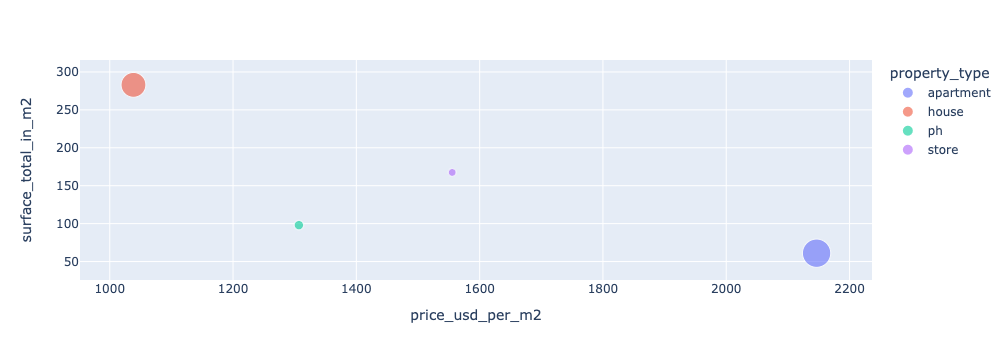

In [428]:
fig = px.scatter(data_frame = df_toplot, x = "price_usd_per_m2", y = "surface_total_in_m2",
                 size = "cant de propiedades", color = "property_type", opacity = 0.6)
fig.show()


Al agrupar las propiedades por su tipo, podemos realizar las siguientes observaciones:

*  Las casas son las propiedades que tienen el precio mas bajo en relacion a sus metros cuadrados.

*  Los departamentos son las propiedades que mayor valor por metro cuadrado tienen.

*  La mayoria de los inmuebles publicados son departamentos, seguidos por las casas.

In [33]:
groupby_provincia_price_usd=df[df.currency=='usd'].groupby('state_name')['price'].median()
groupby_provincia_price_ars=df[df.currency=='ars'].groupby('state_name')['price'].median()

groupby_provincia=df.groupby('state_name')[cols_utiles_sin_price].median()

groupby_provincia['price_usd']=groupby_provincia_price_usd
groupby_provincia['price_ars']=groupby_provincia_price_ars
groupby_provincia['cant de propiedades']=df.groupby('state_name')[cols_utiles_sin_price].count().property_type


groupby_provincia=groupby_provincia.sort_values('cant de propiedades',ascending=False)
groupby_provincia


price_aprox_local_currency  price_aprox_usd  \
state_name                                                                  
capital federal                              2911342.500       165000.000   
bsas gba zona norte                          4234680.000       240000.000   
bsas gba zona sur                            2521399.050       142900.000   
córdoba                                      1830701.560       103754.800   
buenos aires costa atlántica                 1764450.000       100000.000   
bsas gba zona oeste                          2117340.000       120000.000   
santa fe                                     1499782.500        85000.000   
buenos aires interior                        2293785.000       130000.000   
río negro                                    2823120.000       160000.000   
mendoza                                      2293785.000       130000.000   
corrientes                                   3087787.500       175000.000   
tucumán                                      1632787.790        92538.060   
neuquén                                      2558452.500       145000.000   
misiones                                     1484352.560        84125.510   
entre ríos                                   1679246.915        95171.125   
salta                                        1729161.000        98000.000   
chubut                                       3352455.000       190000.000   
san luis                                     2284896.140       129496.225   
la pampa                                     1682266.330        95342.250   
chaco                                        2284896.140       129496.225   
san juan                                     8411331.650       476711.250   
tierra del fuego                             2177050.390       123384.080   
jujuy                                        2454129.570       139087.510   
santa cruz                                   2473921.050       140209.190   
catamarca                                    5999130.000       340000.000   
formosa                                      1367833.835        77521.825   
santiago del estero                          3176010.000       180000.000   
la rioja                                     1286438.790        72908.770   

                              surface_total_in_m2  surface_covered_in_m2  \
state_name                                                                 
capital federal                            71.000                 63.000   
bsas gba zona norte                       192.000                139.000   
bsas gba zona sur                         132.000                102.000   
córdoba                                    90.000                100.000   
buenos aires costa atlántica               75.000                 69.000   
bsas gba zona oeste                       173.000                 94.000   
santa fe                                   70.000                 62.000   
buenos aires interior                     249.500                120.000   
río negro                                 175.000                125.000   
mendoza                                   164.500                120.000   
corrientes                                150.000                140.000   
tucumán                                   128.000                 95.500   
neuquén                                   115.500                 95.000   
misiones                                  225.000                 90.000   
entre ríos                                182.500                100.000   
salta                                     184.000                 99.000   
chubut                                    140.000                120.000   
san luis                                  240.000                113.000   
la pampa                                  130.000                116.500   
chaco                                     205.000                146.000   
san juan                                   70.0

In [34]:
groupby_provincia_toplot=groupby_provincia.reset_index()

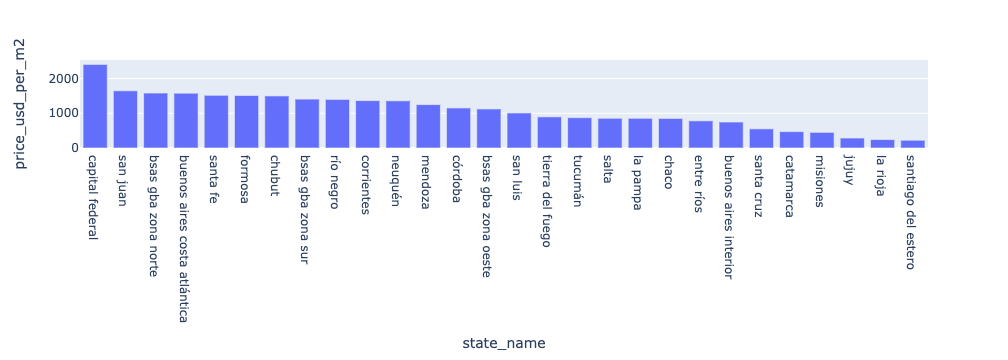

In [35]:
fig = px.bar(groupby_provincia_toplot, x="state_name", y="price_usd_per_m2",  barmode='stack')

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}) #Ordena manera decreciente


fig.show()

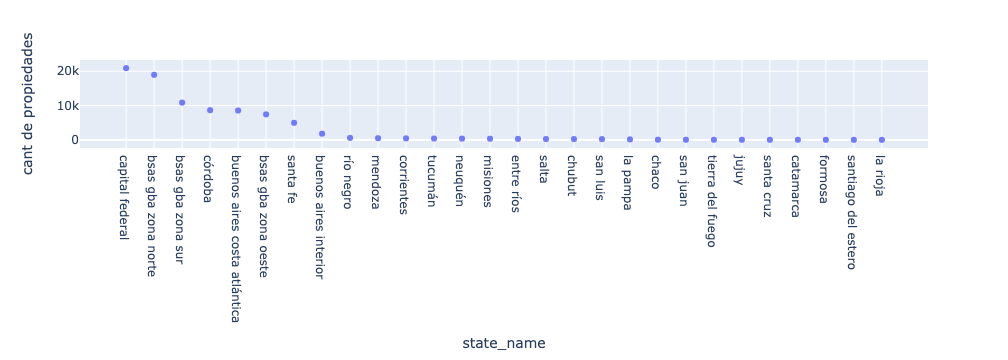

In [422]:
fig = px.scatter(data_frame = groupby_provincia_toplot, y = "cant de propiedades", x = "state_name"
                  ,opacity = 0.9)
fig.show()

Al agrupar las propiedades por provincia, podemos realizar las siguientes observaciones:

*  Las propiedades que se encuentran en capital federal, son las que tienen un precio por metro cuadrado en usd mas alto.

*  La mayor cantidad de propiedades en venta, se encuentran en capital federal, salvo que juntemos todas las subdivisiones de      provincia de buenos aires, en ese caso, seria la Provincia de Buenos Aires, la que ofrece mayor cantidad.


### 6) Analisis de consistencia y calidad de los datos

## place_with_parent_names

place_with_parent_names = |country_name|state_name|place_name|, con lo cual, no nos da informacion extra, y es mas facil utilizar para los groupby sus columnas "hijas", con lo cual, la utilizaremos para completar "place_name" y "Provincia, que tiene algunos nulos y luego la descartaremos.


Vamos a comprobar si podemos completar place_name, con place_with_parent_names. Para esto, vamos a eliminar las filas donde haya NaN en place_name y comparar si es igual al anteultimo elemento de place_with_parent_names, al aplicarle un split(el ultimo es el pipe).

In [37]:
place_name_tester=df.place_with_parent_names.apply(lambda x: x.split('|')[-2])
place_name_tester

0           mataderos
1            la plata
2           mataderos
3             liniers
4              centro
             ...     
121213       martínez
121214     san isidro
121215       belgrano
121216         beccar
121218    plaza colón
Name: place_with_parent_names, Length: 85966, dtype: object

In [38]:
place_name_null_mask = df.place_name.isnull()

In [39]:
(place_name_tester[~place_name_null_mask]==df.place_name[~place_name_null_mask]).all()

True

Comprobamos que podemos imputar el valor de place_name , a partir de la columna place_with_parent_names, asi que vamos a imputarlo, creando una nueva columna, que utilice la informacion de los registros anteriores

In [40]:
df.loc[place_name_null_mask,'PLACE NAME']=place_name_tester

df['PLACE NAME'].isnull().sum()

0

Nota: Esto ocurre para todos los casos salvo para cuando la propiedad esta radicada en mar del plata

In [41]:
df_mardelplata_centro=df[np.logical_and(df.state_name!='capital federal', df['PLACE NAME']=='centro')]

df.loc[df_mardelplata_centro.index,'PLACE NAME'] = 'mar del plata'

In [42]:
patron_microcentro = re.compile(r'centro')

encontra_microcentro = df['PLACE NAME'].apply(lambda x: re.match(patron_microcentro,str(x)))

encontra_microcentro_mask = encontra_microcentro.notnull()

index_microcentro=encontra_microcentro[encontra_microcentro_mask].index

df.loc[index_microcentro,'PLACE NAME']='centro/microcentro'

Si bien no hay valores np.NaN, podemos ver que hay una categoria 'nan', que nos quedo, son pocos valores, y todos corresponden a la misma ubicacion "fernandez", que hace referencia a San Isidro, Av Juan Fernandez.

In [43]:
df[df['PLACE NAME']=='nan']

Empty DataFrame
Columns: [operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail, PLACE NAME]
Index: []

In [44]:
fila_fernandez = df[df['PLACE NAME']=='nan'].index
df.loc[fila_fernandez,'PLACE NAME']='san isidro'

In [45]:
fernandez_index=df[np.logical_and(df['PLACE NAME']=='san isidro', df.place_name=='capital federal')].index

df.loc[fernandez_index,'place_name'] = 'san isidro'


## surface_covered_in_m2

Vamos a imputar los valores NaN de surface_covered_in_m2, con informacion que encontremos el la variable description y ponerlos en una nueva columna que llamaremos SUPERFICIE CUBIERTA EN M2

Vamos a imputar valores de surface_covered_in_m2, a partir de datos obtenidos de la columna description

Para lo que es superficie cubierta, utilizamos un criterio para acotar de 404.9m2 maximo(quantile 90), para lo que serian casos como grandes depositos y 65m2, como minimo(quantile 10)

In [47]:
df['SUPERFICIE CUBIERTA EN M2']=df.surface_covered_in_m2

surface_covered_in_m2_null_mask=df.surface_covered_in_m2.isna()
patron_superficie_cubierta = re.compile(r'(cub(:)?\d+(m²|m2))|((cubierta|cub)(de)?(\d+))((m²|m2))|\d+(m²|m2)(cub)')

encuentra_superficie_cubierta = df.loc[surface_covered_in_m2_null_mask,'description'].apply(lambda x: re.search(patron_superficie_cubierta,str(x)))

encuentra_superficie_cubierta_mask=encuentra_superficie_cubierta.notnull()

superficie_cubierta=encuentra_superficie_cubierta[encuentra_superficie_cubierta_mask].apply(lambda x: x.group())

patron_limpiame_sup_cubierta = re.compile(r'\d+')
limpiame_sup_cubierta = superficie_cubierta.apply(lambda x: re.search(patron_limpiame_sup_cubierta,str(x)))

superficie_cubierta_str=limpiame_sup_cubierta.apply(lambda x: x.group())

superficie_cubierta_int = superficie_cubierta_str.astype(int)

superficie_cubierta_int_acotado_mask = np.logical_and(superficie_cubierta_int < superficie_cubierta_int.quantile(0.9),superficie_cubierta_int > superficie_cubierta_int.quantile(0.1))

superficie_cubierta_int_acotado=superficie_cubierta_int[superficie_cubierta_int_acotado_mask]

In [48]:
df.loc[surface_covered_in_m2_null_mask,'SUPERFICIE CUBIERTA EN M2'] = superficie_cubierta_int_acotado

## surface_total_in_m2

Vamos a completar valores a partir de datos que aparecen en description, creando una nueva columna llamada SUPERFICIE TOTAL EN M2

Utilizamos como criterio para acotar, el valor maximo de superficie total de 700m2(q3), y como minimo 44m2

Elegimos acotar los valores obtenidos con Regex, para no generar un bias, a partir de datos erroneos que haya tomado el patron.

In [49]:
df['SUPERFICIE TOTAL EN M2']=df.surface_total_in_m2

surface_total_in_m2_null_mask=df.surface_total_in_m2.isna()

patron_superficie_total = re.compile(r'(sup(\s)?cub(:)?(\s)?\d+(m²|m2|mts2))|((cubierta|cub)(\s)?(de)?(\s)?(\d+))((m²|m2|mts2))|\d+(\s)?(m²|m2|mts2)(\s)?(cub)|\d+\d+?(m²|m2|mts2)')

encuentra_superficie_total = df.loc[surface_total_in_m2_null_mask,'description'].apply(lambda x: re.search(patron_superficie_total,str(x)))

encuentra_superficie_total_mask=encuentra_superficie_total.notnull()

superficie_total_y_cubierta=encuentra_superficie_total[encuentra_superficie_total_mask].apply(lambda x: x.group())

patron_cubierta = re.compile(r'cub')

valores_sup_cubierta=superficie_total_y_cubierta.apply(lambda x:re.search(patron_cubierta,str(x)))

superficie_total=superficie_total_y_cubierta[valores_sup_cubierta.isnull()]


superficie_total_sin_m2=(superficie_total.replace('(m²|m2|mts2)','', regex=True))

superficie_total_int = superficie_total_sin_m2.astype(int)
superficie_total_int_acotado_mask = np.logical_and(superficie_total_int < superficie_total_int.quantile(0.8), superficie_total_int > superficie_total_int.quantile(0.2))

superficie_total_int_acotado=superficie_total_int[superficie_total_int_acotado_mask]



In [50]:
df.loc[surface_total_in_m2_null_mask,'SUPERFICIE TOTAL EN M2'] = superficie_total_int_acotado


## Price

El precio price_usd_per_m2, coincide con price/surface_covered_in_m2, cuando currency ==usd, para esto nos vamos a crear una nueva columna llamada PRECIO USD POR M2

In [51]:
df_dolares = df[df.currency=='usd']

df['PRECIO USD POR M2']=df_dolares[['price','surface_total_in_m2']].apply(lambda x: 0 if x.surface_total_in_m2 == 0 else x.price/x.surface_total_in_m2, axis=1)


In [52]:
df[['PRECIO USD POR M2','price_usd_per_m2']].sample(10)

PRECIO USD POR M2  price_usd_per_m2
90244            2116.667          2116.667
41296                 NaN               NaN
102850                NaN               NaN
46005                 NaN               NaN
95453             792.079           792.079
47771                 NaN               NaN
77001            3604.061          3604.061
73981            1348.315          1348.315
27752            1890.034          1890.034
77357            1487.603          1487.603

In [53]:
df['PRECIO USD POR M2'].notnull().sum()

45046

In [54]:
df['price_usd_per_m2'].notnull().sum()

49158

Como PRECIO USD POR M2 es igual que price_usd_per_m2, vamos a imputar los valores que podamos de PRECIO USD POR M2 con price_usd_per_m2

In [55]:
PRECIO_USD_POR_M2_null = df['PRECIO USD POR M2'].isna()

df.loc[PRECIO_USD_POR_M2_null,'PRECIO USD POR M2'] = df.loc[PRECIO_USD_POR_M2_null,'price_usd_per_m2']

#### Los precios estan en distintas monedas.

In [56]:
df.currency.value_counts()

usd    67135
ars     7031
uyu        1
Name: currency, dtype: int64

##### Primero, vamos a estudiar los casos donde currency vale pen y uyu

In [57]:
df_currency_uyu=df[df.currency=='uyu']
df_currency_uyu.description.values

array(['casa con calefacción central, mendoza, san roque, por $ 650000000'],
      dtype=object)

In [58]:
df_currency_uyu

operation property_type place_name        place_with_parent_names  \
107390      sell         house  san roque  |argentina|mendoza|san roque|   

       country_name state_name  geonames_id lat-lon  lat  lon         price  \
107390    argentina    mendoza  3836586.000     NaN  NaN  NaN 650000000.000   

       currency  price_aprox_local_currency  price_aprox_usd  \
107390      uyu               405477284.730     22980378.290   

        surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
107390                  NaN                    NaN               NaN   

        price_per_m2  floor  rooms  expenses  \
107390           NaN    NaN    NaN       NaN   

                                            properati_url  \
107390  http://wwwproperaticomar/1by0s_venta_casa_san-...   

                                              description               title  \
107390  casa con calefacción central, mendoza, san roq...  casa - san vicente   

                                          image_thumbnail PLACE NAME  \
107390  https://thumbs4properaticom/2/pa0rbudkrk6ggvfy...  san roque   

        SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  
107390                        NaN                     NaN                NaN

In [59]:
#Dado que el valor esta en otra moneda y nos parece una suma ilogica el precio, vamos a dropearlo
df = df.drop(index = df_currency_uyu.index)


In [60]:
df[df.currency=='pen'].description.values

array([], dtype=object)

La descripcion que podemos encontrar, es un poco confusa sobre los precios que usariamos para imputar, ya que por ejemplo no nos queda claro en que tipo de moneda esta, por lo que optamos por dropear esta fila.

In [61]:
df[df.currency=='pen']

Empty DataFrame
Columns: [operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail, PLACE NAME, SUPERFICIE CUBIERTA EN M2, SUPERFICIE TOTAL EN M2, PRECIO USD POR M2]
Index: []

In [62]:
df.drop(index = df[df.currency=='pen'].index, inplace=True)
df.reset_index(drop=True,inplace=True)

#### **Ahora vamos a comprobar si columnas como 'price_aprox_local_currency' ,'price_aprox_usd' ,'place_with_parent_names' ,tienen alguna utilidad para nosotros, o la informacion que nos dan, las tenemos contenidas en otras columnas**

## 'price_aprox_local_currency', 'price_aprox_usd',

In [63]:
df[['price_aprox_local_currency','price_aprox_usd','price','currency']].sample(5)

price_aprox_local_currency  price_aprox_usd      price currency
33923                 6704910.000       380000.000 380000.000      usd
10948                         NaN              NaN        NaN      NaN
39191                 1674463.050        94900.000  94900.000      usd
62990                 1923250.500       109000.000 109000.000      usd
23895                 2329074.000       132000.000 132000.000      usd

Observando el dataset, vemos que price_aprox_local_currency(ars), se aproxima al valor de price, cuando currency esta en 'ars'

Tambien vemos que price_aprox_usd, coincide con el valor de price, cuando currency esta en 'usd'.


In [64]:
ars_mask = df.currency == 'ars'

df_ars=df[ars_mask]

rel = df_ars.price/df_ars.price_aprox_local_currency
relacion = rel.mean()
relacion

1.009915671255779

*Observamos que la relacion entre price y price_aprox_local_currency, es "relacion"*


Nuestro objetivo, es obtener informacion nueva de price_aprox_local_currency y price_aprox_usd, para completar PRICE USD POR M2, price, price_per_m2

Veamos primero si nos son utiles estas columnas para lo que queremos hacer.

In [65]:
notnull_price_aprox_local_currency=df.price_aprox_local_currency.notnull()
notnull_price_aprox_usd=df.price_aprox_usd.notnull()
price_ars_usd = np.logical_or((df.currency == 'usd'),(df.currency == 'ars'))
null_price_ars_usd=df.price[price_ars_usd].isnull()


price_local_o_price_usd=np.logical_or(notnull_price_aprox_local_currency,notnull_price_aprox_usd)

null_price_notnull_price_local_o_price_usd=np.logical_and(price_local_o_price_usd,null_price_ars_usd)

null_price_notnull_price_local_o_price_usd.any()

False

Por lo tanto, comprobamos que **NO HAY** ningun valor no nulo en price_aprox_usd o price_aprox_local_currency, que podamos utilizar para imputar price, con currency 'ars' o 'usd'

Vamos a imputar los valores NaN de Price, con informacion que encontremos el la variable description y ponerlos en una nueva columna que llamaremos PRICE, dependiendo si son usd o pesos, tambien completaremos una nueva columna que llamaremos CURRENCY

#### Price en usd

Vamos a tomar como criterio de valor maximo de price en usd 265.000(q3), y un valor minimo de 95000(q1)

Dado que vamos a trabajar con Regex, vamos a eliminar los espacios del df, para simplificar los patrones de busqueda 

In [66]:
df = df.replace(" ","", regex=True)

In [67]:
df['PRICE']=df.price
df['CURRENCY']=df.currency

price_null_mask = df.price.isnull()

patron_price_usd = re.compile(r'u\$d\d+')

encuentra_price_usd = df.loc[price_null_mask,'title'].apply(lambda x: re.search(patron_price_usd,str(x)))
encuentra_price_usd_mask=encuentra_price_usd.notnull()

price_usd_str = encuentra_price_usd.loc[encuentra_price_usd_mask].apply(lambda x: x.group())

price_usd_clean = price_usd_str.apply(lambda x: x.split('u$d')[1])

price_usd_int = price_usd_clean.astype(int)

price_usd_int_acotado_mask = \
np.logical_and(price_usd_int < price_usd_int.quantile(0.75), price_usd_int > price_usd_int.quantile(0.25))

price_usd_int_acotado=price_usd_int[price_usd_int_acotado_mask]

df.loc[price_usd_int_acotado.index,'PRICE']=price_usd_int_acotado
df.loc[price_usd_int_acotado.index,'CURRENCY']='usd'


#### Price en ars

In [68]:
price_null_mask = df.price.isnull()

patron_price_ars = re.compile(r'\$\d+')

encuentra_price_ars = df.loc[price_null_mask,'title'].apply(lambda x: re.search(patron_price_ars,str(x)))
encuentra_price_ars_mask=encuentra_price_ars.notnull()

price_ars_str = encuentra_price_ars.loc[encuentra_price_ars_mask].apply(lambda x: x.group())


price_ars_clean = price_ars_str.apply(lambda x: x.split('$')[1])

price_ars_int = price_ars_clean.astype(int)

price_ars_int_acotado_mask = \
np.logical_and(price_ars_int < price_ars_int.quantile(0.75), price_ars_int > price_ars_int.quantile(0.25))

price_ars_int_acotado=price_ars_int[price_ars_int_acotado_mask]

df.loc[price_ars_int_acotado.index,'PRICE']=price_ars_int_acotado
df.loc[price_ars_int_acotado.index,'CURRENCY']='ars'


Ahora vamos a crear una nueva columna que se llame PRECIO USD, que sera el precio en usd del inmueble

In [69]:
df_usd = df[df['CURRENCY']=='usd']

df['PRECIO USD'] = df[['PRECIO USD POR M2','SUPERFICIE TOTAL EN M2']].apply(lambda x: x['PRECIO USD POR M2']*x['SUPERFICIE TOTAL EN M2'], axis=1)

df.loc[df_usd.index,'PRECIO USD'] = df.PRICE

## Depositos 

Vamos a clasificar un nuevo grupo, que seran aquellas propiedades que ofrezcan tambien un deposito o galpon.

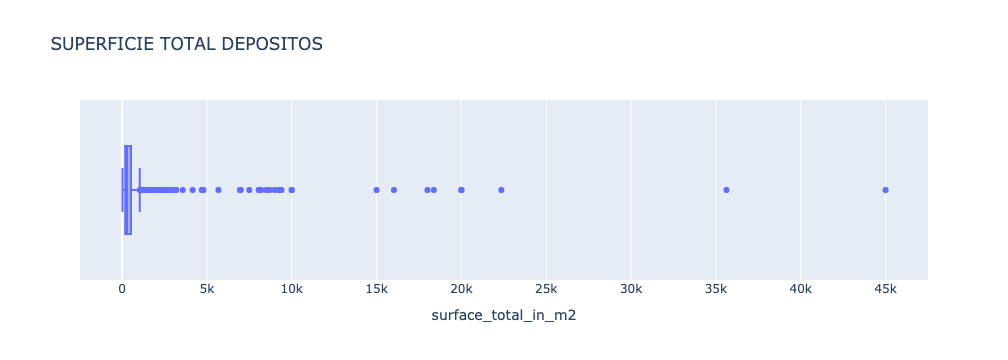

In [70]:
patron_deposito = re.compile(r'deposito|galpon')

encuentra_deposito = df.description.apply(lambda x: re.search(patron_deposito, str(x)))


encuentra_deposito_mask = encuentra_deposito.notnull()

px.box(df[encuentra_deposito_mask], x='surface_total_in_m2', title= 'SUPERFICIE TOTAL DEPOSITOS')

In [71]:
df[encuentra_deposito_mask].shape[0]

1984

In [72]:
df['TIPO DE PROPIEDAD']=df.property_type

df.loc[encuentra_deposito_mask,'TIPO DE PROPIEDAD']='deposito'

## Duplex / Triplex

Creamos una nueva categoria de propiedades, los duplex.

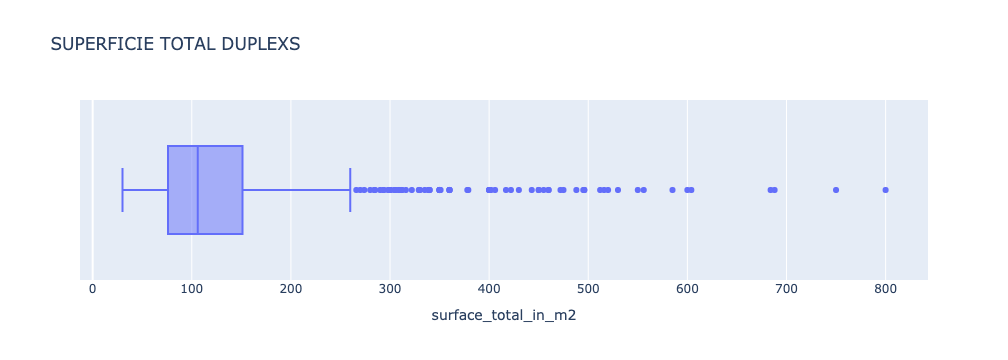

In [73]:
patron_duplex = re.compile(r'duplex|triplex')

encuentra_duplex = df.title.apply(lambda x: re.search(patron_duplex, str(x)))


encuentra_duplex_mask = encuentra_duplex.notnull()

px.box(df[encuentra_duplex_mask], x='surface_total_in_m2', title= 'SUPERFICIE TOTAL DUPLEXS')

In [74]:
df[encuentra_duplex_mask].shape

(2125, 33)

In [75]:

df.loc[encuentra_duplex_mask,'TIPO DE PROPIEDAD']='duplex/triplex'

### Piso / Penthouses

In [76]:
df_apartamento=df[df.property_type=='apartment']

patron_piso = re.compile(r'piso|semipiso')

depto_sup_mayor_200m2 = df[np.logical_and(np.logical_or(df.surface_total_in_m2>200, df.surface_covered_in_m2>200), df.property_type=='apartment')]

encuentra_piso = depto_sup_mayor_200m2.title.apply(lambda x: re.search(patron_piso, str(x)))


encuentra_piso_mask = encuentra_piso.notnull()

piso=encuentra_piso[encuentra_piso_mask].apply(lambda x: x.group())

patron_penthouse = re.compile(r'penthouse')

encuentra_pent = df[df.property_type=='apartment'].description.apply(lambda x: re.search(patron_penthouse, str(x)))

encuentra_pent_mask = encuentra_pent.notnull()

pent_index = df_apartamento.loc[encuentra_pent_mask].index
piso_index = piso.index

df.loc[pent_index,'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[piso_index,'TIPO DE PROPIEDAD']='piso/penthouse'


In [77]:
df_apartamento=df[df.property_type=='apartment']

patron_piso = re.compile(r'piso|semipiso')

depto_sup_mayor_200m2 = df[np.logical_and(np.logical_or(df.surface_total_in_m2>200, df.surface_covered_in_m2>200), df.property_type=='apartment')]

encuentra_piso = depto_sup_mayor_200m2.description.apply(lambda x: re.search(patron_piso, str(x)))


encuentra_piso_mask = encuentra_piso.notnull()

piso=encuentra_piso[encuentra_piso_mask].apply(lambda x: x.group())

patron_penthouse = re.compile(r'penthouse')

encuentra_pent = df[df.property_type=='apartment'].title.apply(lambda x: re.search(patron_penthouse, str(x)))

encuentra_pent_mask = encuentra_pent.notnull()

pent_index = df_apartamento.loc[encuentra_pent_mask].index
piso_index = piso.index

df.loc[pent_index,'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[piso_index,'TIPO DE PROPIEDAD']='piso/penthouse'

### 7) Analisis EDA

#### Outliers

Vamos a graficar algunas variables numericas a ver como esta distribuida nuestra data

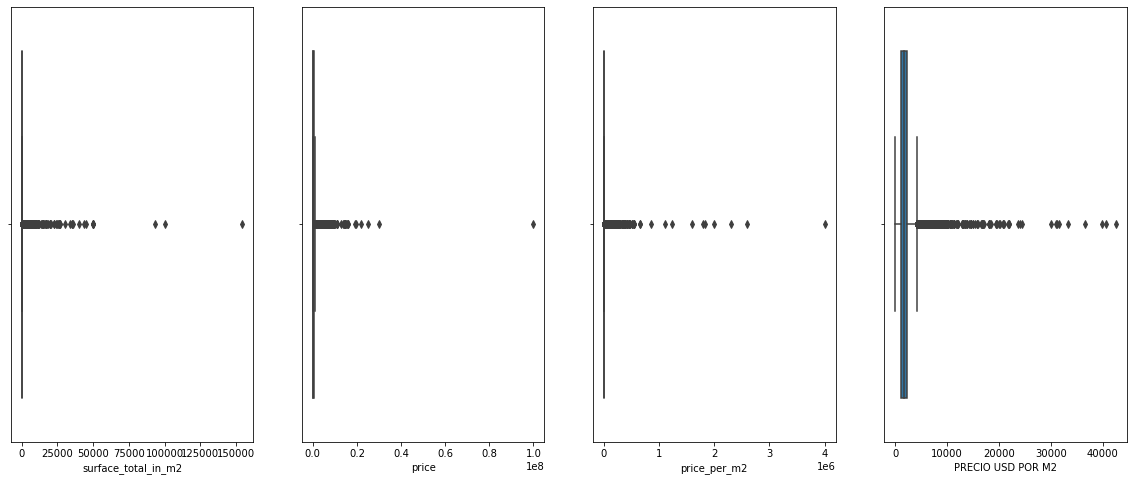

In [78]:
fig,ax = plt.subplots(ncols=4, figsize=(20,8))

sns.boxplot(data=df, x='surface_total_in_m2', ax=ax[0]) 
sns.boxplot(data=df, x='price', ax=ax[1]) 
sns.boxplot(data=df, x='price_per_m2', ax=ax[2]) 
sns.boxplot(data=df, x='PRECIO USD POR M2', ax=ax[3])

plt.show()

Dado que los ultimos 2 graficos son consecuencia de los primeros dos, vamos a trabajar con ellos.

## surface_total_in_m2

## Apartment

Vamos a buscar outliers a partir de place_name en departamentos de capital federal

In [79]:
pd.set_option('display.max_colwidth', None)

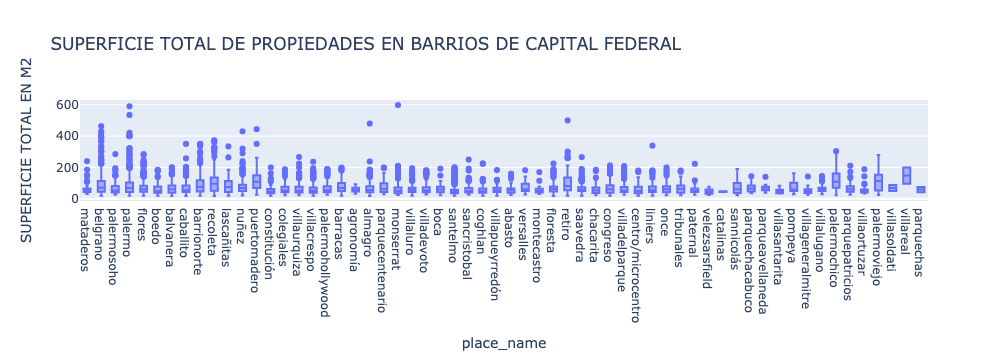

In [80]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')],\
             y = "SUPERFICIE TOTAL EN M2", x='place_name', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL')
fig.show()


### mataderos - Apartment

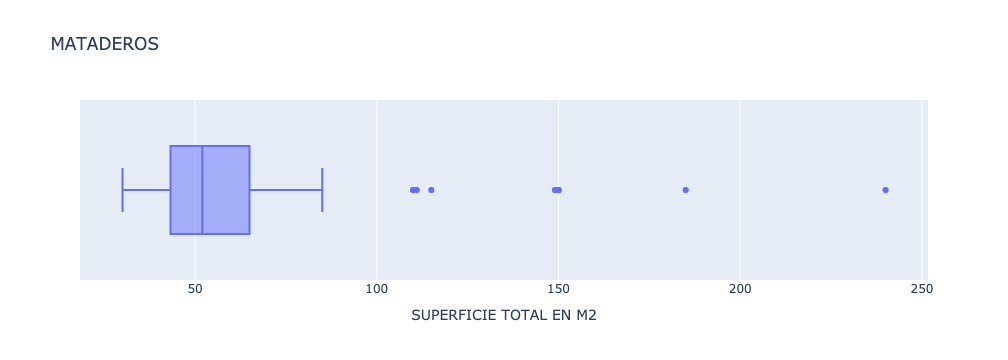

In [81]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='mataderos',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", title='MATADEROS')
fig.show()

In [82]:
df_apartamentos = df[df['TIPO DE PROPIEDAD']=='apartment']


mataderos_index=df_apartamentos[df_apartamentos['PLACE NAME']=='mataderos'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:7].index
df_apartamentos[df_apartamentos['PLACE NAME']=='mataderos'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:7]


SUPERFICIE TOTAL EN M2  \
19543                 240.000   
57563                 185.000   
75266                 150.000   
40045                 150.000   
44075                 150.000   
60510                 149.000   
74199                 115.000   

                                                                title  \
19543                                                   avevapern5800   
57563                                              departamentotipoph   
75266                                          departamento-mataderos   
40045                                        casa4ambientes-mataderos   
44075              3ambconterraza,parrillaysotano(estado100impecable)   
60510  departamento4ambientescondep2balcones,todoalexterior-mataderos   
74199                                          departamento-mataderos   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  
19543                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                publicadoporcirculoinmobiliariasuratravesinmomap  
57563                                                                                                                                                                                                                                                                      departamentotipoph,estáenlaplantaalta1erpiso,estádesocupadoyenbuenestadosinexpensas,muycómodo,conbalcóncorridoentodoeldepartamentolivingcomedoralfrentecongranventanabalcón,1dormalfrenteyotroalcontrafrente,conbañolacocinacomedortienesalidaabalcónterrazaconlavaderoel2dopisoseconformaconundormitorioconbaño,unamplioplayroomconplacard,quepuedetransformarceenotrodormitorioparrillainternaconbarraysalidaabalcónamplioconhornodebarrobuenmantenimientogeneralcercanoaplaza,barriotranquilodecasas,próximoaavescalada  
75266                                                                                                                                                                                                                                                                                                                                                                                                                                                                            exclusivospisos4ambientesdecategoría!!dos(2)cocherasfijasycubiertastres(3)baños(1ensuite+1toiletederecepción)calefacciónporcalderapeisa(osimilar)conradiadoresentodoslosambientesparrillaindividualagasnaturalbalcóny/opatiode11x4,50y/oterrazade50m2totalesexcelenteubicación,próximoavemiliocastroyavjuanbalberdi-  
40045                                                

In [83]:
df.loc[mataderos_index[3],'TIPO DE PROPIEDAD']='house'

In [84]:
df.loc[mataderos_index[1],'TIPO DE PROPIEDAD']='ph'

In [85]:
df.loc[mataderos_index[6],'TIPO DE PROPIEDAD']='ph'

### belgrano - Apartment

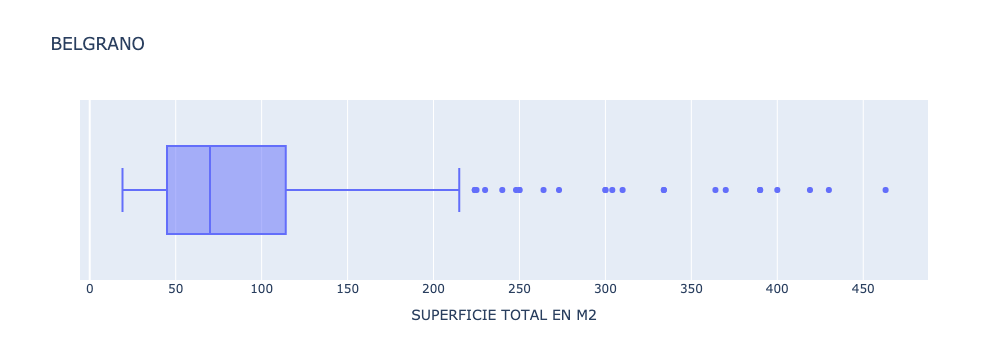

In [86]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='belgrano',df['TIPO DE PROPIEDAD']=='apartment')], x = "SUPERFICIE TOTAL EN M2", title='BELGRANO')
fig.show()

In [87]:
belgrano_index = df_apartamentos[df_apartamentos['PLACE NAME']=='belgrano']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title']][:18].index

df_apartamentos[df_apartamentos['PLACE NAME']=='belgrano'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:18]


SUPERFICIE TOTAL EN M2  \
618                   463.000   
41997                 430.000   
36360                 419.000   
24974                 400.000   
70211                 390.000   
70434                 390.000   
70294                 370.000   
85838                 364.000   
37586                 334.000   
38496                 334.000   
50246                 310.000   
28242                 304.000   
70129                 300.000   
48732                 300.000   
37251                 273.000   
80459                 264.000   
60975                 250.000   
60380                 250.000   

                                                                                                       title  \
618                                                                                      departamentoenventa   
41997                                                                                    departamentoenventa   
36360                                                              belgrano/laimprenta7ambaptoprofdepcochera   
24974                                                       belgranoexcelentedepartamentoenventade8ambientes   
70211                                                                                 departamentoenbelgrano   
70434                                                   4suitesescritorioyplayroombalconterrazaypiletapropia   
70294                                                   3defebreroyzabala-torredemaximacategoriaconamenities   
85838                                                                                 departamento-belgranoc   
37586                                                                                      departamentoventa   
38496                                              muylindodepartamentocon200mts²dejardínson334m2206dejardín   
50246                                                                            oportunidad!!3defebrero2169   
28242                                                              excelentedepartamentoconterrazay2jardines   
70129                                                                       arribeñosesqzabala3cocherasfijas   
48732                                                                                         ohiggins22002º   
37251                                                                                    departamentoenventa   
80459                                                                                    departamentoenventa   
60975                                   forumalcorta!amenitiesdemaximonivelvistaalrio!253m2delujo3dormcondep   
60380  departamentoenbelgranoforumalcorta!!!espectacular3dormensuitecondepamenitiesdesuperlujoyvistaalrio!!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
618                                                                                    

In [88]:
df.loc[belgrano_index[0],'TIPO DE PROPIEDAD']='duplex/triplex'

### palermo soho - Apartment

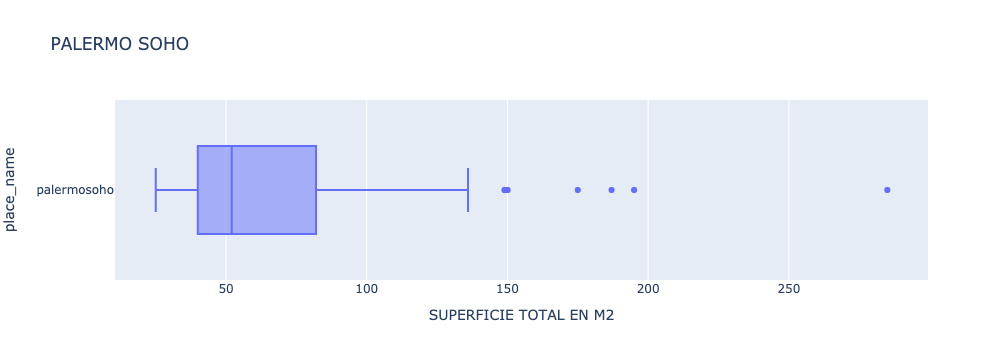

In [89]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='palermosoho',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", y='place_name', title='PALERMO SOHO')
fig.show()

In [90]:
palermosoho_index = df_apartamentos[df_apartamentos['PLACE NAME']=='palermosoho'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title']][:6].index

df_apartamentos[df_apartamentos['PLACE NAME']=='palermosoho'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:6]


SUPERFICIE TOTAL EN M2  \
78073                 285.000   
76746                 195.000   
7526                  187.000   
41346                 175.000   
10429                 150.000   
63264                 150.000   

                                                                                 title  \
78073                                                                departamentoventa   
76746                                  departamentoenventaenpalermosoho,capitalfederal   
7526   semipisoenjuncalentreugartecheyrepublicaarabesiriaopcioncocheraybaulerau$s30000   
41346          excelentedeptoentorreconterrazasparrillavista360unico!2cocherasybaulera   
10429                                    departamentoenpalermosohocongranbalcónterraza   
63264                                                                     paraguay4700   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
78073                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       hermosadptodedosambientesmuyeconómico  
76746                                                                                                                                                                                                                                               codigo:1237-76ubicadoen:paraguay4700-publicadopor:desdemonajudithmorettielprecioesdeusd927000nullexcelente5/c/dependenciaambientesenedificiotorre,superluminoso,excelentesterminacionescategoríapremuinbaulerasoptativascocherasoptativaslasmedidasconsignadasnosonexáctas,tienenunfinmeramenteinformativo,novinculareslasmedidasysuperficiesrealessurgendeltítulodepropiedadelmontorealdeexpensassurgedeldetalledeladministradorlasimágenessonorientativasnosonexactasalapropiedadpublicadoatravésdemapaprop  
7526                                                                                                                                                                                                                                                                                                                                                                                                                excelentesemipisoalfrenteconluzdemañanaenmuyestadodeconservacion(deepocacocinaybaños)-conseguridadlas24hs3dormitorios+escritorioconbiblioteca(principalensuite,yunbañocompletoparalosotros2dormitorios)-cocinaconcomedordiariolavaderoindependiente,dependenciadeservicio-calefaccionyaguacalientecentral(servicioscentrales)-ablanual$18944-  
41346                     excelentepisoentorrefullamenitiesvista360gradosexcelenteestadomastersuiteconvestidorybañopartimentadoducha,hidromasajescuartodebañoybachadobletodalasuitedaaun

In [91]:
df.loc[palermosoho_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'

## Palermo - Apartment

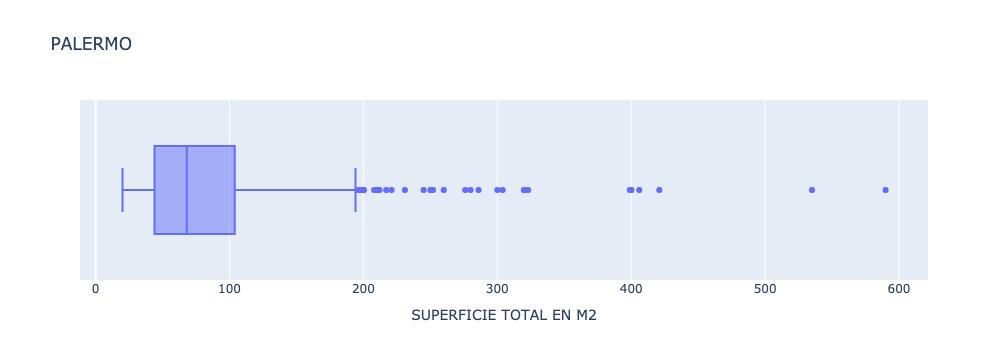

In [92]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='palermo',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", title='PALERMO')
fig.show()

In [93]:
palermo_index = df_apartamentos[df_apartamentos['PLACE NAME']=='palermo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:25].index

df_apartamentos[df_apartamentos['PLACE NAME']=='palermo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:25]


SUPERFICIE TOTAL EN M2  \
41036                 590.000   
54934                 535.000   
60764                 421.000   
83331                 406.000   
70452                 400.000   
33322                 400.000   
43389                 399.000   
60618                 323.000   
54899                 320.000   
23740                 320.000   
33283                 304.000   
34878                 300.000   
35906                 286.000   
53173                 280.000   
60683                 276.000   
34982                 260.000   
36510                 252.000   
79002                 250.000   
70385                 245.000   
37158                 231.000   
76752                 221.000   
69920                 217.000   
76753                 212.000   
17339                 210.000   
5342                  210.000   

                                                                                                                                                                                    title  \
41036                                                                                                                                                                            clay3100   
54934                                                                                                             ventadepartamentode5ambientescondependencias,2cocherasybauleraenpalermo   
60764                                                                                                                                                        latorremaslujosadepalermo!!!   
83331                                                                                                                                                                        ventapalermo   
70452                                                                                                                                  torredecategoria-frentealrosedal-espectacularvista   
33322                                                                                                                                                                        ventapalermo   
43389                                                                                                                                                                   dellibertador1700   
60618                                                                                                                                                               departamentoenpalermo   
54899                                                                                                                                                                     venta5ambientes   
23740                                                                                                                                                                avlibertadorykennedy   
33283                                                                                                                                                                        ventapalermo   
34878                                                                                                                                          departamentoexclusivoenventa,muybuenavista   
35906  departamentolivingcomedor4dormitorio(s)1ensuite3baño(s)1toilette(s)habitacióndeservicio2cochera(s)entremedianerasalfrenterecicladoimpecableluminosoorientaciónesteantigüedad50años   
53173                                                                                                           departamento4ambientes,enplantabaja,congranpatioalaventa,torredecategoría   
60683                                                                                                                                                               departamentoenpalermo   
34982                                                                                                                       

In [94]:
df.loc[palermo_index[7],'TIPO DE PROPIEDAD']='duplex/triplex'

In [95]:
df.loc[palermo_index[-5],'TIPO DE PROPIEDAD']='duplex/triplex'

In [96]:
df.loc[palermo_index[-3],'TIPO DE PROPIEDAD']='duplex/triplex'

In [97]:
df.loc[palermo_index[-2],'TIPO DE PROPIEDAD']='duplex/triplex'

## Barrio Norte - Apartment

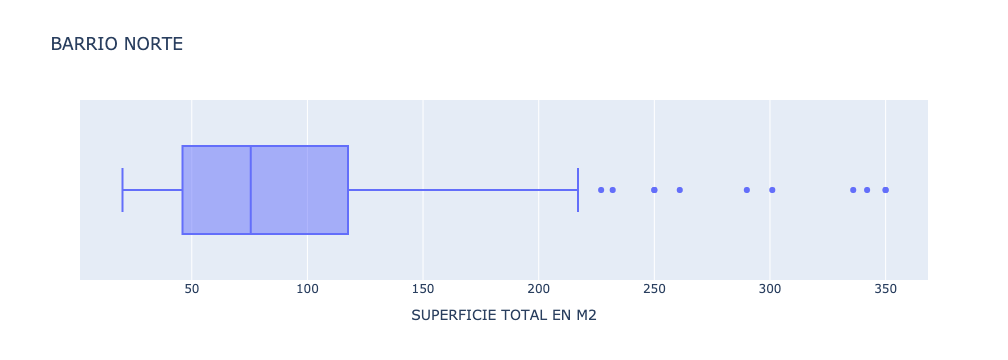

In [98]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='barrionorte',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", title='BARRIO NORTE')
fig.show()

In [99]:
barrionorte_index=df_apartamentos[df_apartamentos['PLACE NAME']=='barrionorte'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9].index

df_apartamentos[df_apartamentos['PLACE NAME']=='barrionorte'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9]


SUPERFICIE TOTAL EN M2  \
19107                 350.000   
12881                 350.000   
28643                 342.000   
44532                 336.000   
9703                  301.000   
66207                 290.000   
31219                 261.000   
53780                 250.000   
80710                 250.000   

                                                                       title  \
19107                                               excelentedeptoenrecoleta   
12881              departamentoenventaubicadoenbarrionorte(iur0369_lp118265)   
28643      torrelibedinsky-barrionorte-grandbourg-5ambc/dependenciasycochera   
44532                              edificiofariña,3suites2dep,3cocherasfijas   
9703                                                   suipachaesquinajuncal   
66207                                              departamento-palermochico   
31219                                                       ventabarrionorte   
53780                    departamentoenventa3dormitoriosconpatio-barrionorte   
80710  departamentode4dormitoriosdegrancategoriamuyluminosoenexcelenteestado   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
19107                                                                                                                                                                                                                                                                          ampliolivingycomedorendesnivelalfrenteconbalcn,saladeestar,toilettederecepcin,mastersuiteconjacuzziyvestidor,otros3dormitoriosensuitey1livingintimo,ampliacocinaconmesadedesayuno,cuartodelavado,lavadero,dependenciasdeservicioconbaocalefaccin,aireacondicionadoseguridad24hsporcircuitodeseguridadbalcon-comedor-baulera-cocina-comedordediario-dependenciadeservicio-dormitorioensuite-escritorio-hall-jardin-lavadero-living-livingcomedor-patio-terraza-toilette-vestidorpublicadopormaxplensoajepintoatravesinmomap  
12881  edificioconstruidodegrancategoría,ubicadofrenteaplazalibertadenlamismacuadradelteatrocoliseodepartamentode350mts,conunagranplantafuncionalymuybuenacirculacióningresoporpalierprivadoyaccesodeserviciocuentacon5ampliosdormitoriostodosconampliosplacares,tresdeellosensuiteydoscompartenampliobañohaciaelfrentetenemoselcomedor,living,estaryescritorio,todosellosconlaposibilidaddeintegrarlososepararlosporpuertascorredizasampliacocinaconuncomedordiariointegradodemuybuendiseñoeimpecableestadoeláreadeserviciocuentaconundormitoriocompletoyunlavaderoindependientehoyeneledificioseestánhaciendotareasdereacondicionamientoycambiodecañeríasdegas,eldepartamentofueunodelosmenosafectadosconlasperdidasyalabrevedadestarárestablecidoelserviciodegasnormalmenteexpensas$18000+aysaabl$3380  
28643                                                                                                                                                                                                                                                                                     excelentedepartamento,ubicadoenlazonamaselegantedelaciudaddebuenosaires,enelemblematicoedificiolibedinskyeldepartamentoconstadeliving-comedorapaisadoconvistaalacopadelosarboles,conbalconaterrazadode180grados,megasuiteconvistaajardines,tresdormitorios(un

In [100]:
df.loc[barrionorte_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Villa Crespo - Apartment

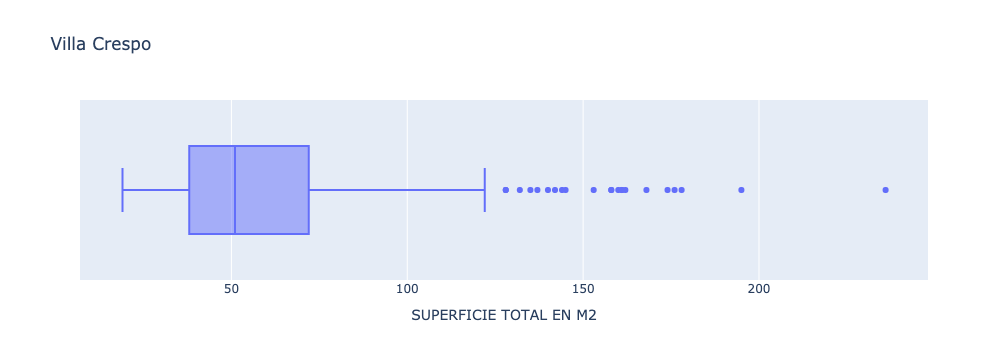

In [101]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='villacrespo',df['TIPO DE PROPIEDAD']=='apartment')],\
                 x = "SUPERFICIE TOTAL EN M2", title='Villa Crespo')
fig.show()

In [102]:
villacrespo_index=df_apartamentos[df_apartamentos['PLACE NAME']=='villacrespo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:19].index


df_apartamentos[df_apartamentos['PLACE NAME']=='villacrespo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:19]


SUPERFICIE TOTAL EN M2  \
80130                 236.000   
33287                 195.000   
63106                 178.000   
22991                 176.000   
42399                 174.000   
23168                 168.000   
84000                 162.000   
20882                 161.000   
80380                 161.000   
53097                 160.000   
84012                 158.000   
83706                 158.000   
9709                  153.000   
79244                 145.000   
28807                 144.000   
29397                 142.000   
41231                 140.000   
84049                 137.000   
13860                 135.000   

                                                      title  \
80130  departamentodecategoría,alfrenteconbalcónsinexpensas   
33287          departamentode4ambientesenventaenvillacrespo   
63106                              departamento-villacrespo   
22991                                   departamentoenventa   
42399                                   departamentoenventa   
23168                                   departamentoenventa   
84000                              departamento-villacrespo   
20882          departamentode3ambientesenventaenvillacrespo   
80380                                   departamentoenventa   
53097                              departamento-villacrespo   
84012                              departamento-villacrespo   
83706                              departamento-villacrespo   
9709                                         juanbjusto2700   
79244            venta4ambientescondependenciaenvillacrespo   
28807                                   departamentoenventa   
29397                                   departamentoenventa   
41231       ventasemipisode4ambcondependenciasenvillacrespo   
84049                              departamento-villacrespo   
13860                                   departamentoenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  
80130                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        características:departamentodecategoría,4dormitorios,granlivingycomedorindependienteescritorio,cocinaconcomedordiariosdependenciadeservicioconbañopatiocubiertoconparrillalavaderobalcóncorridoalfrenteeledificiocuentaconascensorsinexpensasubicación:ubicadoenelbarriodevillacrespo,sobreavjuanbjusto,ametrosdelaestacióndelmetrobus"honoriopueyrredon"próximoa:-avcorrientes-subtelinea"b"-avsanmartinobservaciones:departamentoúnicoenlazonaaptoprofesional  
33287                                                                                                                                                                                                  

In [103]:
df.loc[villacrespo_index[8],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-7],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-1],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-8],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-4],'TIPO DE PROPIEDAD']='ph'
df.loc[villacrespo_index[-5],'TIPO DE PROPIEDAD']='duplex/triplex'

### Puerto Madero - Apartment

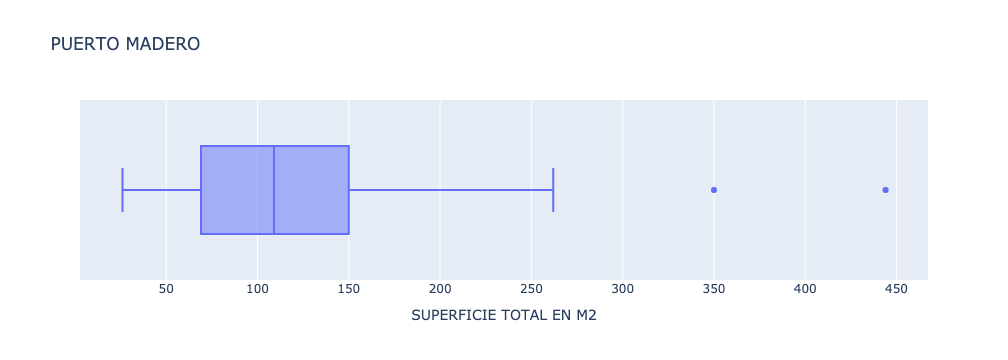

In [104]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='puertomadero'],\
                x = "SUPERFICIE TOTAL EN M2", title='PUERTO MADERO')
fig.show()

In [105]:
index_puertomadero=df_apartamentos[df_apartamentos['PLACE NAME']=='puertomadero'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2].index


df_apartamentos[df_apartamentos['PLACE NAME']=='puertomadero'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]


SUPERFICIE TOTAL EN M2  \
68126                 444.000   
4348                  350.000   

                                                      title  \
68126                                          puertomadero   
4348   torreelfaro-impresionantevistaalrío,tigreypuerto!!!-   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
68126  -increíbledepartamentoendúplexen2plantasconterrazapropiayparrillapb:palierprivado,toilette,granlivingcomedorconvistaatodaslasdireccionesybalcóncocinacomedorydependenciadeservicioposibilidaddehabitaciónensuite(4todormitorio)enpa:3habitacionesensuite,principalconbalcón,vistaalríoydoblebañoconhidromasajesimpactanteterrazacondeckbañoyparrilladoblecirculaciónabl13000nota:lainformaciongraficayescritacontenidaenelpresenteavisoesmeramenteatituloestimativoynoformapartedeningúntipodedocumentacióncontractuallasmedidasysuperficiesdefinitivassurgirándeltitulodepropiedaddelinmueblereferidoasimismolosimportesdetasas,serviciosyexpensasindicadosestánsujetosaverificaciónelvalordelinmuebleindicadoenelpresentepuedesermodificadosinprevioaviso  
4348                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     superluminosoysoleado-grancategoría-living/comedor,toilette,balcónincorporadoconcerramiento,3suites,granbalcónenmastersuite,estar,dependencia,4cocherasfijas,seg24hs,amenitiesalarmadelaplantacerramientosdevidriosdobles

In [106]:
df.loc[index_puertomadero[0],'TIPO DE PROPIEDAD']='duplex/triplex'

In [107]:
df.loc[index_puertomadero[1],'TIPO DE PROPIEDAD']='piso/penthouse'

### Nuñez - Apartment

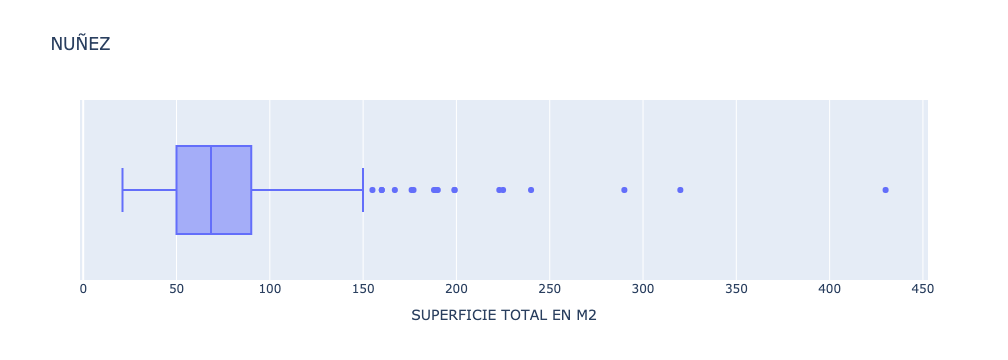

In [108]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='nuñez'],\
             x = "SUPERFICIE TOTAL EN M2", title='NUÑEZ')
fig.show()

In [109]:
nunez_index=df_apartamentos[df_apartamentos['PLACE NAME']=='nuñez'].\
                    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:14].index

df_apartamentos[df_apartamentos['PLACE NAME']=='nuñez'].\
                    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description','PRECIO USD']][:14]


SUPERFICIE TOTAL EN M2  \
41996                 430.000   
44870                 320.000   
52372                 290.000   
34672                 240.000   
41369                 225.000   
31587                 223.000   
4035                  199.000   
5963                  199.000   
83764                 190.000   
83230                 189.000   
3129                  188.000   
36793                 177.000   
68393                 176.000   
55113                 167.000   

                                                             title  \
41996                                          departamentoenventa   
44870                                                 forumalcorta   
52372  ventatorrechateauexcelenteesquineroconlamejorvistadelatorre   
34672                                          casaenventa-caseros   
41369                           quantumbelliniesquinero3dormcondep   
31587                     avdellibertador7000-nuñez-capitalfederal   
4035       avdellibertador7000,departamentoenventa,5ambientes,caba   
5963     avdellibertador7000,departamentoenventa,4dormitorios,caba   
83764                                           departamento-nuñez   
83230                 magnificodepartamentode4ambenavlibertador!!!   
3129                        departamentode4ambientesenventaennuñez   
36793                                espectacularpisoconvistaalrío   
68393                                           departamento-nuñez   
55113                                      treplexconterrazapropia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
41996                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             excelentedepartamentoenventa/forumalcorta,catañedayjuramento/belgranocuentacon4dormitoriosensuitec/vestidor+dependenciadeservicio,toiletteampliolivingcomedor,cómodofamilyroomy2balconesaterrazadossuperficiecubierta:330m2+balconaterrazado100m2superficietotal430m2incluye2cocherasy1baulera/lozaradianteycalefaccióncentralamenities:piletacubierta,piletadescubiertac/zonasdeniños,canchadeteniscubiertaycanchadetenisdescubierta,sum,sectordeparrillas,áreadejuegosinfantiles,fitnesscenterc/vestuariosysaunas,laundry,bauleras,grupoelectrógenosectorizado,internetinalambricoenáreascomunes,bicicleteros,vigilancia24hs--conectarpropiedades   
44870                                                                                                                                                                     

In [110]:
df.loc[nunez_index[3],'TIPO DE PROPIEDAD']='house'
df=df.drop(nunez_index[6])
df.loc[nunez_index[8],'TIPO DE PROPIEDAD']='house'
df.loc[nunez_index[-5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[nunez_index[-4],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[nunez_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[nunez_index[-2],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[nunez_index[-1],'TIPO DE PROPIEDAD']='duplex/triplex'

### Constitucion - Apartment

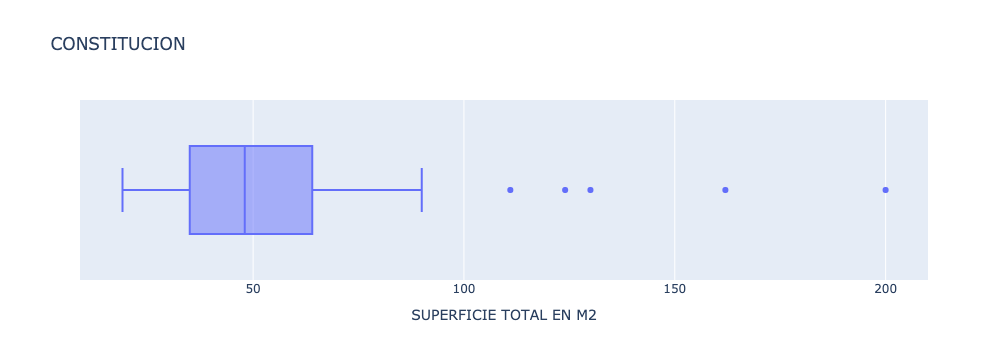

In [111]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='constitución'], x = "SUPERFICIE TOTAL EN M2", title='CONSTITUCION')
fig.show()

In [112]:
constitucion_index = df_apartamentos[df_apartamentos['PLACE NAME']=='constitución'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:5].index
df_apartamentos[df_apartamentos['PLACE NAME']=='constitución'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:5]


SUPERFICIE TOTAL EN M2  \
8880                  200.000   
65557                 162.000   
78661                 130.000   
8900                  124.000   
13292                 111.000   

                                                                                                                                                            title  \
8880                                                                                                                        ventapisotipoph-de200m2-balcónalfrte-   
65557                                                                                                                     departamento/ph-4ambientes-constitución   
78661                                                                         departamento130m²5ambientesconwashing-room,capitalfederal,constitución,poru$s269000   
8900                                                                                    piso4ambientesenventasantiagodelestero1300escomovivirenunacasaenaltura!!!   
13292  departamentoliving/comedor3dormitorio(s)1toilette(s)habitacióndeservicioalfrenteenesquinaantiguoluminosoenmuybuenestadoorientaciónnoroesteantigüedad56años   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
8880                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ventadepisotipoph(1ºpiso)u$s249000“conexcelenterenta”opcióndeventadel2ºy3ºpisototalmenterecicladospisosenphde200m2aprox2hallsderecepción10habitaciones-3bañoscompletos-1cocina-techosdedoblealturaconentrepisosyventilacionindependientepatio-balcóncorridoalacallesuperluminososestadodeledificio:muybuenoedificiode3pisosconentradaindependienteexcelentezonaturísticaydecrecimientoa1cuadraymediadeav9dejulio,cercaniauniversidad,4cuadrasdeplazasantelmo-8cuadrasdepuertomadero-porestayotraspropiedades:tambiéndeotrasexcelentespropiedadesconosinrentaenlasmejoreszonasdebsasllamardedomingoaviernesde10a21hs-srsaúl-tel11ycel/wsp1115mail:(ventacondicionadaalasolicituddelcotiacargodelpropietario)resgral2371-afipteléfonodelinea  
65557                                                                                                                                  

In [113]:
df.loc[constitucion_index[0],'TIPO DE PROPIEDAD']='ph'
df.loc[constitucion_index[1],'TIPO DE PROPIEDAD']='ph'
df.loc[constitucion_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'


### Colegiales - Apartment

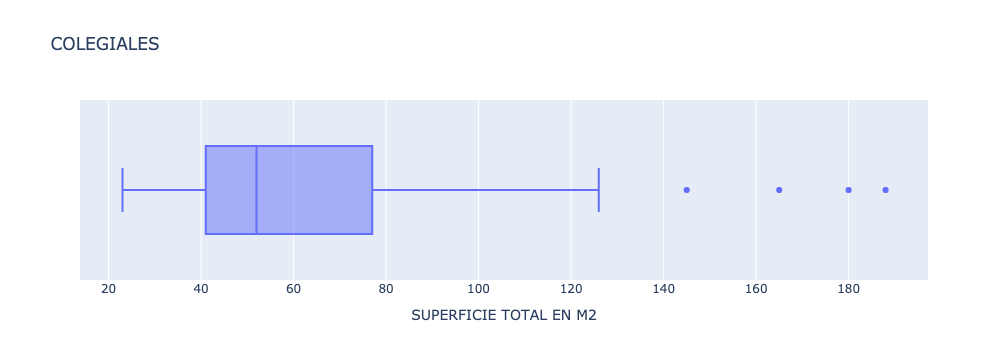

In [114]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='colegiales'],\
             x = "SUPERFICIE TOTAL EN M2", title='COLEGIALES')
fig.show()

In [115]:
colegiales_index =df_apartamentos[df_apartamentos['PLACE NAME']=='colegiales'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4].index
df_apartamentos[df_apartamentos['PLACE NAME']=='colegiales'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4]


SUPERFICIE TOTAL EN M2                        title  \
3545                  188.000          departamentoenventa   
48073                 180.000  palpa2855-pbopcionalcochera   
80361                 165.000          departamentoenventa   
46304                 145.000          departamentoenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
3545                                                                                                                                                                                                                                                                                                                                                                                                                                               excelenteoportunidaddecompradedepartamentotriplexenplenocorazóndecolegialesventadetriplexenpalermo,-lostrespisosconstituyenunsólodepartamento�a",tienelosaradianteenlostrespisos,calderaindependientededoblecircuitoparalosaradianteyserviciosanitariotienebauleraindividual,enel6topiso-dedicadaaldepartamento,terrazasemicubiertaconparrillaybalcónconparrillatreshabitaciones(habitaciónsuiteconbaño)yunadependenciadeserviciodosbañosyuntoiletteelvalordelaexpensasincluye(aprox9,500ars)baulera,cochera,cableeinternetmuyluminosocómodacocinaagasconhornoedificiode9a10añosconseguridaddecircuitocerradoporcámaraconectadaalserviciodecable--nexopropiedades  
48073  porsubuenayestratégicaubicación,palpa2855cuentaconexcelentescondicionesparaconvertirseenunaprivilegiadacomunidadlas10unidadesfueronespecialmentepensadasporlosarquitectosparaalbergarcómodamenteasusresidentesen4niveles,10semipisostipocasaconampliasterrazasconparrillaenpalpa2855lacomodidadeslomásimportante;elcomplejocuentaconcocherasfjasoptativasconportónautomatizadoparaquelospropietariosyresidentestenganlatranquilidaddetenersuvehículoseguronadaenpalpa2855fuelibradoalazartieneundiseñoarquitectónicoconcuidadacalidadenlosdetallesdiseñomodernoydescontracturado,yelesmeroenlaeleccióndelosmaterialesmásnoblesparasuconstruccióndancomoresultadounapropuestaresidencialinmejorableposeeascensorconpuertasautomáticasaccesoalasviviendasporpatioprivadotodaslasunidadessecaracterizanporsusampliosventanales,luminosidadyventilacióncruzadaqueinvitanaunamejorcalidaddevidatotalmenteintegradasaunasuperfcieediliciadehermosaslíneas,todaslasresidenciasfuerondiseñadasparabrindarelmáximoconfort,creandoespaciosqueaprovechanlaluznaturalypermitendisfrutarunestilodevidaqueatesorarássiempre  
80361                                                                                                                                                                    pisotipocasa4ambientesfrenteycontrafrente165m2impecabletodosoldobleentradadoblecirculacionespectacularlivingen"l"bañocompleto+toilettegrancocinacomedor5placardsserviciosindividualesterrazaalfrenteconrejapatiocontoldodealuminiolavaderoindependientepisosdeparquet3unidadesentotal,xescaleraexp

In [116]:
df.loc[colegiales_index[0],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[colegiales_index[1],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[colegiales_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Almagro - Apartment

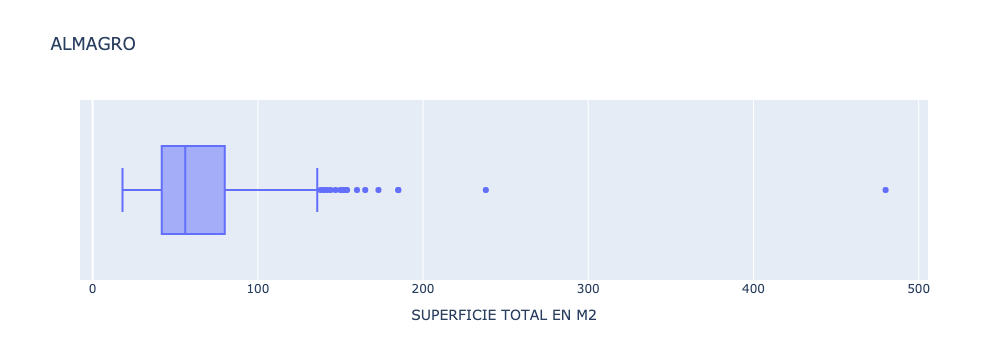

In [117]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='almagro'], x = "SUPERFICIE TOTAL EN M2", title='ALMAGRO')
fig.show()

In [118]:
almagro_index =df_apartamentos[df_apartamentos['PLACE NAME']=='almagro'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13].index
df_apartamentos[df_apartamentos['PLACE NAME']=='almagro'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13]


SUPERFICIE TOTAL EN M2  \
78711                 480.000   
28111                 238.000   
20586                 185.000   
18801                 185.000   
63364                 173.000   
15826                 165.000   
3952                  160.000   
5763                  154.000   
9092                  152.000   
14224                 152.000   
17564                 151.000   
79724                 150.000   
43881                 147.000   

                                                                                                                                                                                           title  \
78711                                                                                                                                                                  aranguren100//muyluminoso   
28111  departamentoliving/comedor3dormitorio(s)1suiteconvest,2ensuite5baño(s)1toilette(s)habitacióndeservicio4cochera(s)alfrenteenesquinaexcelenteterrazaluminosoorientaciónnorteantigüedad6años   
20586                                                                                                                                                         ventadepartamento4ambientesalmagro   
18801                                                                                           *nuevoprecio*departamentoenventaenalmagro3ambientes2baños105m2+patioc/parrilla80m2–rivadavia3500   
63364                                                                                                                                                   inmejorabledepto5ambc/depcocheraybaulera   
15826                                                                                                                                                                        departamentoenventa   
3952                                                                                                                                                                         departamentoenventa   
5763                                                                                                                                                     granpiso5ambc/dependencia7ºpisoalfrente   
9092                                                                                                                                                                         departamentoenventa   
14224                                                                                                                                                   departamentode5ambientesenventaenalmagro   
17564                                                                                                                                                           3ambientes2porescaleraconterraza   
79724                                                                                                                                            impecablepisode150m2conbajasexpensasaptocrédito   
43881                                                                                                                                                                        departamentoenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [119]:
df.loc[almagro_index[0],'TIPO DE PROPIEDAD']='house'
df.loc[almagro_index[4],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[almagro_index[5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[almagro_index[-6],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[almagro_index[-5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[almagro_index[-4],'TIPO DE PROPIEDAD']='ph'
df.loc[almagro_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Monserrat - Apartment

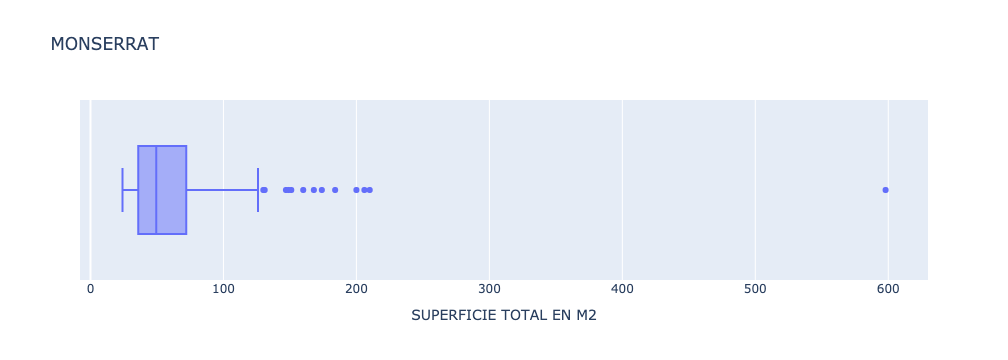

In [120]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='monserrat'], x = "SUPERFICIE TOTAL EN M2", title='MONSERRAT')
fig.show()

In [121]:
monserrat_index=df_apartamentos[df_apartamentos['PLACE NAME']=='monserrat'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13].index

df_apartamentos[df_apartamentos['PLACE NAME']=='monserrat'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13]

SUPERFICIE TOTAL EN M2  \
34797                 598.000   
78717                 210.000   
29437                 206.000   
33740                 200.000   
38218                 184.000   
61536                 174.000   
24727                 168.000   
32961                 160.000   
58837                 151.000   
63038                 149.000   
5423                  147.000   
30310                 131.000   
36452                 130.000   

                                                                        title  \
34797                                                           barrioprivado   
78717                                                 muyluminoso//sanjose400   
29437                                                     departamentoenventa   
33740                                 espectacularpisode5ambientesenmonserrat   
38218                                           departamentoantiguoconcochera   
61536                                                  departamento-monserrat   
24727                 hermosodepartamentoestiloracionalistaservicioscentrales   
32961                                      excelente5ambenedificioemblemático   
58837                                                  departamento-monserrat   
63038                                              departamento/ph-5ambientes   
5423             hermosodepartamentoantiguoenesquina,luminoso,aptoprofesional   
30310                                                     departamentoenventa   
36452  excelentedepartamentocuatroambientes,alfrente,muyluminosobajasexpensas   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  
34797                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ¿querésvivirrodeadodepaz,paisajesnaturalesyelmayorconfot?elprimerbarrioprivadodelaciudaddebalcarce,seencuentraubicadoalpiedelasierralabarrosa,cercanoalautodromojuanmanuelfangio,unodelospuntosmásimpactantesencuantoaloqueofreceelpaisajeserranoypróximoalosdistintoscircuitosdeactividadesculturalesydeportivasdisfrutedetodaslascomodidadesdelclubhouse,conlanaturalezadefondolaseguridadqueofreceunbarrioprivado,yunimportanteentornonatural,hacenquepuedaolvidarsedesuspreocupacionesyrelajarsedeverdadconsulteporlotesdisponibleslotesde598m2a1000m2conlacompradeunlotesebonificalaescriturayademásseobsequiandosbicicletasdemountainbikeconsultas:(04

In [122]:
df.loc[monserrat_index[0]].description

'¿querésvivirrodeadodepaz,paisajesnaturalesyelmayorconfot?elprimerbarrioprivadodelaciudaddebalcarce,seencuentraubicadoalpiedelasierralabarrosa,cercanoalautodromojuanmanuelfangio,unodelospuntosmásimpactantesencuantoaloqueofreceelpaisajeserranoypróximoalosdistintoscircuitosdeactividadesculturalesydeportivasdisfrutedetodaslascomodidadesdelclubhouse,conlanaturalezadefondolaseguridadqueofreceunbarrioprivado,yunimportanteentornonatural,hacenquepuedaolvidarsedesuspreocupacionesyrelajarsedeverdadconsulteporlotesdisponibleslotesde598m2a1000m2conlacompradeunlotesebonificalaescriturayademásseobsequiandosbicicletasdemountainbikeconsultas:(04168rocío'

Se trata de un anuncio que incluye el conjunto de 4 unidades dentro de su precio.

In [123]:
df = df.drop(monserrat_index[0])

In [124]:
df.loc[monserrat_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[-5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[-4],'TIPO DE PROPIEDAD']='ph'
df.loc[monserrat_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Villa Luro - Apartment

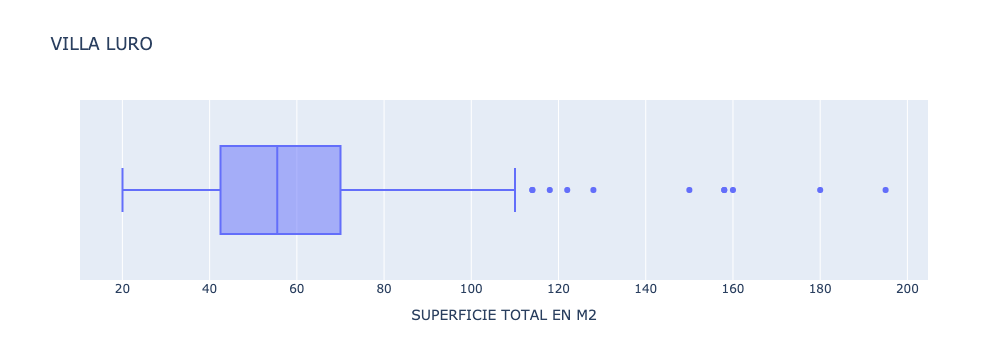

In [125]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villaluro'], x = "SUPERFICIE TOTAL EN M2", title='VILLA LURO')
fig.show()

In [126]:
villaluro_index = df_apartamentos[df_apartamentos['PLACE NAME']=='villaluro'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villaluro'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9]


SUPERFICIE TOTAL EN M2  \
72280                 195.000   
72274                 180.000   
72018                 160.000   
55806                 158.000   
55812                 158.000   
9375                  150.000   
60726                 128.000   
60677                 122.000   
83402                 118.000   

                                                                      title  \
72280                                                departamento-villaluro   
72274                                                departamento-villaluro   
72018                                                departamento-villaluro   
55806                 4ambientes,dosbaños,cocinaindependiente,terrazapropia   
55812  4ambientes,2baños,cocinaindependiente,balcónaterrazadoyterrazapropia   
9375                                                    departamentoenventa   
60726                                                departamento-villaluro   
60677                                                departamento-villaluro   
83402                                            casalotepropiode3ambientes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
72280  ventadedepartamento3ambientesconterrazaubicadoenelbarriodevillaluro,acassuso5570/75,ametrosdelaavrivadaviaydelboulevardramonlfalcon,delaautopista25demayo,delaccesooesteydelaautopistarichiericoncocheraopcionalu$s25000elpisodelhallprincipalserealizaradeporcelanatolosmurosexterioresdeledificioserealizaranenpinturareveardeprimeracalidad,endosotrestonosdiferenciandolasvolumentriasexistenteslostanquesdeaguaseencontraransobrelasalademaquinasyloscisternaenlaplantabajaconestructuradehormigonarmadoymamposteriadeladrillohuecoloscielorrasos,losmurosinterioresdelasmismas,lospalieresyelhalldeentradaserealizarandeyesotradicionalbalconconpasamanosdehierrooacerosegunelcriteriodelaconstructora,dichosbalcontendrapisodeporcelanatococinaconpisodeporcelanato,concocina,mesadasdegranitogrismarauotrasegundecisiondelaempresaconstructora,mueblesdecocinaenmelaminaadesignar,herrajesdeaceroyguardacantosdealuminioelaguacalienteseraprovistaporcalderacentralocalefonesindividualessegunseproyectebanoconpisosceramicosoporcelanatoentonosclarosconbanera,inodoro,bidet,vanitoryygriferiaslasventanasserandealuminiotipomodena2orotonda640,sinpersianaslospisosdelosdepartamentosserandeporcelanatoenelsecordelacocinayelrestodepisoflotantealigualqueeneldormitorioconzocaloscolorblancopintadoslaspuertasdeaccesop

In [127]:
df.loc[villaluro_index[-1],'TIPO DE PROPIEDAD']='house'

### Villa Devoto - Apartment

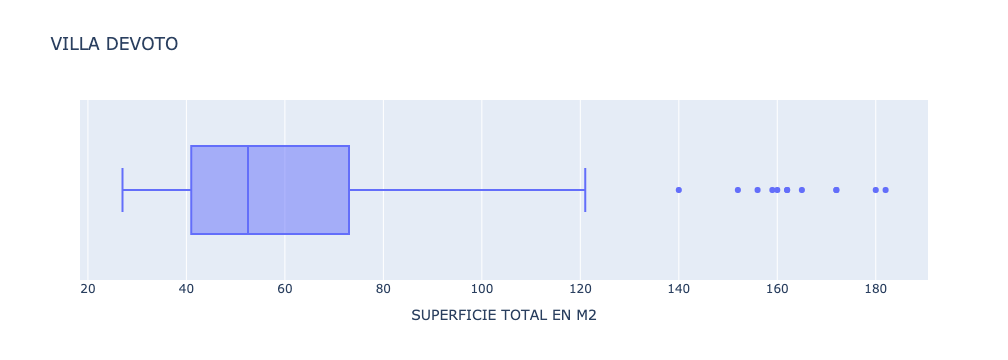

In [128]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villadevoto'], x = "SUPERFICIE TOTAL EN M2", title='VILLA DEVOTO')
fig.show()

In [129]:
devoto_index =df_apartamentos[df_apartamentos['PLACE NAME']=='villadevoto'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:10].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villadevoto'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:10]


SUPERFICIE TOTAL EN M2  \
61570                 182.000   
81595                 180.000   
71370                 172.000   
70968                 172.000   
60861                 165.000   
70917                 162.000   
71350                 162.000   
37189                 160.000   
53478                 159.000   
15563                 156.000   

                                                                                                    title  \
61570                                                                                piso4ambcocheradoble   
81595                                                                     semipiso4ambientes,cochera180m2   
71370                                                                            departamento-villadevoto   
70968                                                                           departamentoenvilladevoto   
60861                                                                                   piso5ambc/depserv   
70917                                                                           departamentoenvilladevoto   
71350                                                                            departamento-villadevoto   
37189                                                                                 departamentoenventa   
53478                                          hermosopiso5ambc/dep,dormsuiteyespguardacoche-159m2totales   
15563  departamento156m²concocheraencarril,salvadormariadelav3500,capitalfederal,villadevoto,poru$s385000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  
61570                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [130]:
df.loc[devoto_index[0],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[1],'TIPO DE PROPIEDAD']='piso/penthouse'
df = df.drop(devoto_index[2])
df.loc[devoto_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[4],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-4],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-1],'TIPO DE PROPIEDAD']='piso/penthouse'

### Palermo Chico - Apartment

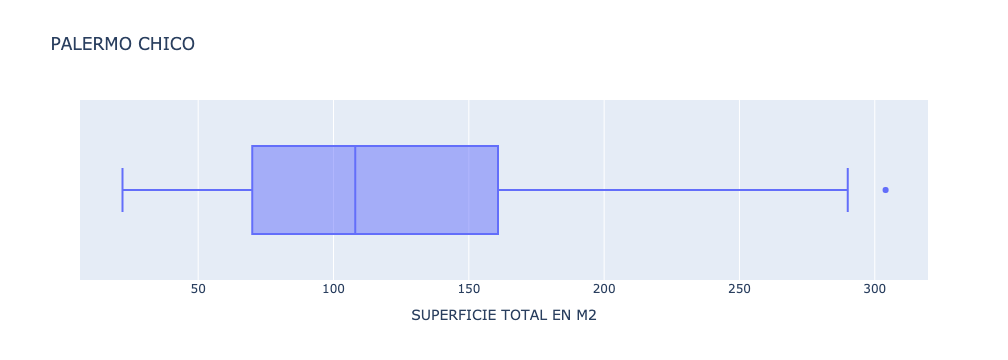

In [131]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='palermochico'], x = "SUPERFICIE TOTAL EN M2", title='PALERMO CHICO')
fig.show()

In [132]:
df_apartamentos[df_apartamentos['PLACE NAME']=='palermochico'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]


SUPERFICIE TOTAL EN M2  \
14217                 304.000   

                                                                                                                                                                                         title  \
14217  departamentoedificioedificiolanusselivingcomedor4dormitorio(s)3suiteconvest3baño(s)habitacióndeservicio2cochera(s)alfrentedegrancategoriaenmuybuenestadoorientaciónesteantigüedad50años   

                                                                                                                                                                                   description  
14217  departamentoedificioedificiolanusselivingcomedor4dormitorio(s)3suiteconvest3baño(s)habitacióndeservicio2cochera(s)alfrentedegrancategoriaenmuybuenestadoorientaciónesteantigüedad50años

### Villa del Parque - Apartment

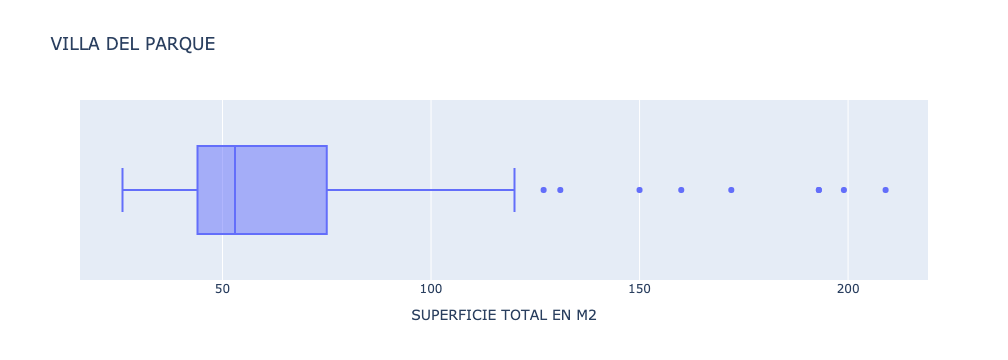

In [133]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villadelparque'], x = "SUPERFICIE TOTAL EN M2", title='VILLA DEL PARQUE')
fig.show()

In [134]:
villadelparque_index = df_apartamentos[df_apartamentos['PLACE NAME']=='villadelparque']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:8].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villadelparque']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:8]


SUPERFICIE TOTAL EN M2  \
4776                  209.000   
80721                 199.000   
49546                 193.000   
49557                 193.000   
36951                 172.000   
17490                 160.000   
77866                 150.000   
55914                 131.000   

                                                                   title  \
4776                                                 departamentoenventa   
80721                                     departamentos3dormitoriosc/dep   
49546                                    6ambientes193m2/cocheraybaulera   
49557                                         pisode193m2cocheraybaulera   
36951                                                departamentoenventa   
17490                              departamentode4ambientesentresplantas   
77866  departamento-villadelparque,semipiso,4ambientes3balcones2cocheras   
55914                                        departamento-villadelparque   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
4776                                                                                                               ventadetreiplexhermoso,alfrenteconentradaindependiente,entradaparadosautospb:escritorio(conentradaindependiente)living,bañoconducha,comedor,cocinaconbarradesayunadora,mueblesaltosybajos,lavadero,patioconparrillasegundaplanta:4dormitorios,conplacards,dosalfrenteconsalidaabalcon,2bañoscompletostercerlanta:playroomtodoanuevo,unchiche,cañosdegua,gas,electricidad,deprimeracalidadconconfortsinexpensasamplio,funcional,luminoso,muyventilado,superficiecubierta151,78,desucbierta4739,semicubierta484,balcon450,superficietotal208,51sedejaconstanciaquelasmedidas,superficiesym2consignadossonaproximados,sujetosaverificacióny/oajusteelpreciodelinmueblepuedesermodificadosinprevioavisofotosdecarácternocontractuallasunidadespublicadasestansujetasadisponibilidadgoldsteinpropiedadessrlactuasolamenteencarácterdecomercializadoradelosinmueblesofrecidosgoldsteinpropiedadessrlavdacorrientes4666buenosaires,--goldsteinpropiedadessrl  
80721                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ###edifdoblefrente,seg24hscochimpecable!!!!###granrecepcionde72m2,escritorio,comedorsuiteconvestidor,2dormensemisuiteconjacuzzi,todoslosbañosenmármostravertino,esplendidacocinatodobarujell,anuevo,impecable,doblehorno,comdiario,garnlavadero(exdepend)playroombalcóncorrido(verfotodeledificio),pisosdetarugado,tododeexcelenteca

In [135]:
df.loc[villadelparque_index[0],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[villadelparque_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villadelparque_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villadelparque_index[4],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[villadelparque_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Centro/Microcentro - Apartment

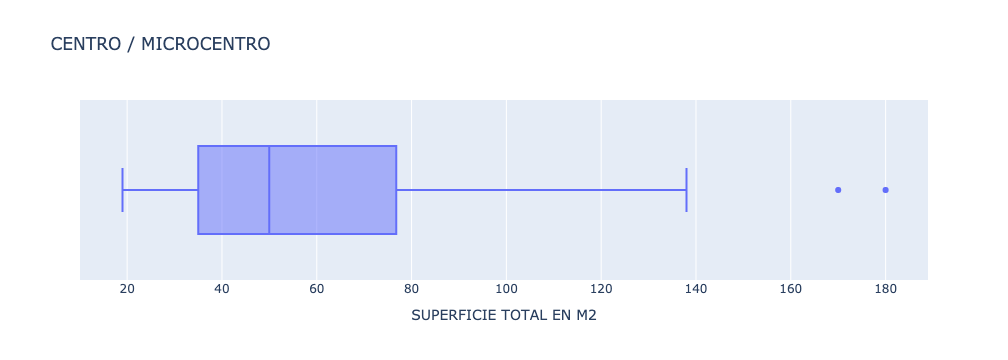

In [136]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='centro/microcentro'], x = "SUPERFICIE TOTAL EN M2", title='CENTRO / MICROCENTRO')
fig.show()

In [137]:
df_apartamentos[df_apartamentos['PLACE NAME']=='centro/microcentro'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]


SUPERFICIE TOTAL EN M2  \
11450                 180.000   
36545                 170.000   

                                                            title  \
11450                                 deptode9ambientescongalería   
36545  departamentoenventa,oportunidad,buenaubicación,cercadetodo   

                                                                                                                                                                                                                   description  
11450  deptode9ambientescongaleríaalfrentecon156m2cubiertosy24m2descubiertosorientaciónnorteyeste,muyluminosohall,9habitaciones,2bañosconducha,kitchenette,lavaderoybauleratechosdedoblealturaypisosdepinoteaesaptoprofesional  
36545                         departamentoenmuybuenaubicaciónaptoparaviviendauoficina,ambientesampliosyconstruccióndebuenacalidadelprecioestapensadoparaqueustedlopuedaremodelarasugustoylequedeespectacular!!!!valelapena!!!!

### Villa Lugano - Apartment

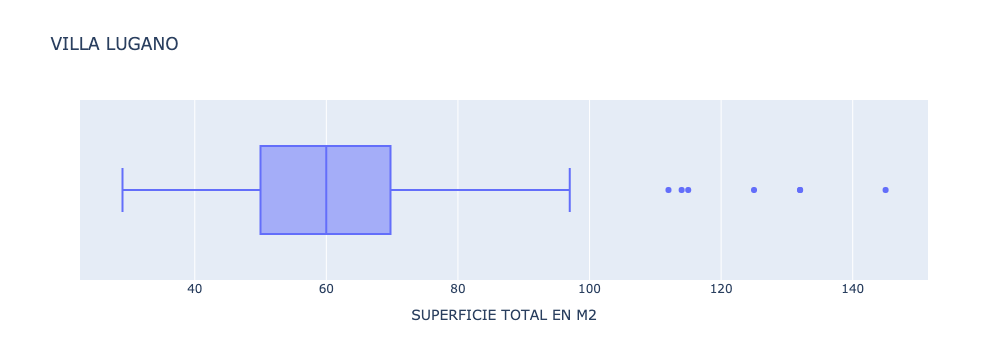

In [138]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villalugano'], x = "SUPERFICIE TOTAL EN M2", title='VILLA LUGANO')
fig.show()

In [139]:
lugano_index = df_apartamentos[df_apartamentos['PLACE NAME']=='villalugano']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:6].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villalugano']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:6]


SUPERFICIE TOTAL EN M2                                           title  \
45635                 145.000                          excelentepsosavriestra   
56242                 132.000                        semipisoespectacular3amb   
56848                 132.000                        departamento-villalugano   
79664                 125.000                        departamento-villalugano   
19705                 115.000  dpto4ambsinexpensasvriachueloaccininmobiliaria   
55880                 114.000        3ambientescondosbaños,dosbalconesde114m2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
45635                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelentepisosobreavriestraycafayatelivingcomedor6x4conpisosdemarmolbotichinicocina3,50x3,50conpisosporcelanato3dormitorios(3x3,50)(3x3,50)(3,50x3,50)pisosflotantes3baosdormitorioppalconvestidorde5,50x2,50hidromasajelavadero2x2balconcorridopuertablindadaen1erpisodeledificioquinchocomunpublicadoporcarlosvazquezehijoinmobatravesinmomap  
56242                                    semipisode4ambenelcomplejofranova!!!comosiestaríasenuncountryencabacercaatodoslospuntosdeaccesoyavenidaspasan2premetrosenfrenteestánhaciendolaobradelavillaolímpicaylovaahacercrecermuchomásaun!!!eldepartamentoestaimpecable,cuentaconunampliolivingcomedorycocinasemi-integrada,dosdormitorioscondosbañossoncompletosy1bañodeserviciodespensaapartetienedosbalconessemiterrazaconvistaespectacularabiertatodoslosambientesventilanalexteriorconlocualessuperluminoso!!lacocheraseencuentraensubsueloyeslamejor!!!expensas:$1300-abl:verplano:https://googl/ss2o0ivervídeo:https://googl/eqaiuavernuestrapublicación:http://googl/46njpyteperdisteeldelatorre4?notelopierdaseste!!!cifarelli|constructora-inmobiliariamn6199lunesaviernesde10a13y15a19|sábados10a13códigodelapropiedad:cap243458lasmedidassonaproximadasqueressabermassobrenosotros?miraestevideosobrenuestrafilosofíadetrabajo!https://googl/d6kvn8  
56848  ventasemipisode4ambientesenluganocapitalfederalsituadoenelcomplejofranova!!!comosiestaríasenuncountryencabacercaatodoslospuntosdeaccesoyavenidaspasan2premetrosenfrenteestánhaciendolaobradelavillaolímpicaylovaahacercrecermuchomásaun!!!eldepartamentoestaimpecable,cuentaconunampliolivingcomedorycocinasemi-integrada,dosdormitoriosunidos(sepuedenseparardenuevo,condosbañosquesoncompletosyunahabitaciónmásdeservicioconelbañocompletoapartetienedosbalconessemiterrazaconvistaespectacularabiertatodoslosambientesventilanalexteriorconlocualessuperluminoso!!lacocheraseencuentraensubsueloexpensas:$1700-verplano:https://googl/rgjnsxvervídeo:https://googl

In [140]:
df.loc[lugano_index[0],'TIPO DE PROPIEDAD']='piso/penthouse'
df=df.drop(lugano_index[1])
df.loc[lugano_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[lugano_index[-1],'TIPO DE PROPIEDAD']='piso/penthouse'

Ahora, vamos a revisar con un describe los valores que nos quedaron 

In [141]:
df_departamentos_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')]
df_departamentos_caba.describe().iloc[:,10:]

floor    rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 1946.000 8484.000  4684.000                  14481.000   
mean     8.845    2.663  3028.564                     69.413   
std     60.229    1.250  3098.493                    134.504   
min      1.000    1.000     1.000                      1.000   
25%      2.000    2.000  1300.000                     38.000   
50%      4.000    3.000  2025.000                     54.000   
75%      7.000    4.000  3600.000                     82.000   
max   2103.000   15.000 54240.000                   9152.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count               12529.000          11567.000    14568.000   14495.000  
mean                   74.277           2720.856   269003.410  203208.043  
std                    45.447           1197.808   511824.928  189919.390  
min                    18.000             69.239    24300.000    5103.610  
25%                    42.000           2074.731   102000.000   99000.000  
50%                    60.000           2500.000   148693.500  143131.150  
75%                    91.000           3055.556   250000.000  235000.000  
max                   590.000          40720.406 14756597.000 3000000.000

In [142]:
#Lo minimo de un departamento son 27m2.
sup_min_mal_cargada=df_departamentos_caba[np.logical_or(df_departamentos_caba['SUPERFICIE CUBIERTA EN M2']<27,df_departamentos_caba['SUPERFICIE TOTAL EN M2']<27)].index
df_departamentos_caba[np.logical_or(df_departamentos_caba['SUPERFICIE CUBIERTA EN M2']<27,df_departamentos_caba['SUPERFICIE TOTAL EN M2']<27)]

operation property_type   place_name  \
880        sell     apartment     recoleta   
1285       sell     apartment      almagro   
1644       sell     apartment     belgrano   
2001       sell     apartment   sannicolás   
2104       sell     apartment  montecastro   
...         ...           ...          ...   
85184      sell     apartment     recoleta   
85540      sell     apartment     santelmo   
85542      sell     apartment     santelmo   
85549      sell     apartment     santelmo   
85890      sell     apartment  barrionorte   

                      place_with_parent_names country_name      state_name  \
880       |argentina|capitalfederal|recoleta|    argentina  capitalfederal   
1285       |argentina|capitalfederal|almagro|    argentina  capitalfederal   
1644      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
2001    |argentina|capitalfederal|sannicolás|    argentina  capitalfederal   
2104   |argentina|capitalfederal|montecastro|    argentina  capitalfederal   
...                                       ...          ...             ...   
85184     |argentina|capitalfederal|recoleta|    argentina  capitalfederal   
85540     |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
85542     |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
85549     |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
85890  |argentina|capitalfederal|barrionorte|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon       price  \
880    3429595.000        -345940974,-583911079 -34.594 -58.391   95000.000   
1285   3436397.000      -3460596848,-5842522812 -34.606 -58.425         NaN   
1644   3436077.000      -3454615402,-5846242142 -34.546 -58.462         NaN   
2001   6693229.000      -3460410309,-5838792801 -34.604 -58.388         NaN   
2104   3430596.000      -3462152481,-5850676727 -34.622 -58.507         NaN   
...            ...                          ...     ...     ...         ...   
85184  3429595.000         -345950543,-58392032 -34.595 -58.392   83000.000   
85540  3428113.000                          NaN     NaN     NaN 1252600.000   
85542  3428113.000                          NaN     NaN     NaN 1278000.000   
85549  3428113.000                          NaN     NaN     NaN 1377700.000   
85890  3436109.000  -345971319254,-583989427232 -34.597 -58.399   59000.000   

      currency  price_aprox_local_currency  price_aprox_usd  \
880        usd                 1676227.500        95000.000   
1285       NaN                         NaN              NaN   
1644       NaN                         NaN              NaN   
2001       NaN                         NaN              NaN   
2104       NaN                         NaN              NaN   
...        ...                         ...              ...   
85184      usd                 1464493.500        83000.000   
85540      ars                 1239533.350        70250.410   
85542      ars                 1264668.300        71674.930   
85549      ars                 1363328.400        77266.480   
85890      usd                 1041025.500        59000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
880                 40.000                 25.000          2375.000   
1285                22.000                    NaN               NaN   
1644                26.000                 26.000               NaN   
2001                23.000                 23.000               NaN   
2104                30.000                 26.000               NaN   
...                    ...                    ...               ...   
85184               34.000                 22.000          2441.176   
85540               30.000                 26.000          2341.680   
85542               30.000                 26.000          2389.164   
85549               30.000                 26.000          2575.549   
85890               29.000   

In [143]:
df = df.drop(sup_min_mal_cargada)

In [144]:
df_departamentos_caba.sort_values('SUPERFICIE CUBIERTA EN M2',ascending=False)[:10]

operation property_type   place_name  \
42431      sell     apartment  montecastro   
48391      sell     apartment      palermo   
78104      sell     apartment     floresta   
81286      sell     apartment       flores   
83529      sell     apartment     congreso   
21144      sell     apartment    balvanera   
41036      sell     apartment      palermo   
30106      sell     apartment       retiro   
36360      sell     apartment     belgrano   
83331      sell     apartment      palermo   

                      place_with_parent_names country_name      state_name  \
42431  |argentina|capitalfederal|montecastro|    argentina  capitalfederal   
48391      |argentina|capitalfederal|palermo|    argentina  capitalfederal   
78104     |argentina|capitalfederal|floresta|    argentina  capitalfederal   
81286       |argentina|capitalfederal|flores|    argentina  capitalfederal   
83529     |argentina|capitalfederal|congreso|    argentina  capitalfederal   
21144    |argentina|capitalfederal|balvanera|    argentina  capitalfederal   
41036      |argentina|capitalfederal|palermo|    argentina  capitalfederal   
30106       |argentina|capitalfederal|retiro|    argentina  capitalfederal   
36360     |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
83331      |argentina|capitalfederal|palermo|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon       price  \
42431  3430596.000          -34618411,-58497949 -34.618 -58.498  138000.000   
48391  3430234.000          -34588259,-58409503 -34.588 -58.410  220000.000   
78104  3433910.000  -346317378902,-584794281617 -34.632 -58.479  108000.000   
81286  3433918.000          -34630699,-58472579 -34.631 -58.473  129000.000   
83529  3435259.000          -34609821,-58392606 -34.610 -58.393   72000.000   
21144  6693228.000          -34616907,-58405224 -34.617 -58.405   89000.000   
41036  3430234.000        -345724752,-584284225 -34.572 -58.428 1200000.000   
30106  3429576.000        -345951586,-583785295 -34.595 -58.379 1500000.000   
36360  3436077.000          -34563793,-58440549 -34.564 -58.441  490000.000   
83331  3430234.000        -345787261,-584249061 -34.579 -58.425         NaN   

      currency  price_aprox_local_currency  price_aprox_usd  \
42431      usd                 2434941.000       138000.000   
48391      usd                 3881790.000       220000.000   
78104      usd                 1905606.000       108000.000   
81286      usd                 2276140.500       129000.000   
83529      usd                 1270404.000        72000.000   
21144      usd                 1570360.500        89000.000   
41036      usd                21173400.000      1200000.000   
30106      usd                26466750.000      1500000.000   
36360      usd                 8645805.000       490000.000   
83331      NaN                         NaN              NaN   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
42431                  NaN               9152.000               NaN   
48391                  NaN               7029.000               NaN   
78104                  NaN               6534.000               NaN   
81286                  NaN               6062.000               NaN   
83529                  NaN               3896.000               NaN   
21144                  NaN               3834.000               NaN   
41036              590.000                590.000          2033.898   
30106              500.000                500.000          3000.000   
36360                  NaN                419.000               NaN   
83331              406.000                406.000               NaN   

       price_per_m2  floor  rooms  expenses  \
42431        15.079  3.000  4.000       NaN   
48391        31.299  6.000  4.000       NaN   
78104        16.529  5.000  4.000       NaN   
81286        21.280  8.000  2.000       NaN   
83529        18.480  2.000  2.000       NaN   
21144       

In [145]:
#Segun zonaprop, la maxima dimension de un departamento es de 750m2
sup_max_mal_cargada=df_departamentos_caba[df_departamentos_caba['SUPERFICIE CUBIERTA EN M2'] > 750].index 

In [146]:
df = df.drop(sup_max_mal_cargada)

In [147]:
#Vamos a dropear todo piso superior al 56, medida de Alvear Tower, la torre mas alta de caba.
piso_mal_cargado=df[df['floor'] > 56].index
df.sort_values('floor',ascending=False)[:20]

operation property_type       place_name  \
29346      sell         house           nogoyá   
45577      sell         house        villarosa   
47727      sell     apartment         belgrano   
23576      sell     apartment            tigre   
4443       sell     apartment            tigre   
21123      sell     apartment            tigre   
21116      sell     apartment            tigre   
4440       sell     apartment            tigre   
21120      sell     apartment            tigre   
4412       sell     apartment            tigre   
4430       sell     apartment            tigre   
4435       sell     apartment            tigre   
22223      sell         house  harassantamaria   
21122      sell     apartment            tigre   
4438       sell     apartment            tigre   
4436       sell     apartment            tigre   
24806      sell         house  harassantamaria   
4451       sell     apartment            tigre   
4432       sell     apartment            tigre   
4414       sell     apartment            tigre   

                                    place_with_parent_names country_name  \
29346                          |argentina|entreríos|nogoyá|    argentina   
45577          |argentina|bsasgbazonanorte|pilar|villarosa|    argentina   
47727                   |argentina|capitalfederal|belgrano|    argentina   
23576              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4443                     |argentina|bsasgbazonanorte|tigre|    argentina   
21123              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
21116              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4440               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
21120              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4412               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4430               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4435               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
22223  |argentina|bsasgbazonanorte|escobar|harassantamaria|    argentina   
21122              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4438               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4436               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
24806  |argentina|bsasgbazonanorte|escobar|harassantamaria|    argentina   
4451               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4432               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4414               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   

             state_name  geonames_id                lat-lon     lat     lon  \
29346         entreríos  3430412.000  -323977301,-597901354 -32.398 -59.790   
45577  bsasgbazonanorte  3427377.000    -34411636,-58843031 -34.412 -58.843   
47727    capitalfederal  3436077.000    -34574659,-58473337 -34.575 -58.473   
23576  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4443   bsasgbazonanorte  3427753.000    -34433301,-58586118 -34.433 -58.586   
21123  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
21116  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4440   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
21120  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4412   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4430   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4435   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
22223  bsasgbazonanorte          NaN    -34340601,-58850498 -34.341 -58.850   
21122  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4438   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4436   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
24806  bsasgbaz

In [148]:
df = df.drop(piso_mal_cargado)

In [149]:
precio_usd_m2_mal_cargado=df_departamentos_caba.sort_values('PRECIO USD POR M2',ascending=False)[:20]\
                        [['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','PLACE NAME','title','description']].index

df_departamentos_caba.sort_values('PRECIO USD POR M2',ascending=False)[:20]\
                                [['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','PLACE NAME','rooms','title','description']]

PRECIO USD POR M2  PRECIO USD  SUPERFICIE TOTAL EN M2  \
42198          40720.406 2809708.000                  69.000   
42199          39899.595 1476285.000                  37.000   
19199          31250.000 1250000.000                  40.000   
19209          17021.277  800000.000                  47.000   
19540          16666.667  800000.000                  48.000   
19095          13881.818  610800.000                  44.000   
78265          13066.667  980000.000                  75.000   
19208          12842.105  732000.000                  57.000   
75249          12083.333 2900000.000                 240.000   
19115          11812.500  472500.000                  40.000   
84185          10582.541  529127.050                  50.000   
60683          10144.928 2800000.000                 276.000   
68190          10105.263 1920000.000                 190.000   
8335           10000.000 1500000.000                 150.000   
76492           9620.351  355953.000                  37.000   
24233           9523.810 1400000.000                 147.000   
76467           9431.946  348982.000                  37.000   
76464           9395.341  385209.000                  41.000   
76460           9334.122  382699.000                  41.000   
19116           9107.143  510000.000                  56.000   

               PLACE NAME  rooms  \
42198              flores    NaN   
42199              flores    NaN   
19199  centro/microcentro  2.000   
19209         villadevoto  1.000   
19540           mataderos  3.000   
19095               nuñez  1.000   
78265           balvanera  2.000   
19208           caballito  2.000   
75249            belgrano    NaN   
19115        villaurquiza  1.000   
84185            recoleta    NaN   
60683             palermo    NaN   
68190        puertomadero    NaN   
8335             recoleta  4.000   
76492        puertomadero    NaN   
24233        palermochico  4.000   
76467        puertomadero    NaN   
76464        puertomadero    NaN   
76460        puertomadero    NaN   
19116        villaurquiza  1.000   

                                                          title  \
42198                                       departamentoenventa   
42199                                       departamentoenventa   
19199                     excelente2ambftec/cocherafijaaptoprof   
19209                                             monoambientes   
19540                                 dueovendedto3ambencapital   
19095             espectacularvistaalriopiso12-posesininmediata   
78265                                         departamentoventa   
19208                                     departamentoaestrenar   
75249                                     departamento-belgrano   
19115                     monoambienteaestrenar!!!fteconbalcon!   
84185                                     departamento-recoleta   
60683                                     departamentoenpalermo   
68190                                 departamento-puertomadero   
8335   importanteedificiofrancés,ubicadoenlamejorzonaderecoleta   
76492                                 departamento-puertomadero   
24233                                 ventatorrebellinialtisimo   
76467                                 departamento-puertomadero   
76464                                 departamento-puertomadero   
76460                                 departamento-puertomadero   
19116                     excelentemonoambienteconpatio,piscina   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Es un poco ilogico los primeros 3 valores donde departamentos de 2/3 ambientes en flores o microcentro, tengan esos precios usd por m2

De zonaprop, vemos que un monoambiente en VillaDevoto, lo mas caro que esta es de usd 330.000, y para mataderos 150.000usd, un monoambiente en nunez cuesta 7800 usd/m2, lo mismo para balvanera y caballito, los precios son inferiores de mercado, estan mal cargados.

De zonaprop, un departamento de las mismas dimensiones en belgrano, maximo cuesta us 1.500.000, lo mismo para villaurquiza, el precio es demasiado elevado.

El valor de la propiedad en Recoleta, segun zonaprop, esta en 430.000 usd

In [150]:
df = df.drop(precio_usd_m2_mal_cargado[:11])

## House

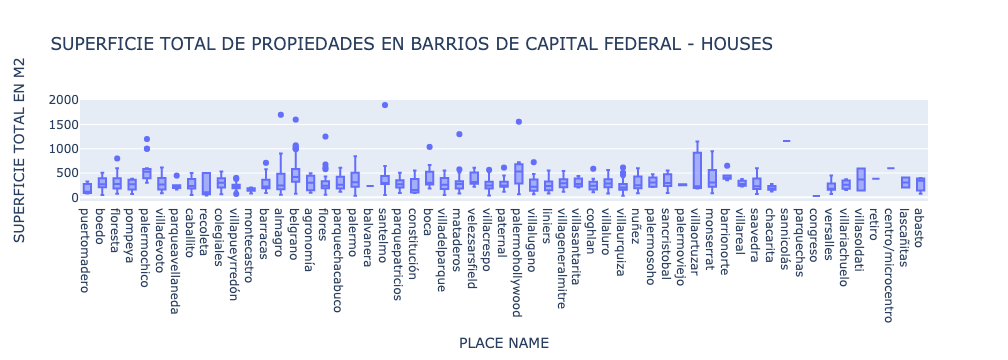

In [151]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')],\
             y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - HOUSES')
fig.show()

In [152]:
df_house = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]


### Floresta - house

In [153]:
floresta_index = df_house[df_house['PLACE NAME']=='floresta'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1].index

df_house[df_house['PLACE NAME']=='floresta'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]

SUPERFICIE TOTAL EN M2                   title  \
28921                 800.000  ventacasaenrumenco4amb   

                                                                                                                                                                                                                                                                                                                                        description  
28921  hermosacasaenventaenelexclusivobarrioderumencobarriolaslomascuentaconunterrenode800m2ubicacióneste-oeste,240m2cubiertos,3dormitorios1ensuiteconvestidor,losaradiante,doblevidriodecarpinteríadepvc,equipodeaireacondicionadofrio/calorenliving2bañoscompletos,2toilette,unoadentroyotroengalería,ampliofondocomún,soldetardeenjardínygaleria

In [154]:
df.loc[floresta_index,'SUPERFICIE TOTAL EN M2']=240

### Palermochico - house

In [155]:
palermochico_index = df_house[df_house['PLACE NAME']=='palermochico'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3].index
df_house[df_house['PLACE NAME']=='palermochico'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3]


SUPERFICIE TOTAL EN M2                           title  \
53791                1200.000               casa-palermochico   
10535                1000.000               casaestilofrances   
34570                1000.000  imponentecasaenbarrioparque!!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
53791  excepcionalcasaenventaenbarrioparqueexcepcionalresidenciaenunaubicacióndeexcelenciaenbarrioparque(ombúal3000,frentealaembajadasuiza)construccióndegrancalidad(mármolesitalianosencargadosespecialmenteparalapropiedad)lote261m2(10x26,10m)superficiecubierta:1100m2lacasaestádesarrolladaen:-subsuelodecocheras(para3autosconplatogiratorio),salademáquinas,taller,2cuartosdeservicioensuitequeventilanaunpatiointerno,lavadero,áreadeplanchadoypuertasblindadadeaccesoalaplantabaja;-plantabaja:importantehalldeentradacon2puertasdoblesrealizadasporebanistaselpisodelhalldeentradaesdemármolconunbellísimodibujodeunarosadelosvientos,quefuerealizadoconpequeñostrozosdemármoldediferentestonosycolores,traídosespecialmentedemilángranrecepción,conampliosventanaleshaciaelfrenteyhaciaelcontrafrentepisosdemármolescultóricoimportantechimeneaenmarcadaenparedesrecubiertasdemármollascolumnasdemármolfuerontraídastambiénespecialmentedemilán(soncilindroscortadosenmitadesyencastradosenuntrabajoúnico)sobreelcomedorunaimpactantepirámidevidriada,réplicadelmuseopompidoudepariscomedoríntimo,toilettederecepciónrevestidoíntegramenteenmármol(pisoypare

Se tratan de casos particulares de casas de muy alto nivel, vamos a dropearlas, ya que no son comunes.

In [156]:
df = df.drop(palermochico_index)

### Parque Avellaneda - house

In [157]:
df[df['PLACE NAME']=='parqueavellaneda'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]

SUPERFICIE TOTAL EN M2        title  \
37253                 447.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
37253  ventadecasa7ambientesomasenparqueavellaneda,capitalfederalmuybuenaubicacióna2cuadrasdeavjuanbalberdi,3deavdirectorio,1deavbruixhermosacasaconunparquehermosoypiscina,quincho,unacuchaexcelenteparasumascotaconuncanilexcelentedistribuciónenpb:constadehalldeentradaconplacardderecepción,ampliolivingcomedorluminoso,cocinacondoblecirculaciónyseparadaconcomedordiario,bañocompleto,cocheraparadosautosconlaescalerahaciaelsótano,lavaderoindependiente,dependenciadeservicioconbañocompletoyunhermosojardínconmuchoverdeconpiletaen1°pisoestánlas5habitacionesampliasconplacarescompletosyairesacondicionadosyescritorioconlos2bañosrestantescalefacción:porcalderavivaenunlugardiferenteenlacapitalfederalesunacasaexcelenteparaunafamilianumerosaalbariño102caba011/011--nirobrokers

### Villa Pueyrredon - house

In [158]:
pueyrredon_index_max=df_house[df_house['PLACE NAME']=='villapueyrredón'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2].index

pueyrredon_index_min = pueyrredon_index_max=df_house[df_house['PLACE NAME']=='villapueyrredón'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2')[['SUPERFICIE TOTAL EN M2','title','description']][:40].index


# df[df['PLACE NAME']=='villapueyrredón'].\
#                 sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]

df_house[df_house['PLACE NAME']=='villapueyrredón'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2')[['SUPERFICIE TOTAL EN M2','title','description']][:1]


SUPERFICIE TOTAL EN M2        title  \
15847                  70.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
15847  ventadecasatipotriplex3ambientesenvillapueyrredón,capitalfederalnoaptocreditocasatipotriplexde3ambientesenvillapueyrredonseaccedeporunaescaleraaltriplex,dondeseencuentralacocinaintegradaalliving/comedorytieneunbañocompartimentadoporescalerasevaalprimerpiso,queesunambientede250x2m,tipoescritorio,conunbañoconduchaysalidaaunaterrazade15m2enelsegundopiso,tienedosdormitoriosqueestánseparadosmedianteunaarcada--efegepropiedades

In [159]:
#No queda claro si es un departamento, o una casa, o ambos.
df = df.drop(pueyrredon_index_max[0])
df.loc[pueyrredon_index_min[0],'TIPO DE PROPIEDAD']='duplex/triplex'

### Barracas - house

In [160]:
barracas_index = df_house[df_house['PLACE NAME']=='barracas'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2].index
df_house[df_house['PLACE NAME']=='barracas'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description','TIPO DE PROPIEDAD']][:2]

SUPERFICIE TOTAL EN M2  \
5508                 710.000   
7472                 580.000   

                                                         title  \
5508    excelenteedificioenblock::idealinversiónparasubdividir   
7472  avregimientosdepatriicios::casade5ambconlocalde170m2enpb   

                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  \
5508  excelenteedificioenblockconstituidopor4deptos,todosconentradaindependiente,yunampliolocalenesquinacondosdormitoriosidealinversiónparasubdividiryreciclarendeptosdeunoodosambientes,tipophsinexpensasubicadaeneldistritodeldiseñodelazonasur,esidealparavenderconcréditoshipotecarios,yaqueposeenunatasadeinterésprivilegiadaeledificioseencuentraa7cuadrasdelaautopistaquecomunicaconelmetrobusdela9dejulioya5cuadrasdelaavvelezsarfieldrvbrokercontacto://15-   
7472                         casaenventayalquilerde580m2enlaplantabajaposeeunlocalde170m2cubiertos,condosbaños,entradadeautoypatioenelprimerpiso,unaviviendaconliving-comedor,cocinaconcomedordiario,4dormitorios,2bañosytoilettederecepciónporúltimo,enlaterrazaposeeunamplioquinchoconparrillalapropiedadseencentraareciclarsepuedenhacervariasreformas,entreellascrear3pisosdeplantaslibresyunapbdecocheras,obienmantenerlaestructuraactualrvbrokercontacto://15-   

     TIPO DE PROPIEDAD  
5508             house  
7472             house

Ambos son casos especiales, uno es un edificio, y el otro es una casa que tambien tiene un local

In [161]:
df = df.drop(barracas_index)

### Almagro - house

In [162]:
almagro_index=df_house[df_house['PLACE NAME']=='almagro'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1].index

df_house[df_house['PLACE NAME']=='almagro'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]

SUPERFICIE TOTAL EN M2        title  \
13706                1700.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
13706  ventadecasa8ambientesenalmagro,capitalfederalloteparaconstruir12pisosconstruir3176metroscuadrados,losdosprimerospisostodalasuperficiedellotefrente16mfondo50,34m-paraconstruirenalturaoalguninstitutoocolegiofos4lasmedidasydatossonatítuloinformativo,lasrealessurgirándelostítuloscorrespondienteselpresenteanuncioessoloatítuloinformativo,pueslaventadedichoinmuebleestásupeditadaaqueelpropietariotrámiteantelaafipelcoti--bettatispropiedades

tiene problemas de papeles esta propiedad

In [163]:
df = df.drop(almagro_index[0])

### Belgrano - house


In [164]:
belgrano_index = df_house[df_house['PLACE NAME']=='belgrano'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3].index
df_house[df_house['PLACE NAME']=='belgrano'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3]

SUPERFICIE TOTAL EN M2                       title  \
22297                1600.000          11deseptiembre1500   
34059                1070.000           virreydelpino3500   
10547                1050.000  impactantecasaestiloinglés   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
22297                                                                                                                                                                                 excelentecasadeestilo,absolutamenterefaccionadaconlosmejoresmaterialessobreunterrenode833ycon1600metroscubiertosconstruidosencuatroplantascondosentrepisos,cocheracubiertaensubsuelopara8vehículospb:halldeentrada,living,comedor,escritorio,play-room,toiletteycocina1ºpiso:livingintimo,4habitacionesensuitec/vestentrepiso:1habitaciónensuiteconvestidor2ºpiso:play-room,parrillainterna,bañoyterrazaconpiletade4x2segundoentrepiso:gym3ºpiso:2habitacionesconunbañosubsuelogarajepara8autos,cavadevinosybauleralacasacuentacon3habdeserviciocondosbañosylavadero,salademaquinasyespacioenelsubsueloparaelcuartodeseguridadjardínconparrillaascensoratodoslospisosclimatizadorfrío/calorentodalacasaimportantesistemadeseguridad  
34059                                                                                                                                                                                                                                                                                                                                                    casainglesaestilotudor,deprincipiosde1900completamenterestauradaporestudiocampsytiscorniaaproximadamente870m2cubiertosenterrenopropiode770m2doscocherasfijas(o4espaciosguardacoches)actualmentedeusoresidencialcompletamenterecicladaensuinteriorporsuimportantepresenciaesidealparausocomercialoinstitucional:centrodesalud,escueladenegocios,edificiosinstitucionales,embajadas,etclaventadeesteinmuebleestásujetaalatramitacióndelcódigodetransferenciadeinmuebles(coti),deconformidadconlanormativavigente(resafip2371/08,2439/08yccs)porpartedelpropietario  
10547  impactantecasaestiloingléseninmejorableubicación!(zonadeembajadas!!)-frentede20mtsrecicladaafullporimportanteestudiodearquitecturamanteniendolacalidadymaterialesdelaépoca!!-superluminosaysoleadaentodossusambientes-absolutamenteimpecablecomoaestrenar:idealresidenciadeembajador-casaen3plantasysubsuelo:-pb:-livingycomedor,toilette,cocina,comedordiarioyestar,bañoparapileta,2dependenciasconbaño,lavadero,patioconparrilla,jardínconpileta,entradadeservicio-1erpiso:-escritorio,3suites(mastersuite),2semisuites,2balconesterraza-2dopiso:-gym,granplayroom,baño,ampliaterraza,parrilla-subsuelo:-gransectordebauleraysalademáquinas,cochera4autos-cocinaequipadaconcocinaaristongrandecon6hornallasagasyhornoagas;campanadeaceroinoxidableelescritoriopuedeconvertirseen6todormitorioyelbañodeunadelassuitespuedesacarsehaciahalldeescalerappalcasaequipadaconrejasdeseguridadentodaslaspuertasyventanas

In [165]:
df.loc[belgrano_index[1],'SUPERFICIE TOTAL EN M2']=870

### Flores - house


In [166]:
flores_index = df_house[df_house['PLACE NAME']=='flores'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4].index
df_house[df_house['PLACE NAME']=='flores'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4]

SUPERFICIE TOTAL EN M2  \
58305                1251.000   
9404                  676.000   
42215                 610.000   
7836                  580.000   

                                                                        title  \
58305                                                             casa-flores   
9404                                                              casaenventa   
42215                                                             casaenventa   
7836   sevendecasadecategoríade580m2cubiertoscondepartamentoenpbindependiente   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  
58305                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ventaexcelentecasa7ambientespb:estarcomedor,cocinacomedordiario,dependenciadeservisioc/baño,patioconparque,pileta,garajeyquinchoen1°piso,5dormitorios(principalensuiteconhidro-masaje)yvestidormássegundobañocompleto,sauna,conkitchenettesubsuelo:playroomquincho:concocinapropiaparrillaybañocompleto(todorecicladoanuevo)lacasaseencuentraenexcelenteestado,aptocreditobancarioconsultar  
9404                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [167]:
#La casa tambien incluye un departamento dentro
df = df.drop(flores_index[3])

### Don Bosco - house

In [168]:
donbosco_index = df_house[df_house['PLACE NAME']=='donbosco'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1].index

df_house[df_house['PLACE NAME']=='donbosco'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]


Empty DataFrame
Columns: [SUPERFICIE TOTAL EN M2, title, description]
Index: []

In [169]:
df.loc[donbosco_index,'SUPERFICIE TOTAL EN M2']=1246

### San Telmo - house

In [170]:
otl_santelmo=df_house[df_house['PLACE NAME']=='santelmo'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]


otl_santelmo_min=df_house[df_house['PLACE NAME']=='santelmo'].\
sort_values('SUPERFICIE TOTAL EN M2')[['SUPERFICIE TOTAL EN M2','title','description']][:2]
otl_santelmo_min

SUPERFICIE TOTAL EN M2                                        title  \
2839                   45.000          u$d78000-tipocasaphenventa-peru1200   
41357                 167.000  casaenterrenopropioconlocalcomercialygarage   

                                                                                           description  
2839                còmodoph,2ambientes-bajasexpensas-cercanoahistòricaferiadesantelmo-impecableestado  
41357  casaconlocal,garage,terrazaaccesiblebañocompleto,patiodependencia,enterrenopropiolotede831x1836

Es un caso muy particular de propiedad, vamos a dropearlo

In [171]:
df = df.drop(otl_santelmo.index[0])

In [172]:
df.loc[otl_santelmo_min.index[0],'TIPO DE PROPIEDAD']='ph'

### Boca - house

In [173]:
otl_boca=df_house[df_house['PLACE NAME']=='boca'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_boca

SUPERFICIE TOTAL EN M2                       title  \
41641                1038.000  casaantiguasobrelotepropio   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
41641  amtsdelaavalmirantebrownydepedrodemendoza,seencuentraesteinmuebledeedificaciónantiguade3plantas,sobrelotepropiodeampliasdimensiones14,20defrentex54,83porsucostadoizqx52,12sobresucostadoder,yfondode14,24conunmartillode1,96x379,superficietotal751m2,edificadaen2plantas,compuestode4unidadesfuncionalesactualmente:doslocales,unode116,40m2totales,yelsegundode175,91m2,masdosufenlaplantaprimeraconentradacomún,losmismossondosdepartamentoantiguosarefaccionar,unode3habitaciones,hall,cocina,bañoyterrazaenlamismaplantamasotraenunaterceraplantayelotroposee4habitaciones,hall,cocina,bañoyterrazaenlamismaplanta,masotraenunaterceraplantaelinmuebleseencuentrasubdivididoen5unidadesfuncionales-

In [174]:
#Tiene varios locales esta propiedad

df= df.drop(otl_boca.index)

### Villa del Parque - house

In [175]:
otl_villadelparque=df_house[df_house['PLACE NAME']=='villadelparque'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_villadelparque

SUPERFICIE TOTAL EN M2  \
5092                 552.000   

                                                     title  \
5092  excelentecasade408metroscub5dormitoriosusosmultiples   

                                                                                                                                                                                                                                                                                                                                                             description  
5092  casasobrelotede866x37,de5dormitorios4baños,cona,ccomedordiario,lliving,otrolivingenprimerpisoosaladeestar,jardindeinvierno,patioconpiscina-areparar-,dossalonesde3x8lavadero,granterraza,cocherasemicubierta,casamuyinteresanteportodoslosusosqueselepuedendaryaseacomoviviendaousocomercial,tallerestextiles,institutosdeenseñanza,esteticosetc-***dignadever****

### Mataderos - house

In [176]:
otl_mataderos=df_house[df_house['PLACE NAME']=='mataderos'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]
otl_mataderos

SUPERFICIE TOTAL EN M2           title  \
84114                1300.000  casa-mataderos   
74344                 575.000  casa-mataderos   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
84114                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              importanteresidenciade1300m2totalessobrelotede20x40mtrsgarage3ó4autoscocina-comedorgranliving-comedoren"l"4dormitoriosampliossuite+mastersuitecondoblevestidor+sauna+hidro+kitchinetyescritoriofondolibre+pileta+doblequinchovidriadosalóndefiestade100m2totalmenteequipadoconbarra,bañoysaladedja11/2cuadradelcentrocomercialavjuanbautistaalberdi!!excelentezonaycomodidades!!-seescuchanpropuestasporpermutaomenorvalor-  
74344  ventacasaenmataderos3ambientescongarajecasasobrelotepropiode:8,66x42,72mfrenteconaccesoacocheracubiertaconrejaslivingcomedor:8x4,20mconpisosdemármolyventanalalfrente,muyluminosoaccesoacocinaporarcadadecorativacocinacomedor:4,50x4mconmesadaenu,conmueblesdebajomesadayalacena,anafeyhornoempotrado,lugarparaheladerayparaunamesagrande,ventanasqueorientanalpatioyparquebrindandomuybuenailuminaciónnaturallapropiedadtienedoblecirculaciónentrelacocinaylosdormitoriosyellivinghalldedistribución1°baño:2x2,20completoconvanitory,hidromasaje,mamparayrevestimientoenpisosyparedesdecerámica1°dormitorio:3,50x4malfombrado,ventanalalfrente,placardenmaderadecedro,airesplit2°dormitorio:4x3mconplacardigualalanterior,ventanaalparquegalería:4x8,66cubiertaconpisosdemosaico,accesodesdelacocinajardín:8,66x18conquincho,piletaydependenciapileta:5x3,30mdefibra,completaconfiltro,bombaquincho:8,66x4mconlahabitacióndeservicioybañoterraza:detodalasuperficiedelapropiedadlavadero:4x3menlaterraza,completoparacomunicarseyvisitar,fjlujánpropiedades40añosdeexperienciaytrayectoriaavisolegal:importante:lasmedidas,imágenes,videos,superficies,preciosydemáscaracterísticasexpuestosenéstesitiosonaproximados,decarácterilustrativoypuedenmodificarsesinprevioavisopartedelasinmobiliariasfjlujánpropiedades/

In [177]:
#El primer caso es muy raro, vamos a dropearlo.
df = df.drop(otl_mataderos.index[0])

### Villa Crespo - house

In [178]:
otl_crespo=df_house[df_house['PLACE NAME']=='villacrespo'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_crespo

SUPERFICIE TOTAL EN M2                                title  \
56064                 565.000  excelentecasaeninmejorableubicación   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
56064  excelentecasaeninmejorableubicaciónmedidasdelterreno:8,50mtsx25mtssuperficiedelterreno:212m²superficiecubierta:495m2superficietotal:565m2plantabaja:escritorio,toilettederecepción,cocinaconmueblesbajomesadayalacena,ampliocomedordiarioalfrentegranlivingcondoblealturaycomedorconpisosdemaderalamismaposeesalidaalpatioconparrillaplantaalta1:dormitorioprincipalalcontrafrenteconsalidaabalcón,poseevestidorybañoensuitesegundodormitorioytercerdormitorioconampliosplacardsylosdosconbañoensuiteplantaalta2:playroom,bañocompleto,saladelectura,altilloysalidaaunaampliaterrazadetallesdecategoría:aberturasdemaderavidriorepartido,calefacciónyaireacondicionadocentral,ascensor,alarmamonitoreadasubsuelo:cocheracubiertaparacuatroautos,ampliabaulera,gimnasio,bañocompletodependenciadeservicio,bañodeservicio,bodegaysalademaquinasexcelentezonaycuadra,cercaníaalparquecentenario,atrescuadrasdeavscalabriniortizyacincocuadrasdelsubtelineab,pologastronómicoycomercialimportante**lasmedidasysuperficiesexpuestassurgendelainformaciónsuministradaporelpropietario****cotientramite**

In [179]:
df.loc[otl_crespo.index,'SUPERFICIE TOTAL EN M2']=495

### Paternal - house

In [180]:
otl_paternal=df_house[df_house['PLACE NAME']=='paternal'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_paternal

SUPERFICIE TOTAL EN M2                              title  \
11130                 612.000  casade4ambientesenventaenpaternal   

                                                                  description  
11130  excelenteloteparaedificar,salen1636metrosvendibles,ametrosdejuanbjusto

In [181]:
df = df.drop(otl_paternal.index[0])

### Villa lugano - house

In [182]:
otl_lugano=df_house[df_house['PLACE NAME']=='villalugano'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_lugano

SUPERFICIE TOTAL EN M2        title  \
15839                 723.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
15839  ventadecasa3ambientesenvillalugano,capitalfederalexcelentecasacondetallesdecategoríaenlotede10mx7255mconunaestéticamodernayunaconstrucciónsolida,estahermosacasacuentaconungranlivingcomedor,cocinaseparadaconcomedordiario,quincho,patioconparrillayfondode51mconarboladoyparquizadoenlaplantaalta,poseedosdormitoriosampliosconbañoyvestidorensuitampliohallintimotodoenperfectoestado!!!!cuentaademasconunaexcelenteoportunidaddeampliación,yaquetieneplanosaprobadospara2dormitoriosyunbañomas,enlaplantaalta,sobreelgaragepasantehoyendiadescubierto!noaptocreditodebanco!!!!nodudeenconsultar!!!medidasysuperficiesexpuestassonaproximadas,losdatosdefinitivossurgirándeltítulodepropiedadelvalorconsignadodeexpensasmensualesestásujetoaverificacióny/oajustes---mpinmuebles

Es un caso particular, vamos a dropearlo.

In [183]:
df = df.drop(otl_lugano.index)

### Coglhan - house

In [184]:
otl_coghlan=df_house[df_house['PLACE NAME']=='coghlan'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_coghlan

SUPERFICIE TOTAL EN M2                  title  \
84231                 588.000  casasobrelotede866x40   

                                                                                                                                                                                                                                                                                                                                                                                    description  
84231  casadecategoriasobrelotepropiode866x40,importantejardín(8,66x17)cocheracubiertaconportónautomático,dosdependenciasconbañocompleto,granlivingcomedor,toilete,ampliosdormitoriosconplacares,posibilidadesdeampliar,excelenteestructuralosdatos,medidasydemáscircunstanciassonmeramenteorientativosyestánsujetosarevisióny/overificaciónelpreciodelinmueblepuedesermodificadosinprevioaviso

In [185]:
#Se trata de una casa muy grande, es un caso especial

df = df.drop(otl_coghlan.index)

### Villa Urquiza - house

In [186]:
otl_urquiza=df_house[df_house['PLACE NAME']=='villaurquiza'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:3]
otl_urquiza

SUPERFICIE TOTAL EN M2                                      title  \
85574                 613.000                          casa-villaurquiza   
9984                  500.000  reservado-casasobrelotepropiode8,66x37,53   
85771                 500.000                          casa-villaurquiza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
85574  unacasaexcepcionalenelcorazóndevillaurquizasobrelotedobledetallesdecalidadylujoentodalapropiedadpisosymesadasdemármolitalianosimportadosespecialmenteaireacondicionadocentralfriocalorentodalasuperficiecalefaccionporairecentralsistemaautomatizadodeiluminaciónprogramadodediferentesambientacionessistemadeaudioempotradoenlivingyrecepcionchimeneapiscinaclimatizadade3,75por10conampliovestuarioybañocompletoquinchocerradoconcapacidadpara30personasde9,50mx5melquinchotienesuparrillaycocina,hogaryairesacondicionadospropiosbañosprincipalesconhidromasajesaguacalienteportermotanque,dostermosdealtarecuperacióndegrancapacidadautomatizacióndepersianasaltillodeimpresionantedimensionesconexcelentesplacaresdeguardadoseguridadmonitoreada24horasconalarmasysensoresycámarasdealtacalidadabl$8500-observaciones:lassuperficiesymedidasexpresadassonaproximadasyseexponenalsóloefectoorientativoynosonvinculantes,lasdefinitivassurgirándelaescrituray/oplanosaprobadosdelapropiedadelmontodeexpensasreal,delreciboemitidoporlaadministracióndelconsorciodecopropietariosquerigeelinmueblelapresenteofertadeventaestácondicionadaalaobtencióndelcotiporpartedelpropietario(resolafip2371)  
9984                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          casade4ambientesconjardín,quinchoconparrillayterraza-lotepropiode8,66x37,53-posibilidaddeconstruirdtosenterrazayderealizarviviendamultifamiliar-muybuenaconstrucción-granlivingcomedor-escritorio-3baños-cocinacomedor-lavaderoindependiente-superluminosa-reservado!delapaz1970consúltenos:  
85771                                                                                                                                                                                                          

In [187]:
#El primer valor, es un caso particular, y dsp el otro, esta duplicado

df = df.drop(otl_urquiza.index[:2])

### Barrio Norte - house

In [188]:
otl_norte=df_house[df_house['PLACE NAME']=='barrionorte'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_norte

SUPERFICIE TOTAL EN M2                      title  \
54138                 650.000  edificoenventabarrionorte   

                                         description  
54138  edificioenventabarrionorteplanchetadisponible

In [189]:
#Se trata de un edificio entero
df=df.drop(otl_norte.index)

In [190]:
df_casas_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]
df_casas_caba.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 512.000     4.000                   1216.000   
mean   2.000   4.836  4525.250                    232.855   
std      NaN   1.805  4445.914                    273.838   
min    2.000   1.000     1.000                      1.000   
25%    2.000   4.000  1500.250                    130.000   
50%    2.000   5.000  4050.000                    200.000   
75%    2.000   6.000  7075.000                    294.000   
max    2.000  18.000 10000.000                   8175.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 941.000            805.000    1242.000    1240.000  
mean                  303.225           1626.362  465887.440  465402.581  
std                   180.210            932.021  454976.271  454677.915  
min                    28.000            257.143   63000.000   63000.000  
25%                   182.000           1083.333  240000.000  240000.000  
50%                   263.000           1439.024  350000.000  350000.000  
75%                   390.000           1956.522  500000.000  500000.000  
max                  1600.000          12121.212 6200000.000 6200000.000

In [191]:
muchos_m2_cubiertos=df_casas_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending=False)[:7].index
df_casas_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending=False)[:7]

operation property_type    place_name  \
42687      sell         house       liniers   
22297      sell         house      belgrano   
18013      sell         house      santelmo   
10349      sell         house  villaortuzar   
10060      sell         house      belgrano   
50048      sell         house      belgrano   
10547      sell         house      belgrano   

                       place_with_parent_names country_name      state_name  \
42687       |argentina|capitalfederal|liniers|    argentina  capitalfederal   
22297      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
18013      |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
10349  |argentina|capitalfederal|villaortuzar|    argentina  capitalfederal   
10060      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
50048      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
10547      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   

       geonames_id                lat-lon     lat     lon       price  \
42687  3431333.000    -34642482,-58528451 -34.642 -58.528  165000.000   
22297  3436077.000  -345639863,-584466546 -34.564 -58.447         NaN   
18013  3428113.000    -34623938,-58371177 -34.624 -58.371 1380000.000   
10349  3427387.000  -345686572,-584643072 -34.569 -58.464 2500000.000   
10060  3436077.000    -34570631,-58462415 -34.571 -58.462 2500000.000   
50048  3436077.000                    NaN     NaN     NaN         NaN   
10547  3436077.000   -34570603,-584609372 -34.571 -58.461 2800000.000   

      currency  price_aprox_local_currency  price_aprox_usd  \
42687      usd                 2911342.500       165000.000   
22297      NaN                         NaN              NaN   
18013      usd                24349410.000      1380000.000   
10349      usd                44111250.000      2500000.000   
10060      usd                44111250.000      2500000.000   
50048      NaN                         NaN              NaN   
10547      usd                49404600.000      2800000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
42687                  NaN               8175.000               NaN   
22297             1600.000               1600.000               NaN   
18013                  NaN               1030.000               NaN   
10349             1150.000               1015.000          2173.913   
10060                  NaN               1015.000               NaN   
50048                  NaN               1000.000               NaN   
10547             1050.000                980.000          2666.667   

       price_per_m2  floor  rooms  expenses  \
42687        20.183    NaN  4.000       NaN   
22297           NaN    NaN    NaN       NaN   
18013      1339.806    NaN  9.000       NaN   
10349      2463.054    NaN    NaN       NaN   
10060      2463.054    NaN 12.000       NaN   
50048           NaN    NaN    NaN       NaN   
10547      2857.143    NaN    NaN       NaN   

                                                                                                                                                                                                         properati_url  \
42687                                                                                                          http://wwwproperaticomar/19rpq_venta_casa_liniers_lavadero_patio_toilette_garage_placard_re-max-total-v   
22297                                    http://wwwproperaticomar/180qv_venta_casa_belgrano_baulera_suite_gimnasio_jardin_lavadero_parrilla_piscina_terraza_toilette_vestidor_garage_subte-linea-d_achaval-cornejo_edw   
18013                                                                                                                                              http://wwwproperaticomar/17lb0_venta_casa_san-telmo_re-max-d-bosion   
10349                                                       http://wwwproperaticomar/16p

Una superficie cubierta de 8000m2 para una casa, es muy extraño,asi como tambien un valor de superficie total inferior a superficie cubierta

In [192]:
df = df.drop(muchos_m2_cubiertos[:4])


In [193]:
# Vamos a poner un minimo de 20m2 cubiertos para casas.
pocos_m2_cubiertos=df_casas_caba[df_casas_caba['SUPERFICIE CUBIERTA EN M2'] < 20].index
df_casas_caba[df_casas_caba['SUPERFICIE CUBIERTA EN M2'] < 20]

operation property_type      place_name  \
6210       sell         house     villadevoto   
6216       sell         house  villasantarita   
17401      sell         house  villadelparque   
24872      sell         house     villalugano   
24873      sell         house     villalugano   
31782      sell         house     montecastro   
36142      sell         house       versalles   
40827      sell         house  villadelparque   
41284      sell         house  villasantarita   
42064      sell         house          abasto   
42982      sell         house       versalles   
48338      sell         house        paternal   
78954      sell         house     villadevoto   
84840      sell         house       chacarita   

                         place_with_parent_names country_name      state_name  \
6210      |argentina|capitalfederal|villadevoto|    argentina  capitalfederal   
6216   |argentina|capitalfederal|villasantarita|    argentina  capitalfederal   
17401  |argentina|capitalfederal|villadelparque|    argentina  capitalfederal   
24872     |argentina|capitalfederal|villalugano|    argentina  capitalfederal   
24873     |argentina|capitalfederal|villalugano|    argentina  capitalfederal   
31782     |argentina|capitalfederal|montecastro|    argentina  capitalfederal   
36142       |argentina|capitalfederal|versalles|    argentina  capitalfederal   
40827  |argentina|capitalfederal|villadelparque|    argentina  capitalfederal   
41284  |argentina|capitalfederal|villasantarita|    argentina  capitalfederal   
42064          |argentina|capitalfederal|abasto|    argentina  capitalfederal   
42982       |argentina|capitalfederal|versalles|    argentina  capitalfederal   
48338        |argentina|capitalfederal|paternal|    argentina  capitalfederal   
78954     |argentina|capitalfederal|villadevoto|    argentina  capitalfederal   
84840       |argentina|capitalfederal|chacarita|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon      price  \
6210   3427451.000        -346113787,-585014969 -34.611 -58.501 220000.000   
6216   6693230.000         -34613523,-584908717 -34.614 -58.491 240000.000   
17401  3427455.000        -346075704,-584953795 -34.608 -58.495 380000.000   
24872  3427408.000         -34679962,-584685505 -34.680 -58.469 225000.000   
24873  3427408.000        -346776466,-584705797 -34.678 -58.471 200000.000   
31782  3430596.000         -34620674,-585058262 -34.621 -58.506 410000.000   
36142  3427510.000        -346260871,-585202126 -34.626 -58.520 510000.000   
40827  3427455.000         -34616343,-585098021 -34.616 -58.510 350000.000   
41284  6693230.000  -346128135378,-584871935143 -34.613 -58.487 650000.000   
42064          NaN                          NaN     NaN     NaN        NaN   
42982  3427510.000        -346327991,-585234444 -34.633 -58.523 210000.000   
48338  3430087.000        -345958969,-584715637 -34.596 -58.472 350000.000   
78954  3427451.000         -346102475,-58524242 -34.610 -58.524 480000.000   
84840  3435506.000        -345881388,-584451121 -34.588 -58.445        NaN   

      currency  price_aprox_local_currency  price_aprox_usd  \
6210       usd                 3881790.000       220000.000   
6216       usd                 4234680.000       240000.000   
17401      usd                 6704910.000       380000.000   
24872      usd                 3970012.500       225000.000   
24873      usd                 3528900.000       200000.000   
31782      usd                 7234245.000       410000.000   
36142      usd                 8998695.000       510000.000   
40827      usd                 6175575.000       350000.000   
41284      usd                11468925.000       650000.000   
42064      NaN                         NaN              NaN   
42982      usd                 3705345.000       210000.000   
48338      usd                 6175575.000       350000.000   
78954      usd                 8469360.000       480000.000   
8

In [194]:
df = df.drop(pocos_m2_cubiertos)

In [195]:
muy_barata=df_casas_caba.sort_values('PRECIO USD POR M2')[:7].index
df_casas_caba.sort_values('PRECIO USD POR M2')[:7]

operation property_type  place_name  \
7873       sell         house        boca   
10271      sell         house   caballito   
16608      sell         house  sannicolás   
41660      sell         house        boca   
3593       sell         house        boca   
115        sell         house    floresta   
11701      sell         house    floresta   

                     place_with_parent_names country_name      state_name  \
7873         |argentina|capitalfederal|boca|    argentina  capitalfederal   
10271   |argentina|capitalfederal|caballito|    argentina  capitalfederal   
16608  |argentina|capitalfederal|sannicolás|    argentina  capitalfederal   
41660        |argentina|capitalfederal|boca|    argentina  capitalfederal   
3593         |argentina|capitalfederal|boca|    argentina  capitalfederal   
115      |argentina|capitalfederal|floresta|    argentina  capitalfederal   
11701    |argentina|capitalfederal|floresta|    argentina  capitalfederal   

       geonames_id                lat-lon     lat     lon      price currency  \
7873   3436004.000  -346344961,-583631337 -34.634 -58.363 135000.000      usd   
10271  3435874.000   -34624673,-584302634 -34.625 -58.430 130000.000      usd   
16608  6693229.000  -346042126,-583894037 -34.604 -58.389 350000.000      usd   
41660  3436004.000   -34633823,-583598175 -34.634 -58.360 125000.000      usd   
3593   3436004.000  -346370988,-583582907 -34.637 -58.358 180000.000      usd   
115    3433910.000  -346280255,-584662479 -34.628 -58.466 219500.000      usd   
11701  3433910.000  -346246787,-584874405 -34.625 -58.487  75000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
7873                  2382007.500       135000.000              525.000   
10271                 2293785.000       130000.000              450.000   
16608                 6175575.000       350000.000             1159.000   
41660                 2205562.500       125000.000              400.000   
3593                  3176010.000       180000.000              524.000   
115                   3872967.750       219500.000              600.000   
11701                 1323337.500        75000.000              200.000   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
7873                 525.000           257.143       257.143    NaN    NaN   
10271                100.000           288.889      1300.000    NaN  4.000   
16608                440.000           301.984       795.455    NaN    NaN   
41660                100.000           312.500      1250.000    NaN    NaN   
3593                 524.000           343.511       343.511    NaN    NaN   
115                  170.000           365.833      1291.176    NaN  3.000   
11701                 55.000           375.000      1363.636    NaN  3.000   

       expenses  \
7873        NaN   
10271       NaN   
16608       NaN   
41660       NaN   
3593        NaN   
115         NaN   
11701       NaN   

                                                                                                                                                             properati_url  \
7873                                                                           http://wwwproperaticomar/1686m_venta_casa_boca_grupo-lamadrid-constructora-inmobiliaria_euz   
10271                                                                                  http://wwwproperaticomar/16p65_venta_casa_caballito_subte-linea-e_inmobiliaria-diez   
16608  http://wwwproperaticomar/17ftc_venta_casa_san-nicolas_balcon_lavadero_piscina_toilette_vestidor_subte-linea-d_subte-linea-b_subte-linea-a_daniel-zunino-propiedades   
41660                                                                      http://wwwproperaticomar/19pd3_venta_casa_boca_lavadero_vista_luis-loray-negocios-inmobiliarios   
3593                                                                                           http://wwwproperaticomar/15odp_vent

In [196]:
df = df.drop(muy_barata[:1])
#Demasiado bajo el valor de la propiedad mas barata

In [197]:
demasiado_cara = df_casas_caba.sort_values('PRECIO USD', ascending = False)[:7].index
df_casas_caba.sort_values('PRECIO USD', ascending = False)[:7]

operation property_type        place_name  \
43305      sell         house      palermochico   
4356       sell         house      palermochico   
50496      sell         house  palermohollywood   
53101      sell         house      palermochico   
20420      sell         house      palermochico   
15621      sell         house      palermochico   
25048      sell         house           palermo   

                                   place_with_parent_names country_name  \
43305      |argentina|capitalfederal|palermo|palermochico|    argentina   
4356       |argentina|capitalfederal|palermo|palermochico|    argentina   
50496  |argentina|capitalfederal|palermo|palermohollywood|    argentina   
53101      |argentina|capitalfederal|palermo|palermochico|    argentina   
20420      |argentina|capitalfederal|palermo|palermochico|    argentina   
15621      |argentina|capitalfederal|palermo|palermochico|    argentina   
25048                   |argentina|capitalfederal|palermo|    argentina   

           state_name  geonames_id                      lat-lon     lat  \
43305  capitalfederal          NaN          -3457933,-583995855 -34.579   
4356   capitalfederal          NaN        -345804578,-584010945 -34.580   
50496  capitalfederal          NaN  -345834449283,-584373002989 -34.583   
53101  capitalfederal          NaN                          NaN     NaN   
20420  capitalfederal          NaN        -345774344,-584014371 -34.577   
15621  capitalfederal          NaN  -345775100971,-584013239437 -34.578   
25048  capitalfederal  3430234.000          -34569765,-58439283 -34.570   

          lon       price currency  price_aprox_local_currency  \
43305 -58.400 6200000.000      usd               109395900.000   
4356  -58.401 4000000.000      usd                70578000.000   
50496 -58.437 3500000.000      usd                61755750.000   
53101     NaN 3200000.000      usd                56462400.000   
20420 -58.401 3200000.000      usd                56462400.000   
15621 -58.401 3200000.000      usd                56462400.000   
25048 -58.439 3000000.000      usd                52933500.000   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
43305      6200000.000                  NaN                970.000   
4356       4000000.000              330.000                330.000   
50496      3500000.000             1556.000                    NaN   
53101      3200000.000              530.000                530.000   
20420      3200000.000              527.000                527.000   
15621      3200000.000              600.000                500.000   
25048      3000000.000                  NaN                 20.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
43305               NaN      6391.753    NaN    NaN       NaN   
4356          12121.212     12121.212    NaN    NaN       NaN   
50496          2249.357           NaN    NaN    NaN       NaN   
53101          6037.736      6037.736    NaN    NaN       NaN   
20420          6072.106      6072.106    NaN    NaN       NaN   
15621          5333.333      6400.000    NaN    NaN       NaN   
25048               NaN    150000.000    NaN  6.000       NaN   

                                                                                                                                                                                                               properati_url  \
43305                            http://wwwproperaticomar/19tna_venta_casa_palermo-chico_balcon_suite_jardin_lavadero_parrilla_piscina_toilette_vista_dependencias_garage_impecable_placard_aire-acondicionado_l-j-ramos_g89   
4356                                                                 http://wwwproperaticomar/15s4h_venta_casa_palermo-chico_suite_jardin_parrilla_patio_piscina_terraza_toilette_dependencias_garage_pinto-kramer-group_ep9   
50496                                                                      http://wwwproperaticomar/1aejf_venta_

In [198]:
# El valor mas caro, es un edificio, no una casa
df = df.drop(demasiado_cara[1])


## PH

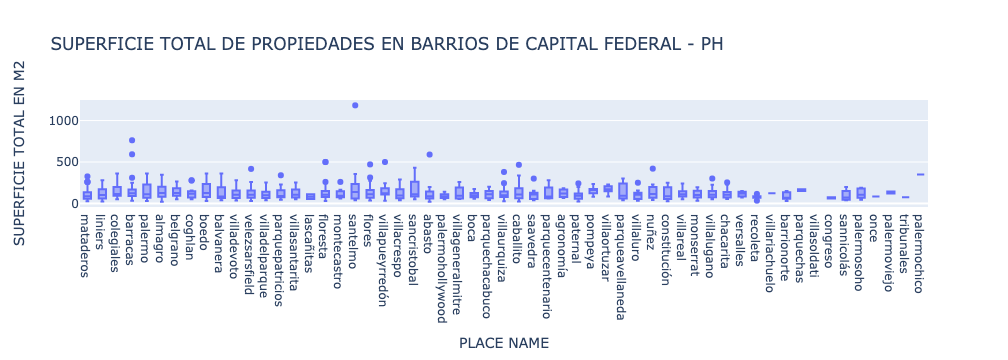

In [199]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')],\
             y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PH')
fig.show()

In [200]:
df_ph = df[df['TIPO DE PROPIEDAD']=='ph']

### Mataderos - PH

In [201]:
otl_mataderos=df_ph[df_ph['PLACE NAME']=='mataderos'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:5]
otl_mataderos[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
421                   326.000  245000.000   
21857                 260.000  130000.000   
19680                 260.000  180000.000   
57587                 260.000  290000.000   
14187                 250.000  200000.000   

                                                                       title  \
421                                            hermosacasaenventaenmataderos   
21857                              phalfondo7ambientes-mataderos-guamini2400   
19680                                                         ph7ambconfondo   
57587                           phmataderosexcelenteoportunidadpara2familias   
14187  excelente5ambientescongge,3baños,patio,terraza,quincho,200m2cubiertos   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  
421                                                                                                                                                                   espectacularphalfrenteenplantabaja,ubicadoenlazonademataderossobrelotede10mx35mtipocasaconentradaindependientesinexpensas!jardinalfondoconmicro-climaypiscinariñon100%luminosoequipamiento:3habitacionesexcelentelivingdiariogarajeconportonde2,40mx3m(capacidadparadosautos)quinchoconparrillalavaderojardindeinviernoexcelentesdetallesdecategoría:*revestimientoenmadera*frentedeladrillosalavista*ambientesamplios*todaslasventanasequipadasconrejasespectacular,paranodejardever!  
21857                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                6habitacionescocina2bañosterrazac/preparadoparaconstruirrecicladoanuevo  
19680                                                                                                                                                                                                                                                                                                                                                                                                                                     phen2plantasconfondoyparrilla,7ambientes,3baos,comedor,lavaderoyampliacocinacomedorde40m2,fondode110m2y2baulerasy/otaller,excelenteubicaciona3cuadrasdeavevaperony5deavdirectoriopublicadoporsoaynosatravesinmomap  
57587  oportunidadpara2familiaspropiedadconjuntayalaveztotalmenteseparadaseindependientes,sevendenjuntasoenformaseparadaenpbundepartamentode3ambientes,dosdormitorios,livingcomedor,cocinaindependiente,patioconlavaderoyfondolibrepropioenpadepartamentomuycómodo1erpiso,balcónalfrentedetodoelancholote,con2dormenprimerpiso,baño,cocinacomedordiario,salidaabalcónterrazadelfondo,conlavadero,yescaleraqueconectacondptoenplantasuperioren2daplantaundormitorioconbañoyluegounespaciotipoplayroom-quinchooelusoquesequieradestinar,conparrillacerrada,barraventanaconpuertabalcónhaciagranbalcón,hayunhornodebarroallítodoenbuenestadogeneralyfuncionando  
14187                                                       

In [202]:
# Con el primer valor, no queda claro si es un ph o una casa, vamos a dropearlo
df = df.drop(otl_mataderos.index[:1])


### Barracas - PH

In [203]:
otl_barracas=df_ph[df_ph['PLACE NAME']=='barracas'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_barracas[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
45949                 762.000 1250000.000   
17341                 593.000  350000.000   
3604                  310.000  250000.000   

                                               title  \
45949                                      phenventa   
17341  phde6ambientesconterrazayentradaindependiente   
3604       ph4ambientescondependencia2patiosyterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  
45949  son11departamentos/estudiosenblock¡¡todosalquiladosconexcelentesgarantiayrentas!!!tienenelplanodesubdivisionaprobadoporlamunicipalidadperonoloinscribieronenelregistrodelapropiedaddeinmuebleparapagarmenosabl)solofaltariahacerelreglamentodecopropiedadeinscribirloson6dptosde2ambconterrazayparrilla,1dptode3amb,4dptosde2ambsinterraza,(unodeellosenprimerpisoporescalera)son530m2cubiertos+72m2depatios+160m2deterrazalotede815x5055--mosquerapropiedades  
17341                                                                                                                                                        phde6ambientesconterrazayentradaindependienteenplantaalta,alfrentecon261m2cubiertosy332m2descubiertosorientaciónesteynorte,solyluzhall,estar-comedor,5dormitorios(2conbañoconbañeraensuite),toilette,2cocinas,lavadero,galeríasysótanotechosdedoblealtura,pisosdepinoteaydetallesconstructivosoriginales  
3604                                                                                                                                                                                                                                                                                                                                                                   hermosophconentradaindependiente2patios2terrazasparrilla,cocinaysanitariosaterminarmuyluminoso

In [204]:
# Los 2 ph mas grandes, son casos muy particulares, vamos a dropearlos, ya que es poco usual un inmueble de esas caracteristicas.

df = df.drop(otl_barracas.index[:2])

### Coghlan - PH

In [205]:
otl_coghlan=df_ph[df_ph['PLACE NAME']=='coghlan'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_coghlan[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD       title  \
55999                 280.000  319000.000  ph-coghlan   
15819                 276.000  350000.000   phenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
55999  phalfrenteenpbsinexpensas,entradaindependiente,cocherapropiacubierta,granterraza+patioanivel,cocinaconampliocomedor,livingcomedorconpisosdeparquet,dosampliosdormitoriosconimpotantesplacares+dependenciaenelcircuitodellosdormitoriosquepuedeseruntercerdormitorio(2placres)gransotanoquepuedeserunplayroom,dobleentradalosdatos,medidasydemáscircunstanciassonmeramenteorientativosyestánsujetosarevisióny/overificaciónelpreciodelinmueblepuedesermodificadosinprevioaviso  
15819                                                                                                                                                                           importantephapulmóndemanzanaalnoroeste,conunacocheradobledosbaulerasyterrazas1ºplanta:halldeentrada,granlivingcomedoraterraza,toilette,cocina,comedordiario,lavadero,despensa2ºplanta:4dormitorios(1ensuite),2bañoscompletosterraza3ºplanta:azoteaydependenciadeservicio--feracancellieripropiedades

### Velez Sardfield - PH

In [206]:
otl_velezsardfield=df_ph[df_ph['PLACE NAME']=='velezsarsfield'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_velezsardfield[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
83322                 417.000  365000.000   
28263                 260.000  300000.000   

                                                 title  \
83322                               phenvelezsarsfield   
28263  redesanmartin4527vélezsphpb4ambu$300000aptoprof   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
83322  elinmuebleesunaphdetresunidadesfuncionaleslaufnº1seubicaenplantabajaytieneaccesoindividualporelnºdepuerta4855cedeservidumbredepasoafavordelasufnº2y3paralaatenciónymantenimientodeltanquedebombayelectrobombaporelnº4857,seaccedealasunidadesnº2(“a”)ynº3(“b”)deplantaaltalastresufhacenusodeunespacioguardacochesalfrentedelinmueble,concapacidadparatrescocheslapropiedadconstadecocina-livingde3,5mx8,5m,habitaciónde3,5mx3,5m,lavaderode1,5mx2,2m,ante-bañode1mx2m,bañoconbañerade2mx2m,habitaciónde5mx5m,livingde3mx3m,alfondounpatioconjardínyunahabitaciónalfinaldelmismode3mx3mtodoseencuentraenbuenestadodeusoyconservación,evidenciándosehumedadenelcentrodelacocina-livingyenelpasilloquedaalpatioposeeunasuperficietotal,segúntítulo,de417,05m2,porcentual42enteros59centésimos,quesecomponedesuperficiecubierta133,51m2,superficiesemicubierta26,15m2ysuperficiedescubierta257,39m2seguinosenfacebook:inmobiliariagustavodallenogareóhttps://(copiáypegáellink)rematejudicial  
28263                                                                                                                                                         ultimopreciou$300000oportunidad,con70m2deparqueaptoprofesionalhermosophmuyluminosode4ambientes,alcontrafrentesinexpensasorientaciónnortesuperficietotalde260m²,cubiertade170m²ydescubiertade90m²3dormitoriosy2baños,unocompletoyuntoilettepisosdeparquetantigüedad12añosbauleradetallesdecategoríasólo2unidadesenellote,entradaindependiente2plantaspb:salaconjardíndeinvierno,cocinaintegrada,living-comedor,toilette,salidaaljardínde70m²(opcióndehacerpiscina)pa:2dormitoriosconplacardconvistaaljardín,bañocompletoyotrodormitorioamplio(posibilidaddeagregarun4ºdormitoriooagregarunbañoensuite),conplacard,ysalidaabalcón-terrazade20m²colectivos:25,34,47,85,99,106,107,114,166,172,181ventasujetaalaobtencióndelcotiporpartedelpropietariolasreservassetomanexclusivamenteenlainmobiliariaconelmatriculado-matriculacpi6099

In [207]:
# Vamos a dropear este caso particular de ph enorme para lo que es la zona y los valores promedio de m2 de ph.
df = df.drop(otl_velezsardfield.index[:1])


### Parque Patricios - PH

In [208]:
otl_parquepatricios=df_ph[df_ph['PLACE NAME']=='parquepatricios'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_parquepatricios[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
26500                 340.000  176000.000   
35454                 230.000         NaN   

                                                                                   title  \
26500  ideal2familiasretasadaoportunidadnoselopierdaaptocreditoentradaindependiente1piso   
35454                                 venta-ph4amb,c/cochera,patioyterraza-pquepatricios   

                                                                                                                                                                                                                                                                                                                                                                         description  
26500  oportunidad,noselopierda,propiedadubicadaenbariiocomercialametrosdelsubtehymetrobusdepompeyaposee4d9rmitorios,todosalfrente,conbalcon,cocinainstalada,baulera,lavaderocubierto,livingcomedoryestarpatioyterrazaenesquinamuyluminosaexcelenteparaoficinaotallerescuchoofertasaptocreditonoselopierda,avisopublicadoporpixelinmobiliario(serviciodepáginaswebparainmobiliarias)  
35454                                                       codigo:1717-522ubicadoen:cátulocastillo2300-publicadopor:saenzgroupelprecioesdeusd1nullventa-phtipocasac/entradaindependiente,de4amblapropiedadcuentacon3dormitorios,cocina,living-comedor,bañocompletomástoilette,cocheracubierta,patioyterrazac/quinchoa1cuadradeavbrasilcercaníaconmetrobuspublicadoatravésdemapaprop

In [209]:
# Vamos a dropear este caso particular de ph enorme para lo que es la zona y los valores promedio de m2 de ph.

df=df.drop(otl_parquepatricios.index[:1])

### Floresta - PH

In [210]:
otl_floresta=df_ph[df_ph['PLACE NAME']=='floresta'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_floresta[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
30528                 500.000  280000.000   
31859                 500.000  280000.000   
38320                 260.000  280000.000   

                                                                                                                      title  \
30528                                                                    floresta-oportunidad-edificio-hotelen2plantascon12   
31859  floresta-oportunidad-edificio-hotelen2plantascon12departamentosconbañoycocinacadaunoopcionconrentasincontrato$25000,   
38320                                                                                                             phenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  
30528  edificio-hotelen2plantascon12departamentosconbaoycocina,c/uopcionconrentasincontrato$25000enelradiodelapropiedad,haynumerososcentrosdeenseanzadediversosniveles,centrosdesalud,buenaacividadcomercialyvehicular,supermercados,comisariacercana,hospitales,altaconcentracinhumanayvehicular,pmes,cercanoavenidadirectorio,numerosareddemicrosycolectivoshaciadistintospuntosdelaciudadydelconurbano,serviciosaguacorrientedesagecloacalgasnaturalluzpavimentocaractersticasgeneralescantidadplantas(2)estadodelinmueble(regular)frentedelterreno(mts)(766)largodelterreno(mts)(20)luminosidad(luminoso)orientacin(n)cantidadplantas(2)estadodelinmueble(regular)frentedelterreno(mts)(766)largodelterreno(mts)(20)luminosidad(luminoso)orientacin(n)consultar:movil:11-5-938-1273mvil:11-5-1047563lneafija44323514,mail:publicadoporcarlosalbertonoucheatravesinmomap  
31859                                        codigo:07ubicadoen:josebonifacio3100,caba,-publicadopor:carlosalbertonouche,elprecioesdeusd280000nulledificio-hotelen2plantascon12departamentosconbañoycocina,c/uopcionconrentasincontrato$25000enelradiodelapropiedad,haynumerososcentrosdeenseñanzadediversosniveles,centrosdesalud,buenaacividadcomercialyvehicular,supermercados,comisariacercana,hospitales,altaconcentraciònhumanayvehicular,pmes,cercanoavenidadirectorio,numerosareddemicrosycolectivoshaciadistintospuntosdelaciudadydelconurbano,serviciosaguacorrientedesagüecloacalgasnaturalluzpavimentocaracterísticasgeneralescantidadplantas(2)estadodelinmueble(regular)frentedelterreno(mts)(766)largodelterreno(mts)(20)luminosidad(luminoso)orientación(n)consultar:movil:11-5-938-1273mòvil:11-5-1047563lìneafija44323514,mail:publicadoatravésdemapaprop  
38320                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              operacion:ventatipodepropiedad:phambient

In [211]:
# Vamos a dropear los 2 valores, que son duplicados y refieren a un hotel.

df=df.drop(otl_floresta.index[:2])

### Montecastro - PH

In [212]:
otl_montecastro=df_ph[df_ph['PLACE NAME']=='montecastro'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_montecastro[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                            title  \
16747                 260.000  230000.000                        phenventa   
24258                 165.000  214900.000  excelentephmontecastroc/terraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
16747                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ventadephpisounico4ambientesenmontecastro,capitalfederalplantabaja:accesoagarajeprimerpiso:living�comedorc/pisodecementoalisado;cocinaseparadaconbarradesayunadora;1bañoscompleto;dormitorioprincipalensuiteydossecundariosconpisosdeplacasdemaderas(pisosdeincienso)yplacard;patioconpisodedecksegundopisoterrazac/quinchoyparrillarecicladofaltareciclargaraje,comoasitambieneltercerdormitorioydetallesderevestimientosengeneral--difinipropiedades  
24258  excelentephtipocasamuybuenaubicacion,aunacuadradeaválvarezjonteylopedevegasinexpensasestadoimpecable,todoalfrente2dormitoriosensuite,escritorio,amplioplayroom,bañoconhidromasaje,livingcomedor,cocinacomedor,lavaderoindependiente,yampliaterrazaluminosapropiedad,realizadaconmaterialesdeprimeracalidaddesarrolladoen3plantas1erplanta:ampliolivingcondobleventanalalfrenteycontrafrente,aireacondicionadosplitfríocalorpisomaderaentarugadococinacomedorcompletaconmueblesbajoysobremesadaconbodegayspar,cocinaaceroinoxidablelongvieyventanaldevidriorepartidopisoscerámicosdormitorioensemisuiteconplacaresdoblesconbaulera,ventanalalfrente,bañocompletoconbañeraconhidromasajeypisodemaderaentarugado2daplanta:desdeellivingseaccedemedianteunapintorescaescalerarevestidaenmaderaviraroapasillodedistribuciónconventanalypuertaventanadevidriorepartido:dormitorioensuiteconbañocompletoconbañera,pisosmaderaentarugadoventanal,amplioplacardconbaulerayaireacondicionadosplitfríocalorampliaterrazaalfrentecuartodelavaderoindependienteconsectordeplanchadoporescaleraexteriorhaciala3planta:(posibilidaddeintegrarlaescaleraalinteriordelacasa)playroomcondobleventanaldevidrio

In [213]:
# Vamos a dropear este ph, ya que se trata de un caso particular

df=df.drop(otl_montecastro.index[:1])

### Flores - PH

In [214]:
otl_flores=df_ph[df_ph['PLACE NAME']=='flores'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_flores[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
53360                 471.000  280000.000   
38344                 313.000  315000.000   
53956                 275.000  395000.000   
22682                 272.000  285000.000   

                                                                 title  \
53360                                   ph6ambc/patio,terrazaycochera-   
38344                                                        phenventa   
53956                    excelentephenflores3dormgranterrazaconquincho   
22682  ph5ambientesalfrenteentradaindependienteconterrazaenventaflores   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
53360                                                                                                                                                                                                          departamentotipophde6ambientesenelbarriodefloresampliolivingconpisodeparquet,comedorconpisosdecerámica,dormitoriosconpisosdepinoteayparquetroble,cocinacomedordiario,2baños,lavaderoensótano,patio,parque,quinchoyterraza-medidas:superficiesótano:903m2plantabaja:33023m2planta1erpiso:6145m2ablcochera:$4183-ablph:$642-aysa:$573-losvaloresdeimpuestos,abl,expensas,etc,indicadosenesteavisoestánsujetosaverificacióny/orevisiónelpreciodelinmueblepuedesermodificadosinprevioavisotodainformaciónesasóloefectoorientativolasmedidasrealessurgirándeltítulodepropiedadrespectivo  
38344  ventadeph4ambientesenflores,capitalfederalimpecableph+localde3dormitoriosconposibilidaddeconstruirenplantaalta(posee2terrazasyespacioaereo)seingresaporungarage,quetambienpuedeserunlocalalacalle,luegosepasaaunaampliagaleriaqueconectaalos3dormitorios,cocinaconcomedordiario,lavaderoybañocompletoposeeentradaindependienteespacioaereoquepermiteconstruirmasmetroscubiertoslaunidadseencuentraenbuenestadodeconservaciongeneralcuentacon2terrazaspropiasyunpatioconuncuartodeherramientasexcelenteoportunidad!sedejaconstanciaquelasmedidas,superficiesym2consignadossonaproximados,sujetosaverificacióny/oajusteelpreciodelinmueblepuedesermodificadosinprevioavisofotosdecarácternocontractualgoldsteinpropiedadessrlavdacorrientes4666buenosaires,argentina--goldsteinpropiedadessrl  
53956                                                                                                                                                                                                                                                                                                                                          phenprimerpisoconescaleradetresdormitoriosmasquinchoexcelentephenprimerpisoporescaleraremodeladoanuevoenelaño2008enellímitedelosbarriosdevillacrespo,caballitoyelbarriodeflores,amediacuadradeplazairlandagranterrazaconquinchodependenciadeserviciomuybiencomunicadoporavenidasytransportepúblicoapocascuadrasdelaavenidajuanbjustoydelaavenidaavellanedaparagentequebuscaunoasisenlaciudadconsultamosteestamosesperando!!elequipodeyespropiedades  
22682                                                                                                                                                                                                                                                                                                                         

In [215]:
# Vamos a dropear este ph, ya que se trata de un caso particular

df=df.drop(otl_flores.index[:1])

### Villa Pueyrredon - PH

In [216]:
otl_pueyrredon=df_ph[df_ph['PLACE NAME']=='villapueyrredón'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_pueyrredon[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
7943                  500.000  700000.000   
81180                 244.000  450000.000   
3629                  201.000  291000.000   
54453                 185.000  220000.000   

                                                           title  \
7943                        depto5amb+casa7amb,cocherapara6autos   
81180                  cochera-jardin-quincho-parrilla-impecable   
3629   villapueyrredon-ph2dorm+escrit-excelenteestado-s/expensas   
54453                      habana3200phvillapueyrredon4ambientes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
7943   setratadedospropiedadesenuna:-->-->entrandoporeledificiotenemosenlaplantabajaundepartamentode5ambconpatio,elmismoposeeampliohalldeentrada,bañocompleto,grancocinacomedor,2ampliosdormitoriosconplacardempotrado,un3erdormitorioensuitey4tahabitaciónoescritoriocontoilette,lavaderoydependenciadeservicio;-->-->alaotrapropiedadde7ambóposibilidaddeampliar,seingresademaneraindependiente,lamismaactualmenteestáadaptadacomosaladeestudioygrabacióndemúsica,seingresaporungaragepara6autos,enlaplantabajahay2ampliassalas+3habitaciones(actualmenteestudiosdeediciónygrabación),patiocuertoydescubierto,3baños(paradiscapacitados,damasycaballeros),quinchocubiertoconparrila,livingyterraza;ellivingdelaplantabajatieneunaescaleraquellevaalprimerpisodondeencontramosungrandepósito,cocina,comedor,cuartoconsalidaabalcón,bañocompletoy2habitacionesmuygrandeseldepartamentoylacasatienentodoslosserviciosdemaneraindependiente,porloquesepodríanalquilarporseparadotodoseencuentraenexcelenteestado,muyluminoso,amplio,aireado!!propiedadmuyinteresante,dignadevisitar!bajasexpensas:$5000aproximadamenteporambaspropiedades-  
81180                                                                                                                                                                                                                                           excelentepropiedadenimportantecomplejo,amtsdeavsmdelcarril,nazca,constituyentes,avdelosincas,impecablepb:entradacocheradescubiertayentradaprincipal,living-comedorde7x4ytoilette,cocinaycomedordiarioajardinesde4x2,50x4,50,lavaderocubiertode2,30x1,60,terrazade4x3yjardínde12x4,quinchocubiertoc/parrilla,mesadademármolybachade4x3,50pa:dormitorioprincipalensuitec/placardacallede3,50x3,2ºdormitorioc/placardacallede2,30x4ybalcónfrancés,3ºdormitoriocontrafrenteajardinesc/placardde3,50x4,dosbañoscompletos,2ºplanta:playroom,6,60x4x2,50,idealcuartodetv,gym,espaciomultiuso,todoenexcelenteestadodemantenimiento,pisosdemaderamacizatarugadayplastificada,cerámicaencocina,bañosyplayroom,calderaindividualporradiadores,termotanque,hidroneumático,excelentesdetalles,listaparaocuparcentraldealarmasconmonitoreoyantipanicoporreflectoresysirenascentralizadocucicbamatnº419  
3629                                                                                                                                           

In [217]:
# Vamos a dropear este valor, ya que es un aglomerado de varios tipos de propiedades.

df=df.drop(otl_pueyrredon.index[:1])

### Abasto - PH

In [218]:
otl_abasto=df_ph[df_ph['PLACE NAME']=='abasto'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_abasto[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                          title  \
64109                 590.000  510000.000  ventacasade7ambientesenabasto   
6517                  200.000  254900.000   impecablephrecicladoenabasto   
3954                  160.000  160000.000                      phenventa   
22318                 141.000  129000.000       phconterraza,sinexpensas   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
64109  importantephconentradaindependienteantiguo,recicladoanuevotechosaltosconmolduraspisosdepinoteagranvitreauxentechodelaúltimaplantaquesevisualizadesdelasplantasinferioresaptoprofesionalmuyluminosoescalerasinternasyexternasacadaplanta1erpiso:toilettederecepciónrecepciónde4x6livingde6x450cocinade4x4concomedordiarioyvistaalfrentepatioalcontrafrentede9x5502dopiso:suitealcontrafrentede550x4convestidorybañocompleto+escritoriode4x250ambosconvistaalpatiotraseroysalidaaterraza2dodormitoriode3x5alfrente3erdormitoriode4x350alfrente(ambosconunvestidorenmediodecadauno)2dobañocompleto3erpiso:quinchode7x450concocinayhogardeleñoscontirajepropioconsalidaaterrazade450x9depósitoobaulerade2x2gimnasiode350x7alfrenteconbañocompletoymuybuenespacioparacolocarsaunaojacuzzisótano:toilettemás1bañoconduchadormitorioensuiteconbañocompletode450x4conespacioparaarmarunvestidorplayroomosaladejuegosde850x5lavaderogranbauleraaguacalienteporcalderaindividualcalefacciónporradiadoresentodoslosambientes  
6517                                                                                                                                                                                                                                                                                                                                                                                                                          sarmiento3200phenabastorecicladoanuevo!!excelenteprimerpisoporescalera,detallesoriginalesmuybienconservados,cincodormitoriosmuyampliosydependenciadeservicio,grancocinaabiertaacomedordiario,cuatrobaños,dosdeelloscompletosydosampliostoilttesmuchosdelosambientestienenaccesoaunpatiointerno,loqueledaalapropiedadunaexcelenteluznaturalgranbalconenelfrente,ypisosoriginalesdepinoteayceramicosidealparavivienda,residenciaparaestudiantesoestudiodedanzasoclasesdeteatrootallerdepinturavariaslineasdecolectivoscirculanporlacuadraserviciosindividualesexpensasmensuales$1600yabl$180  
3954                                                                                                                                                                                                                                                                                                                                                                                               4ambientesconpatioyterrazaalfrente,enventa,enabasto!!63m2cubiertos+97m2descubiertos(63m2cubiertos+13m2descubiertosporescritura)primerpisoporescalera,livingcomedor,3dormitoriosconpisosdeparquetysalidaalbalcóncorridode6x1,bañocompleto,cocinacompletaconsalidaalpatiode7m2yaccesoagr

In [219]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_abasto.index[:1])

### Villa Urquiza - PH

In [220]:
otl_urquiza=df_ph[df_ph['PLACE NAME']=='villaurquiza'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_urquiza[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
53922                 380.000  497000.000   
14703                 245.000  240000.000   
5027                  236.000  270000.000   
73378                 230.000  275000.000   

                                                   title  \
53922                            granphenpb-villaurquiza   
14703       ventaph/casa/cochera/local/vurquiza/reciclar   
5027                                           phenventa   
73378  phenventavillaurquiza5ambientesgarajepatioterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
53922                                                                                                                                                                          parainversióndealtarentabilidadgranphenplantabaja--------------------------------------------------------------------------------------------------------------ventaenblockdeunconjuntonosubdividiblede8unidadesdentrodegrancasonaenph(hayotracasaarribaconentradaindependiente)nohayexpensastiene380m2(310cuby70mdepatios)enplantabajayhasidorecicladaen8apartcompletos,(4sonduplex)quecomparten3grandespatios,parrilla,muchasplantas,solyluzinmejorableubicación:ametrosdelcorredorverdededonado,delcbcuba-dragoydeavsmonroeycongreso,cercaníaaestacionestrenysubte,numerosaslíneasdecolectivosyvíasrápidasentodasdireccionesadmitiríaotrosdestinosperotalcualestáesespecialmenteadecuadaparaelalojamientotemporariodeuniversitariosrentabilidadmínimaestimada7,5%tendríafácilseparaciónenviviendapropiayotras4obien5unidadespararentasevendeporfinalizacióndelasucesión  
14703                                                                                                                                                                                                                                                                                                                 corredorresponsable:unobienesraicessrl-cucicba4993contacto:marianobentivenga-mlsid#420491028-146setratadeunphtipocasaenplatabaja,concoheraylocalalfrenteasolo15mtrsdeavdelosincasy100mtrsdeavtriunviratocercanoatodaslaslineasdecolectivosysubteseingresaporellocalquecuentaconuntoiletederecepiónhaciaelfondo3dormitorios(medidas:4x4mtrs-4x36mtrs-35x250mtrs)ingresandoporcochera,seaccedeaunsalónde11x4mtrs,conunacocina(antiguamentepatiodescubierto),siguiendoencontramosunpatioconbañoyporultimoalfondounsalónde11x8mtrslapropiedadcuentacon245m2totalesgranespacioparahacermodificaciónyrefaccionesagustoidealparainversiónconrentahastaelmesdemayode2017de$25000mensualesaptoprofesonal-vivendafamiliar-consultoriosmedicos  
5027   ventadepartamentotipoph4ambientesvillaurquizaphconentradaindependientede236m2condependencia,terraza,galeríayjardínpropioconstadeliving-comedor,3ampliosdormitorios,cocinaindependientedecómodasdimensionesconalacenaymueblesbajomesadaleporepropiedadesleporepropiedadessacuit:33-60234274-9cucicbamatrículanº931(sucursalescaballito-palermo-centro)avisolegal:lasdescripcionesarquitectónicasyfuncionales,valoresdeexpensas

In [221]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_urquiza[:1].index)

### Caballito - PH

In [222]:
otl_caballito=df_ph[df_ph['PLACE NAME']=='caballito'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_caballito[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
17495                 466.000  300000.000   
33863                 336.000  590000.000   
84746                 324.000  410000.000   
18687                 320.000  332000.000   

                                                                  title  \
17495                         granphenprimerpisoconentradaindependiente   
33863  imponnetephdeestiloconcocheradoble,terrazayquinchoemitreyhualfin   
84746                                                           phventa   
18687                            caballitoph5ambientesconbalconyterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
17495                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       granazoteaygarageolocalalacalleenplantabajaaptohoteleríaenelprimerpiso:alfrentehayunaampliasaladoble,apaisadaconsalidaabalcóncorrido,conuntoiletteorientandoalaireyluz:escritorioyunasegundagransaladoble,cocinarecientementerecicladahaciaelfondosesucedenotrastreshabitacionesyunbañocompletoenlaazotea:otrasdoshabitacionesyunbañogranterrazadescubiertade170m²enplantabaja:garageoposiblelocalalacalleensótano:salade5x4superficies(segúntítulo):sótano:21,70m²plantabaja:29,50m²-superpuestas:3,12primerpiso:195,32m²(cubierta:163,48m²;semicubierta:28,30m²ybalcón:3,54m²)azotea:216,68m²(cubierta:47,57m²ydescubierta:169,11m²)superficietotal:46632m²importante:elphcomparteconotras7unidades(todasellasenlaplantabaja)ungranlotede8,66x60estaunidadposeeel40,51%deldominio  
33863                                                                                                                                                                                                                                                                                                                                                                                                                                                                         vermasimagenesen360gradosenhttps://googl/photos/erkd5knjerje8jns9importantepropiedadconstruídaenelaño1918,ubicadafrentealbarrioinglésametrosdeavenidapedrogoyenaconentradaindependienteconstade324m2distribuídosentresniveles:enpbespacioparatresautomóviles,halldedistribución,escritorioalacalle,livingcomedor,cocinatotalmenteequipadaconcomedordiarioyprofusióndemueblesdemuybuenacalidadlavaderoindependiente,dependen

In [223]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_caballito[:1].index)

### Saavedra - PH

In [224]:
otl_saavedra=df_ph[df_ph['PLACE NAME']=='saavedra'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_saavedra[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                          title  \
23710                 300.000  470000.000     casade5ambientesconcochera   
23246                 152.000  245000.000                      phenventa   
41495                 143.000  169900.000  ventadedepartamentoensaavedra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
23710  excelentedúplexenexcelenteubicaciónplantabaja,cocheraparatresautos,lavadero,dependenciadeservicioconbaño,patioplantaprimeraamplioliving-comedor,toilette,ampliacocinacomedor,balcónalcontrafrenteplantasegundadormitorioprincipalensuiteconvestidor,2dormitorios,bañocompletoplantatercerabohardillaoplayroom,pequeñaterrazaplantaintermedialindofondoconpatioyjardin,parrillacalefacciónporestufasdetirobalanceadoentodoslosambienteshogaragasenlivingtodoslosservicios,tvporcable,internetsedejaconstanciaquelasmedidas(tantototalescomoparciales),superficies,m2yproporcionesindicadasenelpresentesonaproximadasysujetasaverificación,variacióny/oajustelasexpensaspuedensufrirvariacionesbienvendeameliaclaro  
23246                                                                                                                                                                    ventadedepartamento4ambientesensaavedra,phalfrente,aptoprofesional,sinexpensas,entradaindividual,muyluminoso,pisosdeparquet,flotante,ceramicos,livingcomedor,3dormitorios,hall,bañocompleto,cocina,comedordiario,lavadero,balconsemicubierto,ampliaterrazapropiaconparrillaadicionales:aireacondicionado2,placaecosol,termotanque,llavestermicasoportunidad,excelentezonamuytranquila,cercadeaccesoscomopanamericana,gralpaz,etcdignodeversuconsultaesbienvenidarcmpropiedadesgustavorombola11hernánmartíncarbonecucicbamat5493--rcmpropiedades  
41495                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ph2pisoporescalerac/entradaindependientec/comedorlavaderoindependientepatio,terrazapropiamuyluminoso!!areciclar!!**nopagaexpensas**bienvendeameliaclaroavcabildo36884702-

In [225]:
df.loc[otl_saavedra.index[:1],'TIPO DE PROPIEDAD']='duplex/triplex'

### Paternal - PH

In [226]:
otl_paternal=df_ph[df_ph['PLACE NAME']=='paternal'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_paternal[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
28811                 242.000  350000.000   
19464                 200.000  130000.000   
38816                 195.000  290000.000   

                                          title  \
28811                                 phenventa   
19464           phdobleviviendapb5amby1piso3amb   
38816  excelenteph5ambrecicladoanuevo-(1ºpxesc)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
28811  phde5ambientesenpaternal,capitalfederal-terrazayquinchococheraimportantephconentradaindependienteen2plantas,espaciopara2coches,livingcomedor,4dormitorios,5baños(2completos),terrazayquinchosupercieplantabajatotalporescritura:123,81,supercieplantaazoteatotal:11774=totalypropiadelaunidadde24155m2sedejaconstanciaquelosm2sonaproximados,aligualquelasmedidasparcialesdelosambientes,yelvalorconsignadodelasexpensasmensualesestasujetoaverificaciony/oajustes,elpreciodelinmueblepuedesermodificadosinprevioavisofotosdecaracternocontractuallasunidadespublicadasestansujetasadisponibilidadgoldsteinpropiedadessrlactuasolamenteencarácterdecomercializadoradelosinmueblesofrecidosgoldsteinpropiedadessrlavdacorrientes4666buenosaires,--goldsteinpropiedadessrl  
19464                                                                                                                                multifamiliar,2viviendasomasenplantabaja,5habitaciones,cocinabao,patio-enplantaalta-eindependientesuperph3ambmastrerraza-nuevo3aosantiguedad-ampliolivingintegradoalacocinapisosceramicaventanales-2dormitorio,muyampliosconplacares,masentrepiso-baomuyamplio-terrazalibre-esadaptableymuycomodo,visitalo,esinteresante!oportunidad!1562242697,lorenabertinopropiedades**011-**sondospropiedadesalpreciodeunavendourgente!actualmenteseencuentrnalquiladaslas5habitacionesdepb-sevendeconosinrenta-laplantaaltaphde3ambientesvacia-listaparaentraraviviryalquilarlashabitacionesdeabajopublicadoporlorenabertinopropiedadesatravesinmomap  
38816                                                                                                                                                                                                                    phde5amb-pisounicoconentradaindependiente,sinexpensas-todorecicladoanuevo-(1ºxescalera)m/b/estado-quinchoc/cerramientoparrilla,cocinaytoilette-granlinving-comedorenl,cocinacomedordiariointegradoalliving(artefactosmarcaaristonyjonshon),balconc/vistaalacalle,4dormitorios(1suite)todosconampliosplacares,4baños,escritorio-patioluminosolavaderoconinstalaciónparalavarropaspisosdeporcelanatoyparquetelinmueblecuentaconaireacondicionado/split,estufastirobalanceadoinmejorableubicación:amtsdeavjuanbjustoyestacióndemetrobusboyaca"dignodever"

In [227]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_paternal[:1].index)

### Villa Luro - PH

In [228]:
otl_luro=df_ph[df_ph['PLACE NAME']=='villaluro'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_luro[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
53617                 250.000  285000.000   
56348                 157.000  215000.000   
56339                 157.000  215000.000   

                                             title  \
53617                    ph5ambientesvirgilioal300   
56348                ph4ambentradaíndeppatioy2tzas   
56339  ph4ambientesconentradaindependienteterrazas   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
53617                                                                                                                                                                                                                                                                                                                          excelentephde6ambientesalfrenteconentradaindependientedesarrolladoen2plantasplantabajahalldeentradaampliolivingycomedorconpisostarugados,escritorioquepuedeserundormitorio,ampliacocinaconcomedordiarioymueblescompletoshermosopatioandaluzytoilettederecepcion,enlasegundaplanta4dormitoriosmuyampliosybañocompleto,dormitorioprincipalconsalidaabalconyenlaultimaplantahermosaterrazaygranquincho,todoenmuybuenestado,elphesidealparafamilianumerosa,excelenteestadoymuyluminosodetallesdecategoriaa2cuadrasdeavjuanbjusto1cuadradeavlopedevegay2cuadrasdeavrivadavia,salidasrapidasparacualquierpuntodelaciudadcercadevariosmediosdetransportes  
56348  phconentradaindependienteenventaenvillaluroencapitalfederalespectacularpropiedadrecicladahacesolamente1añoymedio,listaparamudarse!estáademásenunaexcelenteubicacióncercadevariostransportesydefácilaccesoaautopistalapropiedadsedistribuyeendosplantaspb:ingresoconentradaindependienteallivingcomedor,cocinaseparadaconcomedordiario,doshabitacionesampliasconplacardybañocompleto,tambiénhayunpatioconparrillaconespacioverde1p:habitaciónsuperampliaconplacard,otrobañocompleto,escritorio,lavaderocubiertoydosterrazassinexpensas!!!esunaexcelenteoportunidaddemudarteynotenerquehacerlenada!!verplano:plantabaja:https://googl/al1ts7plantaalta:https://googl/1le9kfvervideo:https://googl/tbyuqcverpublicación:https://googl/sli4bacifarelli|constructora-inmobiliariamn6199lunesaviernesde10a13y15a19|sábados10a13códigodelapropiedad:cph296267lasmedidassonaproximadasqueressabermassobrenosotros?miraestevideosobrenuestrafilosofíadetrabajo!https://googl/d6kvn8  
56339  phconentradaindependienteenventaenvillaluroencapitalfederalespectacularpropiedadrecicladahacesolamente1añoymedio,listaparamudarse!estáademásenunaexcelenteubicacióncercadevariostransportesydefácilaccesoaautopistalapropiedadsedistribuyeendosplantaspb:ingresoconentradaindependienteallivingcomedor,cocinaseparadaconcomedordiario,doshabitacionesampliasconplacardybañocompleto,tambiénhayunpatioconparrillaconespacioverde1p:habitaciónsuperampliaconplacard,otrobañocompleto,escritorio,lavaderocubiertoydosterrazassinexpensas!!!esunaexcelenteoportunidaddemudarteynotenerquehacerlenada!!verplano:plantabaja:https://googl/al1ts7plantaalta:https://googl/1le9kfvervideo:https://googl/tbyuqcverpublicación:https://googl/sli4bacifarelli|constructora-inmobiliariamn6199lune

In [229]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_luro[:1].index)

### Nuñez - PH

In [230]:
otl_nunez=df_ph[df_ph['PLACE NAME']=='nuñez'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_nunez[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                          title  \
35129                 420.000  980000.000                        phventa   
34849                 230.000  580000.000  ibera1800(excelenteyamplioph)   
12577                 200.000  260000.000    excelentephenlomejordenuñez   

                                                                                                                                                                                                                   description  
35129  sevendeenblokcompleto8unidadesplantabajade2amby3ambientes,conterrazaarefaccionartodolasunidadesestanarefaccionarodemolerzonanuñezcuba4600cabapreciouss980000lote13x33defondoantiguedad50añosventaporoficinainmobiliaria  
34849                                                                                                                             phalacalleconentradaindependiente,cocheraparatresautos,jardín,quinchoconparrilla,granterraza  
12577  nuñez:excelentephenesquina,aunacuadradecabildoseguridadenlacuadra,livingycomedor,star,cocina,cuatrodormitorios,dosbaños,estudio,taller,lavaderoindependiente,muchaluz,hermosaterrazade57m2conparrillaespacioaereode26m2

In [231]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_nunez[:1].index)

### Villa Lugano - PH

In [232]:
otl_lugano=df_ph[df_ph['PLACE NAME']=='villalugano'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_lugano[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
29407                 301.000  235000.000   
47438                 225.000  170000.000   
25872                 170.000  210000.000   

                                                  title  \
29407                                         phenventa   
47438                  phfte4ambmuybuenestadoyubicacion   
25872  ventade3deptosde2y3ambientesphenblockvillalugano   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
29407                                                                                                                                                                                                                                                                                                                             villalugano:lote866x3469,superficie301m2,zonificacióne3,fot3,m2vendibles904,facilidadesdepago!!!!masinfomarcelamontegrandeestudioinmobiliariocarloscalvo3915tel:whatsapp:153---marcelamontegrandepropiedades  
47438  sevendephfrentetipocasaubicadoenlaciudadautónomadebuenosaires,desarrolladalapartehabitacionalporcompletoenlaplantabaja,estandoéstacompuestapor3dormitorios,cocina-comedor,ampliasaladeestar,bañoypatioconlavaderotambiénseencuentraunlocalalacallequepuedeserutilizadocomococheracabedestacarquetodalaplantaaltayaceunacómodaterrazamuybienubicadaa100mtsdelaplazasudamérica,avcruzya300mtsdelcentrocomercialdechilavertentradaindividualnotieneespacioscomunes,porendenopagaexpensasinmobiliariapennacchio///avvelezsarsfield1157,cdad  
25872                                                                                                                                                                                                                                                                                                                                              excelenteoportunidadidealinversorpararenta,son3unidadesenphsinexpensasenplantabaja2ambalfrenteconpatioy3ambalcontrafrenteconpatioyfondolibreenplantaalta3ambconbconterrazaypatioconsultenos

In [233]:
# Vamos a dropear este valor, ya que es un lote

df = df.drop(otl_lugano[:1].index)

### Chacarita - PH

In [234]:
otl_chacarita=df_ph[df_ph['PLACE NAME']=='chacarita'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_chacarita[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
83695                 254.000  390000.000   
23211                 230.000  347000.000   
18150                 140.000  188000.000   

                                     title  \
83695                         ph-chacarita   
23211                            phenventa   
18150  phaggiornado3ambientespatioyquincho   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
83695  bellisimophalfrente,4ambientes+garageoconsultorio,aptoprofesional,entradaindependienteporelfrenteydeservicio;elphfueconstruidoendoblealturalacualledaunagranluminosidadentodoslosambientes,conmaterialesdeprimeracalidadysuestadoesimpecablemetrostotales255m2,cubiertos189m2plantabaja:living+comedor,cocinacongrandespensa,toillete,cochera,consultorioprimerpiso:tresdormitoriosunoensuiteconvestidorconexcelentevistaymuybuenasdimensiones,masotrobañosegundopiso:lavadero,habitacióndeserviciooplayroomconbañoysalidaaunaespectacularterrazaconparrillaexcelentezonacercadelsubtebimperdible!!!!-avisopublicadoporsumaprop|gestióninmobiliariasimple  
23211                                                                                                                                                                                                                                                                                                                     ventadeph4ambconterrazarecicladoanuevo1erpisoporescaleraconentradaindependienteyterrazapropiacañosdeluz,aguaygasanuevoaberturasenmaderaoriginalesrestaurados,pisosdepinoteaanuevos,graníticosycalcáreosengalería;escalerayentradaenmármol,techosdebovedilla,vitreauxenvestíbuloyampliaterrazaaptocrételéfono:47727333--nexopropiedades  
18150                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    livingcomedor,2dormitorios,patio,quinchoen2dopisoinstalacionessanitariasejecutadasanuevohace10años120m2excelenteestadoasemprogpsresponsablegracielameza

### San Telmo - PH

In [235]:
otl_santelmo=df_ph[df_ph['PLACE NAME']=='santelmo'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:1]

otl_santelmo[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD         title  \
81146                1183.000 1290000.000  libertad1200   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
81146  inmuebleconstruidoenph,actualmenteutilizadocomohostel(hi),sedesarrollaentresplantas+subsueloparedesdeladrilloalavistayestructurasdehierrolasplantasbalconeanaunpintorescopatiocentralterrazapropiaconsolariumeledificiocuentaconascensor-elestadodeconservaciónesbuenototaldedormitoriosdoce(12)totaldebaños(14)estar(10)actualmenteenusootrossectoresrecepción,patio,cocina,terrazaconsolariumsuperficiesegúnplanomunicipal:(exp12105/98)superficieterreno:456,42m2(15,21mx30,11m)-superficieexistente:1183,21m2superficieaconstruir211,65m2||medidas-fondo:3011m2-frente:1521m2

Es un caso muy particular, donde el inmueble es un hostel de muy grandes dimensiones.

In [236]:
df = df.drop(otl_santelmo.index)

In [237]:
df_ph_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')]
df_ph_caba.describe().iloc[:,10:]

floor    rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 122.000 1000.000   149.000                   1432.000   
mean    2.287    3.614   903.832                     87.870   
std     2.287    1.344   829.405                     51.932   
min     1.000    1.000     1.000                      1.000   
25%     1.000    3.000   300.000                     54.000   
50%     1.000    3.000   600.000                     75.500   
75%     3.000    4.000  1400.000                    110.000   
max    16.000   12.000  4600.000                    373.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                1090.000           1046.000    1505.000    1504.000  
mean                  122.332           1670.156  185733.821  184860.672  
std                    70.406            577.145  101825.002   98641.350  
min                    22.000            151.371   45000.000   15591.260  
25%                    70.000           1225.000  120000.000  120000.000  
50%                   105.000           1612.373  160000.000  159950.000  
75%                   160.000           2047.619  225000.000  225000.000  
max                   430.000           3630.435 1185000.000  995000.000

In [238]:
muchos_pisos_ph = df_ph_caba[df_ph_caba.floor > 6].index
df_ph_caba.sort_values('floor', ascending=False)[:10]

operation property_type      place_name  \
27906      sell            ph         palermo   
33127      sell            ph       caballito   
16861      sell            ph         almagro   
14656      sell            ph  villadelparque   
47169      sell            ph       balvanera   
15004      sell            ph     villacrespo   
533        sell            ph         coghlan   
85070      sell            ph       versalles   
532        sell            ph        belgrano   
46868      sell            ph       versalles   

                         place_with_parent_names country_name      state_name  \
27906         |argentina|capitalfederal|palermo|    argentina  capitalfederal   
33127       |argentina|capitalfederal|caballito|    argentina  capitalfederal   
16861         |argentina|capitalfederal|almagro|    argentina  capitalfederal   
14656  |argentina|capitalfederal|villadelparque|    argentina  capitalfederal   
47169       |argentina|capitalfederal|balvanera|    argentina  capitalfederal   
15004     |argentina|capitalfederal|villacrespo|    argentina  capitalfederal   
533           |argentina|capitalfederal|coghlan|    argentina  capitalfederal   
85070       |argentina|capitalfederal|versalles|    argentina  capitalfederal   
532          |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
46868       |argentina|capitalfederal|versalles|    argentina  capitalfederal   

       geonames_id                lat-lon     lat     lon      price currency  \
27906  3430234.000    -34588935,-58432096 -34.589 -58.432 165000.000      usd   
33127  3435874.000    -34629006,-58431408 -34.629 -58.431 130000.000      usd   
16861  3436397.000    -34600779,-58415586 -34.601 -58.416 163000.000      usd   
14656  3427455.000    -34609143,-58501454 -34.609 -58.501 140000.000      usd   
47169  6693228.000    -34603329,-58397141 -34.603 -58.397 135000.000      usd   
15004  3427458.000   -345956141,-58439306 -34.596 -58.439 135000.000      usd   
533    3435359.000   -345666643,-58471989 -34.567 -58.472 152000.000      usd   
85070  3427510.000    -34630983,-58518105 -34.631 -58.518 220000.000      usd   
532    3436077.000  -345666711,-584720061 -34.567 -58.472 152000.000      usd   
46868  3427510.000    -34633808,-58527002 -34.634 -58.527 155000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
27906                 2911342.500       165000.000                  NaN   
33127                 2293785.000       130000.000                  NaN   
16861                 2876053.500       163000.000                  NaN   
14656                 2470230.000       140000.000                  NaN   
47169                 2382007.500       135000.000                  NaN   
15004                 2382007.500       135000.000               54.000   
533                   2681964.000       152000.000               52.000   
85070                 3881790.000       220000.000                  NaN   
532                   2681964.000       152000.000               52.000   
46868                 2734897.500       155000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
27906                 20.000               NaN      8250.000 16.000  3.000   
33127                 44.000               NaN      2954.545 14.000  4.000   
16861                 20.000               NaN      8150.000  9.000  4.000   
14656                 20.000               NaN      7000.000  8.000  3.000   
47169                 97.000               NaN      1391.753  7.000  4.000   
15004                 46.000          2500.000      2934.783  6.000  3.000   
533                   52.000          2923.077      2923.077  6.000  2.000   
85070                 98.000               NaN      2244.898  6.000  3.000   
532                   52.000          2923.077      2923.077  6.000  2.000   
46868                 63.000               NaN      2460.317  5.000  3.000  

In [239]:
#Vamos a dropear los ph que tienen valores raros de cantidad de pisos, y poner un maximo de hasta 6 pisos

df = df.drop(muchos_pisos_ph)

In [240]:
# Vamos a tomar como parametro el quantile 20, como minimo de superficie cubierta.

q2=df_ph_caba['SUPERFICIE CUBIERTA EN M2'].quantile(.2)

superficie_cubierta_mal_ph = df[df['SUPERFICIE CUBIERTA EN M2'] < q2].index

df = df.drop(superficie_cubierta_mal_ph)

In [241]:
# Vamos a dropear todos los valores donde sup cub sea superior a sup total

superficie_total_mal_ph = df_ph_caba[df_ph_caba['SUPERFICIE CUBIERTA EN M2'] > df_ph_caba['SUPERFICIE TOTAL EN M2']].index

df = df.drop(superficie_total_mal_ph)

In [242]:
index_ph_precio_m2=df[np.logical_and(df['TIPO DE PROPIEDAD']=='ph',df['PRECIO USD POR M2']<500)].index

df_ph_caba.sort_values('PRECIO USD POR M2')[:10]

operation property_type        place_name  \
79748      sell            ph       villacrespo   
37065      sell            ph           almagro   
37064      sell            ph         balvanera   
21857      sell            ph         mataderos   
15556      sell            ph      constitución   
4362       sell            ph   parquechacabuco   
41432      sell            ph         mataderos   
31909      sell            ph         villareal   
80865      sell            ph           pompeya   
17568      sell            ph  parqueavellaneda   

                           place_with_parent_names country_name  \
79748       |argentina|capitalfederal|villacrespo|    argentina   
37065           |argentina|capitalfederal|almagro|    argentina   
37064         |argentina|capitalfederal|balvanera|    argentina   
21857         |argentina|capitalfederal|mataderos|    argentina   
15556      |argentina|capitalfederal|constitución|    argentina   
4362    |argentina|capitalfederal|parquechacabuco|    argentina   
41432         |argentina|capitalfederal|mataderos|    argentina   
31909         |argentina|capitalfederal|villareal|    argentina   
80865           |argentina|capitalfederal|pompeya|    argentina   
17568  |argentina|capitalfederal|parqueavellaneda|    argentina   

           state_name  geonames_id                      lat-lon     lat  \
79748  capitalfederal  3427458.000                          NaN     NaN   
37065  capitalfederal  3436397.000  -346142052423,-584134833035 -34.614   
37064  capitalfederal  6693228.000         -346141472,-58413315 -34.614   
21857  capitalfederal  3430787.000        -346572422,-585029706 -34.657   
15556  capitalfederal  3435257.000        -346253217,-583828981 -34.625   
4362   capitalfederal  3430116.000         -346434566,-58432178 -34.643   
41432  capitalfederal  3430787.000        -346635514,-584908494 -34.664   
31909  capitalfederal  3427383.000        -346201601,-585311704 -34.620   
80865  capitalfederal  3430387.000                          NaN     NaN   
17568  capitalfederal          NaN         -346543106,-58471795 -34.654   

          lon      price currency  price_aprox_local_currency  \
79748     NaN 278000.000      ars                  275099.980   
37065 -58.413 138000.000      usd                 2434941.000   
37064 -58.413 138000.000      usd                 2434941.000   
21857 -58.503 130000.000      usd                 2293785.000   
15556 -58.383 129000.000      usd                 2276140.500   
4362  -58.432 105000.000      usd                 1852672.500   
41432 -58.491  85000.000      usd                 1499782.500   
31909 -58.531 130000.000      usd                 2293785.000   
80865     NaN 129000.000      usd                 2276140.500   
17568 -58.472 170000.000      usd                 2999565.000   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
79748        15591.260              103.000                 82.000   
37065       138000.000              295.000                153.000   
37064       138000.000              295.000                153.000   
21857       130000.000              260.000                200.000   
15556       129000.000              250.000                130.000   
4362        105000.000              203.000                118.000   
41432        85000.000              159.000                 72.000   
31909       130000.000              240.000                120.000   
80865       129000.000              234.000                    NaN   
17568       170000.000              300.000                150.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
79748           151.371      3390.244    NaN    NaN   400.000   
37065           467.797       901.961    NaN  4.000       NaN   
37064           467.797       901.961    NaN  4.000       NaN   
21857           500.000       650.000    NaN  7.000       NaN   
15556           516.000       992.308    NaN  6.000       NaN   
436

In [243]:
df.loc[index_ph_precio_m2[:1],'TIPO DE PROPIEDAD']='apartment'

Los precios de los ph por m2, inician en 500 usd/m2, vamos a dropear los precios inferiores

In [244]:
df = df.drop(index_ph_precio_m2)

## Deposito

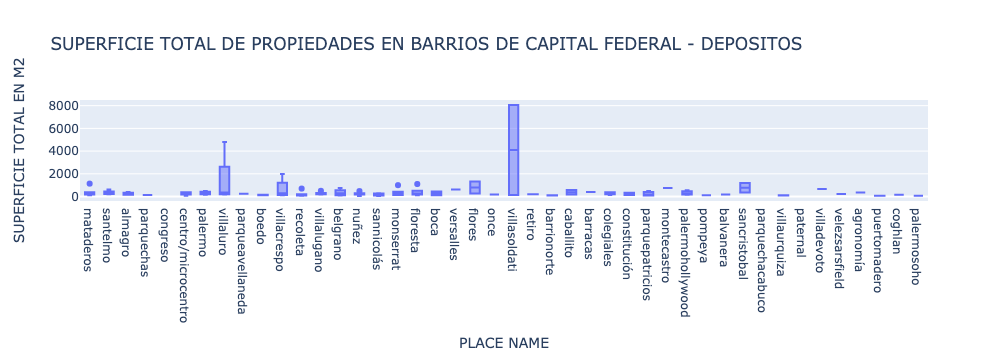

In [245]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]\
             ,y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DEPOSITOS')

fig.show()

In [246]:
df_deposito = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]


In [247]:
df_deposito_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]
df_deposito_caba.describe().iloc[:,10:]

floor  rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  4.000 37.000    17.000                    135.000   
mean   3.500  4.324  2616.000                    303.422   
std    1.732  1.226  1919.186                    458.328   
min    2.000  1.000   500.000                     49.000   
25%    2.000  3.000  1250.000                    120.000   
50%    3.500  5.000  2200.000                    189.000   
75%    5.000  5.000  3100.000                    362.500   
max    5.000  6.000  8500.000                   4800.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 121.000            104.000     132.000     131.000  
mean                  410.041           2033.100  463446.295  463736.586  
std                   859.316           2099.487  484301.589  486791.125  
min                    50.000             13.797  100000.000   14581.750  
25%                   140.000            866.802  195250.000  193500.000  
50%                   214.000           1387.435  290000.000  290000.000  
75%                   403.000           2246.652  586250.000  587500.000  
max                  8053.000          13698.630 4000000.000 4000000.000

In [248]:
deposito_index=df_deposito_caba.sort_values('PRECIO USD POR M2')[:5][['SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD']].index

df_deposito_caba.sort_values('PRECIO USD POR M2')[:5][['SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD']]

SUPERFICIE TOTAL EN M2  \
49910                8053.000   
21649                 365.000   
19549                 500.000   
19090                 208.000   
15239                 305.000   

                                                            title  \
49910                                 naveindustrial-villasoldati   
21649  importantelocalensubsueloconentradaindependienteenalquiler   
19549                                               echeandia6600   
19090                                     casalotepropioaestrenar   
15239              ventacasalotepropio5ambientesconlocalmataderos   

       PRECIO USD POR M2  PRECIO USD  
49910             13.797  111111.000  
21649             39.950   14581.750  
19549            500.000  250000.000  
19090            528.846  110000.000  
15239            554.098  169000.000

In [249]:
# Los primeros 2 indices, tienen valores muy bajos, segun simulaciones en ZonaProp

df = df.drop(deposito_index[:2])

In [250]:
deposito_index2=df_deposito_caba.sort_values('PRECIO USD', ascending = False)[:5]\
[['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','title','PLACE NAME','PRECIO USD',"TIPO DE PROPIEDAD"]].index

df_deposito_caba.sort_values('PRECIO USD', ascending = False)[:5]\
[['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','title','PLACE NAME','PRECIO USD',"TIPO DE PROPIEDAD"]]

SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
49273                4800.000                   4800.000   
70184                 750.000                    600.000   
28814                 146.000                    146.000   
55995                 699.000                    699.000   
45354                1200.000                   1200.000   

                                            title    PLACE NAME  PRECIO USD  \
49273      plantaindustrialde3500m2salidaa3calles     villaluro 4000000.000   
70184  malasiaygorostiaga,importantecasareciclada      belgrano 2250000.000   
28814                                localenventa       almagro 2000000.000   
55995                            impactanteestilo      recoleta 1800000.000   
45354                                 casaenventa  sancristobal 1500000.000   

      TIPO DE PROPIEDAD  
49273          deposito  
70184          deposito  
28814          deposito  
55995          deposito  
45354          deposito

In [251]:
# El primer index, se trata de una planta industrial

df = df.drop(deposito_index2[0])

In [252]:
deposito_index3=df_deposito_caba.sort_values('SUPERFICIE TOTAL EN M2', ascending = False)[:5].index

df_deposito_caba.sort_values('SUPERFICIE TOTAL EN M2', ascending = False)[:5]\
[['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','title','PLACE NAME','PRECIO USD',"TIPO DE PROPIEDAD"]]

SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
49910                8053.000                        NaN   
49273                4800.000                   4800.000   
14226                1991.000                   1240.000   
72181                1315.000                   1100.000   
45354                1200.000                   1200.000   

                                        title    PLACE NAME  PRECIO USD  \
49910             naveindustrial-villasoldati  villasoldati  111111.000   
49273  plantaindustrialde3500m2salidaa3calles     villaluro 4000000.000   
14226    casade5ambientesenventaenvillacrespo   villacrespo         NaN   
72181                         local-floressur        flores 1300000.000   
45354                             casaenventa  sancristobal 1500000.000   

      TIPO DE PROPIEDAD  
49910          deposito  
49273          deposito  
14226          deposito  
72181          deposito  
45354          deposito

In [253]:
# Los 2 primeros index, ya los dropeamos anteriormente, por tratarse de naves industriales, y el 3ero, lo dropeamos por sus dimensiones respecto a su zona
df = df.drop(deposito_index3[2])

## Store

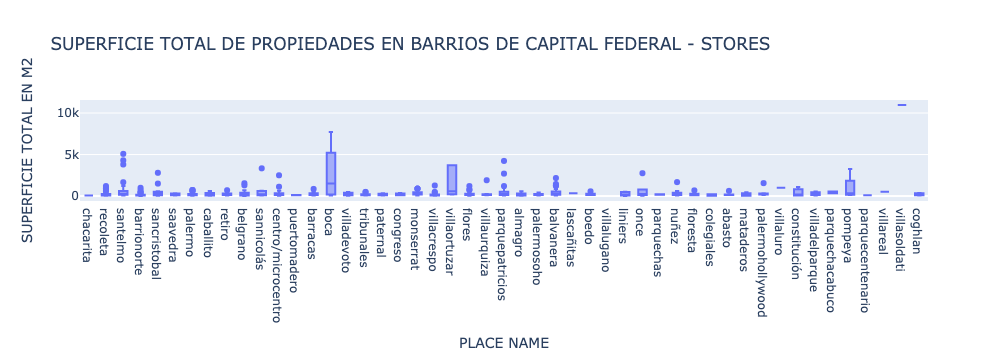

In [254]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')], y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - STORES')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q3(75) + 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [255]:
store_outliers = ['recoleta','santelmo', 'barrionorte','sancristobal','palermo','retiro','belgrano','sannicolás','centro/microcentro', 'barracas', 'tribunales',
                 'montserrat','villacrespo','flores','villaurquiza','parquepatricios','balvanera','boedo','once','nuñez','floresta','abasto','florida']

df_stores = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]

for outliers in store_outliers:
    q1 = df_stores[df_stores['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.25)
    q3 = df_stores[df_stores['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_store_sup_max = df_stores[np.logical_and(df_stores['PLACE NAME']==outliers, df_stores['SUPERFICIE TOTAL EN M2'] > q3 + 1.5 * RIC)].index
    
    df = df.drop(index_outlier_store_sup_max)


In [256]:
df_stores_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]
df_stores_caba.describe().iloc[:,10:]

floor  rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 21.000   104.000                    543.000   
mean   4.000  2.286  3357.125                    291.657   
std      NaN  2.901  3811.547                    712.515   
min    4.000  1.000     1.000                     48.000   
25%    4.000  1.000  1000.000                     90.000   
50%    4.000  1.000  2150.000                    147.000   
75%    4.000  1.000  4500.000                    270.000   
max    4.000 10.000 19000.000                  10958.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count                 574.000            501.000      576.000     573.000  
mean                  265.244           2725.527   638684.969  550223.390  
std                   635.056           2060.806  1293515.295  775802.603  
min                    12.000             96.696    19900.000    5608.360  
25%                    90.000           1454.139   213750.000  210000.000  
50%                   150.000           2217.391   355000.000  350000.000  
75%                   270.000           3428.571   600000.000  600000.000  
max                 10958.000          22000.000 19267560.000 8500000.000

In [257]:
store_index_expenses=df_stores_caba.sort_values('expenses')[:20].index

df_stores_caba.sort_values('expenses')[['expenses','SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD']][:20]

# Ya que suponemos el valor de 1 es algo simbolico, vamos a imputarles nan a los 12 primeros valores de expenses

df.loc[store_index_expenses[:12],'expenses']=np.NaN

In [258]:
df_stores_caba.sort_values('SUPERFICIE TOTAL EN M2')[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD']][:4]


SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
49765                        NaN                  12.000           2083.333   
48850                        NaN                  20.000           2000.000   
16809                        NaN                  20.000           5500.000   
49284                        NaN                  22.000           4500.000   

       PRECIO USD  
49765   25000.000  
48850   40000.000  
16809  110000.000  
49284   99000.000

In [259]:
# Podemos ver que hay varios NaN, en la superficie cubierta, y es por esto que tiene un valor inferior min a sup total, pero los valores de superficie total son muy bajos

# Suponemos un valor de Superficie total minimo de 30m2

store_index_sup_muy_chica = df_stores_caba[df_stores_caba['SUPERFICIE TOTAL EN M2'] < 30 ].index
df = df.drop(store_index_sup_muy_chica)


store_index_sup_mal_cargada = df_stores_caba[df_stores_caba['SUPERFICIE CUBIERTA EN M2'] > df_stores_caba['SUPERFICIE TOTAL EN M2']].index
df = df.drop(store_index_sup_mal_cargada)

In [260]:
store_index_sup_muy_grande = df_stores_caba.sort_values('SUPERFICIE TOTAL EN M2', ascending = False)[:4].index

df_stores_caba.sort_values('SUPERFICIE TOTAL EN M2', ascending = False)[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:4]



SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
52082                  10958.000               10958.000            775.689   
49862                   7722.000                7722.000           1036.001   
50609                   3700.000                3700.000           1486.486   
50411                   3700.000                3700.000           1756.757   

       PRECIO USD                                                  title  
52082 8500000.000  excelentenaveindustrialde10960m2sobreterrenode18151m2  
49862 8000000.000               ventaconrentaespectaculardepósitopremium  
50609 5500000.000                importantepropiedad3700m2aptav/destinos  
50411 6500000.000              excelentepropiedadde3700m2amtstriunvirato

In [261]:
# Podemos observar que los 2 primeros index, refieren a una nave industrial de enormes dimensiones y un deposito, tambien de varias hectareas, vamos a dropear estos valores.

df = df.drop(store_index_sup_muy_grande[:2])

In [262]:

df_stores_caba.sort_values('PRECIO USD',ascending = False)[:3][['SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD','PLACE NAME']]

SUPERFICIE TOTAL EN M2  \
52082               10958.000   
49862                7722.000   
50411                3700.000   

                                                       title  \
52082  excelentenaveindustrialde10960m2sobreterrenode18151m2   
49862               ventaconrentaespectaculardepósitopremium   
50411              excelentepropiedadde3700m2amtstriunvirato   

       PRECIO USD POR M2  PRECIO USD    PLACE NAME  
52082            775.689 8500000.000  villasoldati  
49862           1036.001 8000000.000          boca  
50411           1756.757 6500000.000  villaortuzar

Son logicos los precios

### Duplex/Triplex 

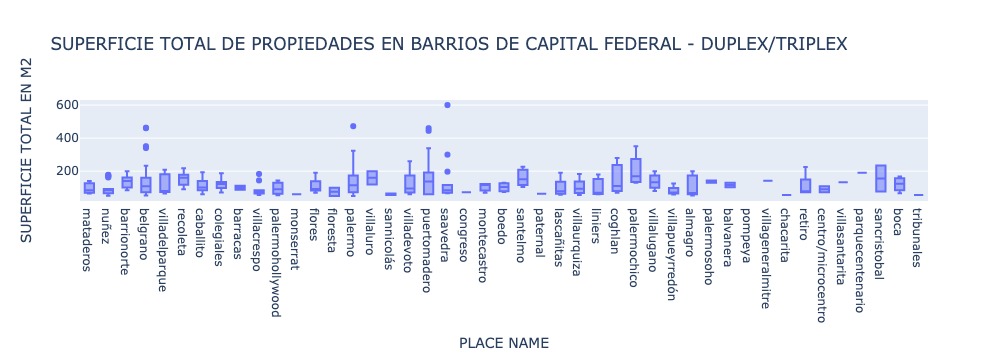

In [263]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')], y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DUPLEX/TRIPLEX')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q3(75) + 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [264]:
duplex_outliers = ['nuñez','belgrano','villacrespo','palermo','puertomadero','saavedra']

df_duplex= df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]

for outliers in duplex_outliers:
    q1 = df_duplex[df_duplex['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.25)
    q3 = df_duplex[df_duplex['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_duplex_sup_max = df_duplex[np.logical_and(df_duplex['PLACE NAME']==outliers, df_duplex['SUPERFICIE TOTAL EN M2'] > q3 + 1.5 * RIC)].index
    
    df = df.drop(index_outlier_duplex_sup_max)


In [265]:
df_duplex=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]
df_duplex.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 42.000 242.000    72.000                    371.000   
mean   5.571   3.302  4027.778                    102.124   
std    4.379   1.165  3022.179                     48.092   
min    1.000   1.000    10.000                     48.000   
25%    2.000   2.000  1897.500                     64.500   
50%    4.500   3.000  3000.000                     86.000   
75%    8.750   4.000  6000.000                    129.000   
max   15.000   8.000 17000.000                    290.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 292.000            279.000     384.000     384.000  
mean                  114.620           2651.812  351428.508  305366.126  
std                    52.786           1035.907  608625.212  237287.240  
min                    50.000            250.000   23000.000   23000.000  
25%                    72.000           1975.397  175000.000  175000.000  
50%                    99.000           2452.055  240000.000  240000.000  
75%                   146.250           2991.446  360500.000  350000.000  
max                   350.000           6944.444 9435376.000 2300000.000

In [266]:
duplex_index_expenses = df_duplex.sort_values('expenses')[:4].index
df_duplex.sort_values('expenses')[['expenses','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:4]



expenses  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
24693    10.000                     80.000                 130.000   
54246   300.000                    150.000                 150.000   
55922   400.000                     56.000                     NaN   
79745   600.000                     99.000                 115.000   

       PRECIO USD POR M2  PRECIO USD  \
24693                NaN         NaN   
54246           1653.333  248000.000   
55922                NaN  185000.000   
79745           3295.652  379000.000   

                                                                                   title  
24693                                                               ventaduplexaestrenar  
54246              departamentoventa3ambientesbarrionorteduplexalavtaexcelenteestado!!!!  
55922                                                     departamentoenduplexconterraza  
79745  3ambientesenduplexconterrazapropiaamobladoexcelenteubicaciónprimerpisoporescalera

In [267]:
# Vamos a dropear el primer indice, que no nos dice , y 10 es un valor muy bajo

df = df.drop(duplex_index_expenses[:1])

In [268]:
df_duplex.sort_values('PRECIO USD', ascending = False)\
        [['expenses','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:5]


expenses  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
31708       NaN                    290.000                 350.000   
5053        NaN                    252.000                 252.000   
9811        NaN                    265.000                     NaN   
33856       NaN                    239.000                 339.000   
60642 17000.000                    128.000                 190.000   

       PRECIO USD POR M2  PRECIO USD  \
31708           6571.429 2300000.000   
5053            6944.444 1750000.000   
9811                 NaN 1600000.000   
33856           4100.295 1390000.000   
60642           6578.947 1250000.000   

                                                               title  
31708      venta-impresionanteduplexconterrazayparrilla-barrioparque  
5053                     excelentetriplexmuyaltoconvistaaríoyalnorte  
9811                     triplexamobladodelujoenmolinosfaenabuilding  
33856  espectacularresidenciaenduplexconlasmejoresvistasdelyachtclub  
60642                            duplexenventa3ambientespuertomadero

Segun simulaciones en zonaprop son valores logicos los de PRECIO USD y PRECIO USD POR M2

## Piso/Penthouse

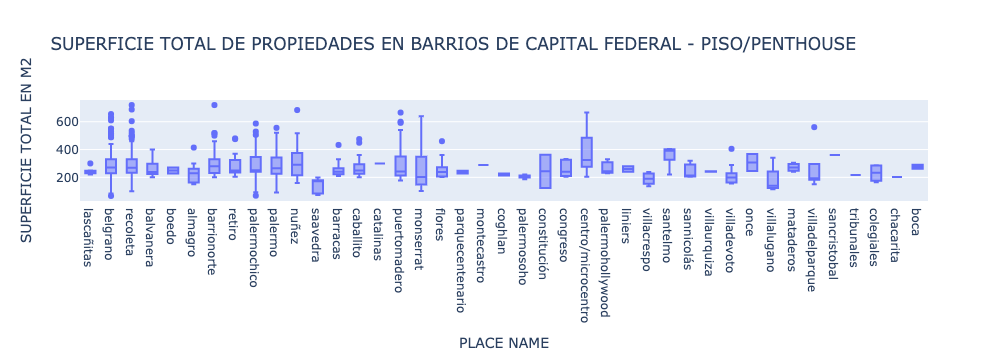

In [269]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')],\
             y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PISO/PENTHOUSE')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [270]:
piso_outliers = ['lascañitas','belgrano','recoleta','almagro','barrionorte','retiro','palermochico','palermo','nuñez','barracas','caballito','puertomadero','flores',
                  'centro/microcentro','villadevoto','villadelparque']

df_piso = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]

for outliers in store_outliers:
    q1 = df_piso[df_piso['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.25)
    q3 = df_piso[df_piso['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_piso_sup_max = df_piso[np.logical_and(df_piso['PLACE NAME']==outliers, df_piso['SUPERFICIE TOTAL EN M2'] > q3 + 1.5 * RIC)].index
    index_outlier_piso_sup_min = df_piso[np.logical_and(df_piso['PLACE NAME']==outliers, df_piso['SUPERFICIE TOTAL EN M2'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_piso_sup_max)
    df = df.drop(index_outlier_piso_sup_min)



In [271]:
df_piso_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]
df_piso_caba.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 68.000 528.000   297.000                    813.000   
mean   4.559   5.263 12391.684                    482.488   
std    3.491   1.723  8218.452                   6551.641   
min    1.000   1.000     1.000                     48.000   
25%    1.000   4.000  7000.000                    200.000   
50%    4.000   5.000 11922.000                    235.000   
75%    7.000   6.000 16000.000                    294.000   
max   14.000  17.000 70000.000                 187000.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 753.000            681.000     778.000     778.000  
mean                  273.936           3532.049  973890.815  972024.668  
std                    82.077           2311.043  830455.830  830809.209  
min                    68.000            268.470   70000.000   70000.000  
25%                   220.000           2186.589  495000.000  495000.000  
50%                   250.000           2962.963  750000.000  749500.000  
75%                   314.000           4320.988 1200000.000 1200000.000  
max                   666.000          20731.707 8500000.000 8500000.000

In [272]:
piso_index_ambientes = df_piso_caba.sort_values('rooms', ascending = False)[:10].index
df_piso_caba.sort_values('rooms', ascending = False)[['rooms','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]



rooms  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
38094 17.000                    359.000                     NaN   
13994 14.000                    320.000                 400.000   
26809 12.000                    417.000                 417.000   
40786 12.000                    329.000                 329.000   
40302 12.000                    554.000                     NaN   
33332 12.000                    320.000                 320.000   
9966  12.000                    363.000                 366.000   
25754 11.000                    623.000                     NaN   
28269 11.000                    300.000                 400.000   
30092 11.000                    273.000                 273.000   

       PRECIO USD POR M2  PRECIO USD  \
38094                NaN 1700000.000   
13994            837.500  335000.000   
26809           2997.602 1250000.000   
40786           2844.985  936000.000   
40302                NaN 1380000.000   
33332           2171.875  695000.000   
9966            3278.689 1200000.000   
25754                NaN  420000.000   
28269            925.000  370000.000   
30092            915.751  250000.000   

                                                                      title  \
38094                                      pisodecategoríaenventaenrecoleta   
13994                                     14habitaciones,5bañostodoen320mts   
26809                              arenales2100increíbleduplexestilofránces   
40786  arenalesal1800-edificiofrancesrecicladoensutotalidadconbajasexpensas   
40302                                       duplexdegrancategoríaconterraza   
33332                   mtdealvear-libertad320m2enimpactanteedificiofrances   
9966     arroyoyesmeralda:oficina/viviendafrancesunico!!!frentehotelsofitel   
25754                                   hotel/pensionenbalvaneraaptocredito   
28269                           pisode300m2cubiertoscon100m2deterrazapropia   
30092                                        ventahosteloviviendaensantelmo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
38094                                                                                                                                                                                                                                                                                             

In [273]:
# El primer index, no podemos comprobar si realmente tiene 17 ambientes, asi que vamos a dropearlo, ya que no nos dice mucho

df = df.drop(piso_index_ambientes[:1])

df.loc[piso_index_ambientes[6],'TIPO DE PROPIEDAD']='duplex/triplex'

# Se trata de un hotel y no un piso
df = df.drop(piso_index_ambientes[9])


In [274]:
piso_index_expensas = df_piso_caba.sort_values('expenses')[:10].index
df_piso_caba.sort_values('expenses')[['expenses','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]


expenses  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
55810     1.000                    230.000                 280.000   
59031     1.000                    380.000                 400.000   
59466     1.000                    290.000                 380.000   
63570     1.000                    214.000                 214.000   
62067     1.000                    214.000                 214.000   
48952     1.000                    364.000                 364.000   
62077     1.000                    214.000                 214.000   
29496     5.000                        NaN                 209.000   
80361   850.000                    165.000                 165.000   
79724  1000.000                    134.000                 150.000   

       PRECIO USD POR M2  PRECIO USD  \
55810           1000.000  280000.000   
59031           1000.000  400000.000   
59466                NaN         NaN   
63570           7476.636 1600000.000   
62067           6542.056 1400000.000   
48952           9615.385 3500000.000   
62077           7009.346 1500000.000   
29496           1866.029  390000.000   
80361           1878.788  310000.000   
79724           1986.667  298000.000   

                                                 title  \
55810                         piso5ambientes-mataderos   
59031                           oficinaenventasantelmo   
59466   unicodepartamentoconterrazaenchateaulibertador   
63570                renoiriisolpisoaltocondoscocheras   
62067               renoirii-pisoaltosolcondoscocheras   
48952                torremirabilia-5ambientes-palermo   
62077               renoiriisolcondoscocherasaestrenar   
29496                              departamentoenventa   
80361                              departamentoenventa   
79724  impecablepisode150m2conbajasexpensasaptocrédito   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
55810                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           ventapiso5ambientesavemiliocastroliniersbarrionaonsob

In [275]:
# Los 8 primeros valores de expensas estan mal imputados, vamos a cargarles NaN values.

df.loc[piso_index_expensas[:8],'expenses']=np.NaN

In [276]:
piso_index_sup_cubierta = df_piso_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending = False)[:10].index
df_piso_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending = False)[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]


SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
56640                 187000.000                     NaN                NaN   
33654                   3330.000                     NaN                NaN   
47598                   2949.000                     NaN                NaN   
35098                    655.000                     NaN                NaN   
48788                    639.000                 639.000            624.413   
25754                    623.000                     NaN                NaN   
43686                    611.000                 666.000                NaN   
11434                    600.000                 600.000           7500.000   
34969                    600.000                     NaN                NaN   
4369                     587.000                 587.000           5110.733   

       PRECIO USD                                                title  \
56640  600000.000                           excelentepisoenbarrionorte   
33654   70000.000            ventadepartamento2ambaptocredito-almagro-   
47598   76900.000            monoambienteconcocinaamericanaenbelgranor   
35098 2499000.000           vendepisobarrancasbelgrano8ambpiletapropia   
48788  399000.000                                           moreno1500   
25754  420000.000                  hotel/pensionenbalvaneraaptocredito   
43686         NaN                                       eylepetrona300   
11434 4500000.000  torrerenoirii-pisode600m²vistaalrio7ambcon4cocheras   
34969         NaN                        departamentoenventaenrecoleta   
4369  3000000.000                 importantepenthouseeninmejorablezona   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
56640                                                                                                                                                                                 

In [277]:
df.loc[piso_index_sup_cubierta[:1],['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2']]=187

df = df.drop(piso_index_sup_cubierta[1])


In [278]:
df_piso_caba.sort_values('PRECIO USD POR M2', ascending = False)\
[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]


SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
33329                    410.000                 410.000          20731.707   
19196                    200.000                 220.000          20000.000   
33328                    410.000                 410.000          19512.195   
33326                    300.000                 320.000          17187.500   
10176                    200.000                 211.000          12796.209   
41537                    250.000                 250.000          12000.000   
40008                    400.000                 400.000          11000.000   
36734                    377.000                 377.000          10875.332   
39444                    456.000                 516.000          10658.915   
42993                    456.000                 516.000          10658.915   

       PRECIO USD  \
33329 8500000.000   
19196 4400000.000   
33328 8000000.000   
33326 5500000.000   
10176 2700000.000   
41537 3000000.000   
40008 4400000.000   
36734 4100000.000   
39444 5500000.000   
42993 5500000.000   

                                                                                  title  \
33329                                      leparcalcorta-pisomuyaltode410m2con2cocheras   
19196                                             excelentepiso220m2c/dep2cocherasfijas   
33328                                      leparcalcorta-pisomuyaltode410m2con2cocheras   
33326                                             leparcalcorta-pisode320m2con2cocheras   
10176                                             leparcalcorta-pisode211m²con2cocheras   
41537  venta:semipisodegrancategoríaeimportantesterminacionesentorredemáximacategoría!!   
40008                     leparcdemaria4500-pisoaltisimorecicladovistaalriocon3cocheras   
36734                     leparcdemaria4500-pisoaltisimorecicladovistaalriocon3cocheras   
39444                                              espectacularpenthouseenforumalcorta!   
42993                                                               forumalcortatriplex   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
33329                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Los precios son logicos, al simularlos en Zona Prop.

## Price

#### APARTAMENTOS - USD

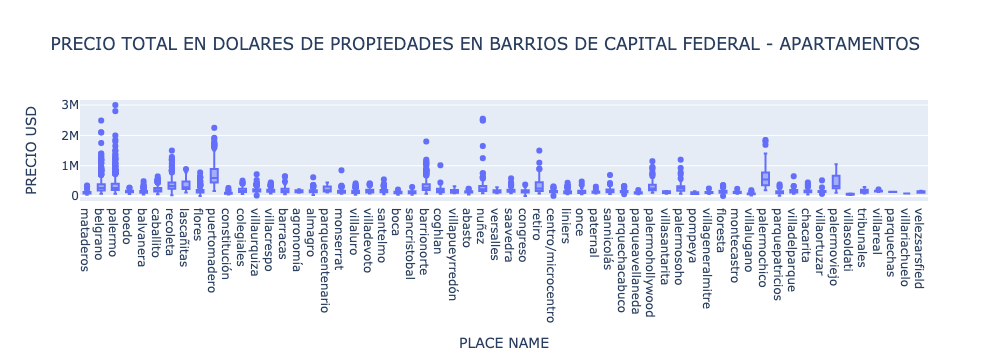

In [279]:
df_departamento_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')]

fig = px.box(df_departamento_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - APARTAMENTOS')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [280]:
precio_outliers_departamentos = ['mataderos','belgrano','palermo','boedo','balvanera','caballito','recoleta','flores','puertomadero','constitución','colegiales','villaurquiza',
                 'villacrespo','barracas','almagro','monserrat','villaluro','villadevoto','santelmo','boca','sancristobal','barrionorte','coghlan','abasto',
                 'nuñez','versalles','saavedra','congreso','retiro','centro/microcentro','liniers','once','paternal','sannicolás','parquechacabuco','parqueavellaneda',
                 'palermohollywood','palermosoho','villageneralmitre','floresta','montecastro','villalugano','palermochico','parquepatricios','villadelparque',
                 'chacarita','villaortuzar','villareal']


for outliers in precio_outliers_departamentos:
    q1 = df_departamento_capitalfederal[df_departamento_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_departamento_capitalfederal[df_departamento_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_ap_max = df_departamento_capitalfederal[np.logical_and(df_departamento_capitalfederal['PLACE NAME']==outliers, df_departamento_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_ap_min = df_departamento_capitalfederal[np.logical_and(df_departamento_capitalfederal['PLACE NAME']==outliers, df_departamento_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_ap_max)
    df = df.drop(index_outlier_ap_min)
    


In [281]:
df_departamento_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')]
df_departamento_capitalfederal.describe().iloc[:,10:]

floor    rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 1235.000 5192.000  2835.000                   8113.000   
mean     5.169    3.253  3648.010                     84.804   
std      4.904    1.006  3112.436                     35.734   
min      1.000    1.000     1.000                     48.000   
25%      2.000    3.000  1800.000                     59.000   
50%      4.000    3.000  2900.000                     74.000   
75%      7.000    4.000  4534.500                    100.000   
max     55.000   12.000 54240.000                    419.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count                7161.000           6530.000     8454.000    8425.000  
mean                   91.641           2720.587   298477.943  242758.837  
std                    40.099           1082.074   552352.642  162383.520  
min                    27.000             69.382    24300.000    6730.040  
25%                    62.000           2023.810   140000.000  139900.000  
50%                    80.000           2500.000   195000.000  190000.000  
75%                   111.000           3110.878   297900.000  290000.000  
max                   419.000           9620.351 14756597.000 1500000.000

In [282]:
df_departamento_capitalfederal.sort_values('SUPERFICIE TOTAL EN M2')\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:5]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
67361                        NaN                  27.000           1600.000   
76550                        NaN                  27.000           2796.296   
54501                        NaN                  27.000           2740.741   
22617                        NaN                  27.000           2333.333   
54686                        NaN                  27.000           4407.407   

       PRECIO USD                                    title  
67361   43200.000                  departamento-scristobal  
76550   75500.000                   departamento-monserrat  
54501   74000.000              dto1ambfrentevtatodoluzysol  
22617   63000.000  monoambienteinterno27m2aptoprofesional,  
54686  119000.000                 departamento-barrionorte

In [283]:

df_departamento_capitalfederal.sort_values('PRECIO USD')\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:10]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
41732                     67.000                  97.000             69.382   
85315                     60.000                  60.000            126.188   
11214                     76.000                  82.000            122.426   
19084                     60.000                  60.000            405.000   
30451                        NaN                 154.000            187.498   
42789                     49.000                     NaN                NaN   
19340                        NaN                     NaN                NaN   
67361                        NaN                  27.000           1600.000   
27731                        NaN                     NaN                NaN   
21103                     70.000                  70.000            642.857   

       PRECIO USD  \
41732    6730.040   
85315    7571.290   
11214   10038.970   
19084   24300.000   
30451   28874.750   
42789   39000.000   
19340   40000.000   
67361   43200.000   
27731   45000.000   
21103   45000.000   

                                                                        title  
41732  3ambientesampliosenimpecableestadoconpatio1ºporescaleraenventaenflores  
85315                   departamentoenventaenbalvanera3ambientes60m2–jujuy300  
11214              excelentedptode4ambcoch/baulera/parquepatriciosaptocrédito  
19084                                        sevendedpto4ambbarriopiedrabuena  
30451                                                       departamentoventa  
42789                                             ventadpto3ambenvillasoldati  
19340                                   excelente2ambienteconmuybuenprecio!!!  
67361                                                 departamento-scristobal  
27731                                                departamentoenluganoiyii  
21103                                                       departamentoventa

In [284]:
# De simulacion en la pagina ZonaProps, tomamos un precio minimo de 42.000 usd para un departamento en caba.

index_mal_precio_usd_m2 = df_departamento_capitalfederal[df_departamento_capitalfederal['PRECIO USD'] < 42000].index


df = df.drop(index_mal_precio_usd_m2)

In [285]:
# Sobre el valor de las expensas, dropeamos los valores inferiores al quantil del 5%

q_expensas_caba=df_departamento_capitalfederal.expenses.quantile(0.05)

index_expensas_mal_cargadas=df_departamento_capitalfederal[df_departamento_capitalfederal.expenses < q_expensas_caba].index

df = df.drop(index_expensas_mal_cargadas)

#### Houses - usd

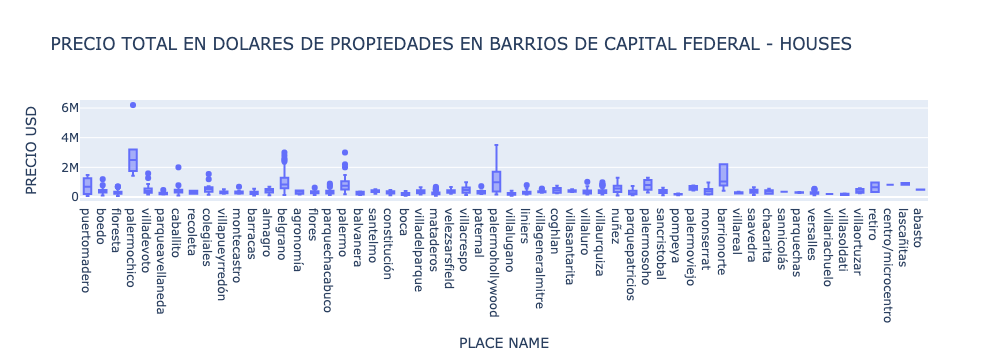

In [286]:
df_houses_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]
fig = px.box(df_houses_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - HOUSES')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [287]:
precio_outliers_casas_caba = ['boedo','floresta','villadevoto','parqueavellaneda','caballito','colegiales','montecastro','belgrano','flores','parquechacabuco',
                         'palermo','mataderos','paternal','liniers','villageneralmitre','villaluro','villaurquiza','parquepatricios','sancristobal']


for outliers in precio_outliers_casas_caba:
    q1 = df_houses_capitalfederal[df_houses_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_houses_capitalfederal[df_houses_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_h_max = df_houses_capitalfederal[np.logical_and(df_houses_capitalfederal['PLACE NAME']==outliers, df_houses_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_h_min = df_houses_capitalfederal[np.logical_and(df_houses_capitalfederal['PLACE NAME']==outliers, df_houses_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_h_max)
    df = df.drop(index_outlier_h_min)
    


In [288]:
df_houses_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]
df_houses_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 422.000     4.000                   1081.000   
mean   2.000   4.723  4525.250                    231.353   
std      NaN   1.663  4445.914                    126.931   
min    2.000   1.000     1.000                     48.000   
25%    2.000   4.000  1500.250                    141.000   
50%    2.000   5.000  4050.000                    200.000   
75%    2.000   5.000  7075.000                    290.000   
max    2.000  18.000 10000.000                   1000.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 886.000            763.000    1109.000    1107.000  
mean                  297.604           1575.634  442424.076  441838.573  
std                   167.285            808.891  407048.938  406550.743  
min                    48.000            288.889   70000.000   70000.000  
25%                   182.000           1064.752  240000.000  240000.000  
50%                   260.000           1416.765  348000.000  348000.000  
75%                   380.000           1923.928  490000.000  490000.000  
max                  1556.000           6072.106 6200000.000 6200000.000

nota : El valor minimo de pisos en casas es 2, debido a los NaN

In [289]:
index_precio_mal_ingresad=df_houses_capitalfederal.sort_values('PRECIO USD',ascending = False)[:4].index

df_houses_capitalfederal.sort_values('PRECIO USD',ascending = False)[:4]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description','PLACE NAME']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
43305                    970.000                     NaN                NaN   
50496                        NaN                1556.000           2249.357   
20420                    527.000                 527.000           6072.106   
53101                    530.000                 530.000           6037.736   

       PRECIO USD                         title  \
43305 6200000.000               juezestrada2800   
50496 3500000.000         casa-palermohollywood   
20420 3200000.000                      ombu2900   
53101 3200000.000  importantecasaenbarrioparque   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
43305  edificiodeestiloanglo-americanoconladrilloalavista,ymansardaenelúltimopiso,edificadoenesquinaconstadetrespisosposeedosescaleras,unaprincipalyotradeservicio,yademás,poseeascensorelaccesoesporlacallejuezestrada,antecedidoporjardín,protegidoporrejasbajasantesdeingresarasuinterior,seencuentraunporcheflanqueadopordosimportantescolumnaselhalldeentradaesdegrantamañoyallíconvergen,atravésdepuertascorredizas,elescritorioconchimeneayboiserieylagranrecepción,compuestaporunlivingconchimeneaygrandesventanalesacontinuación,sehallaunenormecomedorvaledestacarqueenelhalltambiénseencuentraunplacarddevisitasyuntoiletteeljardín,degranprivacidad,constadeunapiscinayalcostadoseencuentrantresarcadasespejadasquelograndargranprofundidadaesteespacioademásenlaplantabaja,seencuentraelsectordelacocina,laqueconsta,además,deoffice,lacocinayuncálidocomedordiarioconsalidaaljardín,yellavaderoacontinuación,encontramosungaragecubiertoparadosautosydoscocherasmás,descubiertasenelprimerpiso,sehallaunasaladeestar,conchimeneaybalcónsusparedesposeenbibliotecasquelascubrentotalmenteacontinuacióndeésta;hayundormitorio,ensuite,conplacardenelhalldedistribucióndeestap

In [290]:
# El primer index, tiene un valor un 50% mas elevado a las simulaciones en zonaprop, vamos a droppearlo.

df = df.drop(index_precio_mal_ingresad[0])


### PH - usd

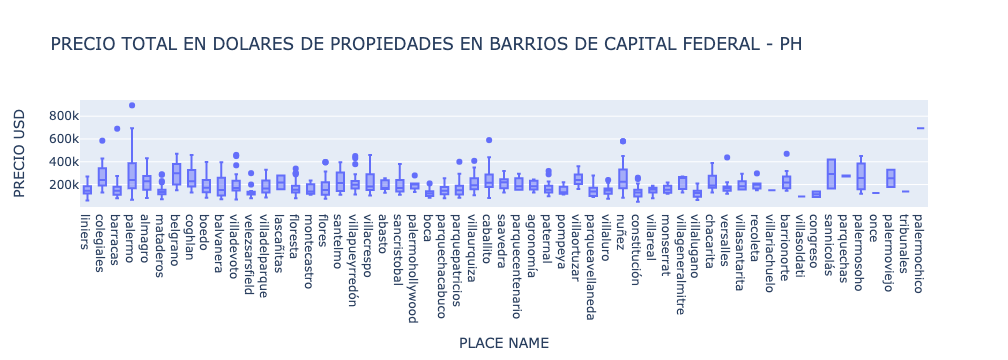

In [291]:
df_ph_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')]
fig = px.box(df_ph_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PH')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [292]:
precio_outliers_ph_caba = ['colegiales','barracas','palermo','mataderos','villadevoto','velezsarsfield','floresta','flores','villapueyrredón','palermohollywood',
                           'boca','parquechacabuco','parquepatricios','villaurquiza','caballito','paternal','villaluro','nuñez','constitución','versalles','barrionorte']


for outliers in precio_outliers_ph_caba:
    q1 = df_ph_capitalfederal[df_ph_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_ph_capitalfederal[df_ph_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_ph_max = df_ph_capitalfederal[np.logical_and(df_ph_capitalfederal['PLACE NAME']==outliers, df_ph_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_ph_min = df_ph_capitalfederal[np.logical_and(df_ph_capitalfederal['PLACE NAME']==outliers, df_ph_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_ph_max)
    df = df.drop(index_outlier_ph_min)
    


In [293]:
df_ph_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')]
df_ph_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 84.000 747.000   115.000                   1104.000   
mean   1.857   3.738   963.339                     98.296   
std    1.262   1.153   878.952                     44.405   
min    1.000   1.000     1.000                     48.000   
25%    1.000   3.000   400.000                     65.000   
50%    1.000   4.000   700.000                     86.000   
75%    2.000   4.000  1500.000                    120.000   
max    6.000  11.000  4600.000                    360.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 917.000            885.000    1178.000    1177.000  
mean                  130.206           1629.623  191693.124  190805.403  
std                    67.283            569.850   92394.048   87822.853  
min                    23.000            500.000   50000.000   50000.000  
25%                    79.000           1186.441  130000.000  130000.000  
50%                   111.000           1545.455  167500.000  167000.000  
75%                   162.000           2000.000  230000.000  230000.000  
max                   430.000           3630.435 1185000.000  695000.000

In [294]:
# Sobre el valor de las expensas, dropeamos los valores inferiores al quantil del 10%

q_expensas_caba=df_ph_capitalfederal.expenses.quantile(0.10)

index_expensas_mal_cargadas=df_ph_capitalfederal[df_ph_capitalfederal.expenses < q_expensas_caba].index

df = df.drop(index_expensas_mal_cargadas)

#### Stores - usd

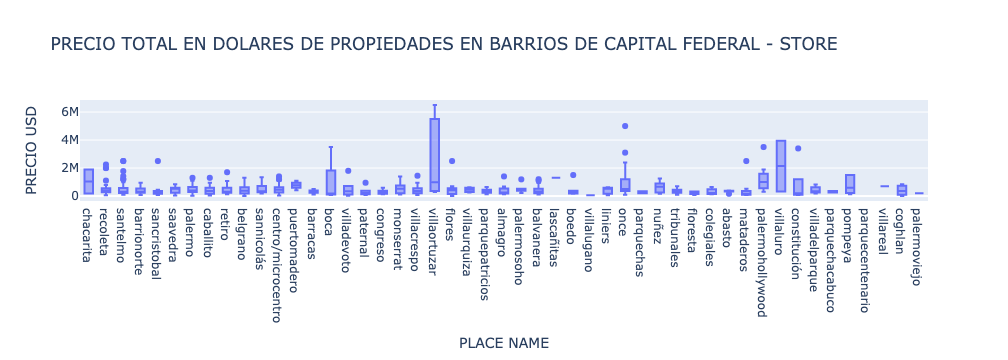

In [295]:
df_stores_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]

fig = px.box(df_stores_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - STORE')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [296]:
precio_outliers_store_caba = ['recoleta','santelmo','sancristobal','palermo','retiro','sannicolás','centro/microcentro','paternal','villacrespo','flores',
                              'almagro','palermosoho','balvanera','boedo','once','mataderos','constitución']


for outliers in precio_outliers_store_caba:
    q1 = df_stores_capitalfederal[df_stores_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_stores_capitalfederal[df_stores_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_store_max = df_stores_capitalfederal[np.logical_and(df_stores_capitalfederal['PLACE NAME']==outliers, df_stores_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_store_min = df_stores_capitalfederal[np.logical_and(df_stores_capitalfederal['PLACE NAME']==outliers, df_stores_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_store_max)
    df = df.drop(index_outlier_store_min)
    


In [297]:
df_stores_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]
df_stores_capitalfederal.describe().iloc[:,10:]

floor  rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 20.000    85.000                    512.000   
mean   4.000  2.350  3772.341                    227.801   
std      NaN  2.961  3618.985                    370.839   
min    4.000  1.000     1.000                     48.000   
25%    4.000  1.000  1200.000                     88.000   
50%    4.000  1.000  3000.000                    140.000   
75%    4.000  1.250  5000.000                    244.250   
max    4.000 10.000 19000.000                   3700.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count                 538.000            466.000      533.000     530.000  
mean                  222.392           2656.864   513966.383  451936.806  
std                   319.867           1992.905   888116.998  519808.998  
min                    30.000             96.696    19900.000    5608.360  
25%                    90.000           1441.709   210000.000  209250.000  
50%                   144.000           2187.083   340000.000  339000.000  
75%                   249.500           3246.926   550000.000  550000.000  
max                  3700.000          22000.000 12581296.000 6500000.000

In [298]:
df_stores_capitalfederal.sort_values('PRECIO USD')[:10]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
47971                     58.000                  58.000             96.696   
71824                     70.000                  70.000            128.191   
71811                     70.000                  70.000            128.191   
71449                        NaN                     NaN                NaN   
76111                    230.000                 270.000            105.556   
4789                     300.000                 300.000            116.667   
69244                        NaN                  30.000           1500.000   
49509                        NaN                     NaN                NaN   
13043                        NaN                     NaN                NaN   
13697                     60.000                  60.000            825.000   

       PRECIO USD                                  title  
47971    5608.360  excelentelocalenventaconrentaenflores  
71824    8973.380          ventafondodecomercioencoghlan  
71811    8973.380         ventafondodecomercioenbelgrano  
71449   19900.000            fondodecomercio-villadevoto  
76111   28500.000       ventafondodecomercioenlascañitas  
4789    35000.000                           localenventa  
69244   45000.000           localenzonacomercial1rajunta  
49509   45000.000               fondodecomercio-saavedra  
13043   48000.000      localc/fondodecomercioenlugano1y2  
13697   49500.000      econmicoslocalesengaleraenliniers

In [299]:
# Precio minimo de store, 45000 usd

index_precio_usd_mal=df_stores_capitalfederal[df_stores_capitalfederal['PRECIO USD'] < 45000].index 

df = df.drop(index_precio_usd_mal)

In [300]:
index_precio_usd=df_stores_capitalfederal.sort_values('PRECIO USD', ascending = False)[:20].index

df_stores_capitalfederal.sort_values('PRECIO USD', ascending = False)[:20]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','PLACE NAME','description']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
50411                   3700.000                3700.000           1756.757   
50609                   3700.000                3700.000           1486.486   
24709                        NaN                1000.000           3950.000   
61665                        NaN                2700.000           1296.296   
50487                        NaN                1556.000           2249.357   
50155                   1190.000                     NaN                NaN   
76392                        NaN                     NaN                NaN   
48297                    480.000                 480.000           3750.000   
50064                    750.000                 750.000           2133.333   
50295                   3250.000                3250.000            461.538   
50323                   3250.000                     NaN                NaN   
50331                   3250.000                     NaN                NaN   
75958                    289.000                 334.000           4491.018   
38792                    450.000                 450.000           3111.111   
45950                        NaN                 450.000           3111.111   
7040                     444.000                 599.000           2170.284   
45951                    894.000                 894.000           1454.139   
38794                    894.000                 894.000           1454.139   
49053                    700.000                 700.000           1857.143   
9716                     350.000                 350.000           3714.286   

       PRECIO USD  \
50411 6500000.000   
50609 5500000.000   
24709 3950000.000   
61665 3500000.000   
50487 3500000.000   
50155 1900000.000   
76392 1900000.000   
48297 1800000.000   
50064 1600000.000   
50295 1500000.000   
50323 1500000.000   
50331 1500000.000   
75958 1500000.000   
38792 1400000.000   
45950 1400000.000   
7040  1300000.000   
45951 1300000.000   
38794 1300000.000   
49053 1300000.000   
9716  1300000.000   

                                                                             title  \
50411                                    excelentepropiedadde3700m2amtstriunvirato   
50609                                      importantepropiedad3700m2aptav/destinos   
24709                                  localnuevoaestrenar,1000metros,esquinaventa   
61665                                                      edificiocomercialenboca   
50487                                                       local-palermohollywood   
50155                                         excelentedepósitode1200m2conoficinas   
76392                                               localenventaenpalermohollywood   
48297                   ventadelocalenesquinaenpreconstrucciónenlaentradadevdevoto   
50064                                             depósitode750m2amtsavtriunvirato   
50295                          edificio3250m2c/oficinas+depósitosenpolotecnológico   
50323                          edificio3250m2c/oficinas+depósitosenpolotecnológico   
50331                          edificio3250m2c/oficinas+depósitosenpolotecnológico   
75958                                                       local-palermohollywood   
38792                           exentidadbancaria-localcon20mdefrente(tieneboveda)   
45950                                                                 localenventa   
7040   ventadedoslocalesquesevendenjuntosde600mtstotalesenexcelentezonadecaballito   
45951                                                                 localenventa   
38794                                 esquinahipolitoyrigoyen--excelentesvidrieras   
49053                                             local700m2en3plantassobreavenida   
9716                                                          localenventaconrenta   

             PLACE NAME  \
50411      villaortuzar   
50609      villaortuzar   
24709         vil

In [301]:
# El 3er index, se trata de un valor muy elevado segun zonaprops.
# El 4er index, se trata de un local sin terminar de construir.
# El 8vo index, aun esta en construccion
# Los indices 11 y 12, son duplicados, y tienen un precio superior a su zona.
# El indice 7050, son 2 locales juntos.

df = df.drop(index_precio_usd[2])
df = df.drop(index_precio_usd[3])
df = df.drop(index_precio_usd[7])
df = df.drop(index_precio_usd[10])
df = df.drop(index_precio_usd[11])
df = df.drop(index_precio_usd[14])
df = df.drop(index_precio_usd[15])

In [302]:
index_sup_grande = df_stores_capitalfederal.sort_values('SUPERFICIE TOTAL EN M2', ascending = False)[:7].index

df_stores_capitalfederal.sort_values('SUPERFICIE TOTAL EN M2', ascending = False)[:7]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','PLACE NAME','description']]
   

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
50411                   3700.000                3700.000           1756.757   
50609                   3700.000                3700.000           1486.486   
50295                   3250.000                3250.000            461.538   
61665                        NaN                2700.000           1296.296   
50487                        NaN                1556.000           2249.357   
24709                        NaN                1000.000           3950.000   
38794                    894.000                 894.000           1454.139   

       PRECIO USD                                                title  \
50411 6500000.000            excelentepropiedadde3700m2amtstriunvirato   
50609 5500000.000              importantepropiedad3700m2aptav/destinos   
50295 1500000.000  edificio3250m2c/oficinas+depósitosenpolotecnológico   
61665 3500000.000                              edificiocomercialenboca   
50487 3500000.000                               local-palermohollywood   
24709 3950000.000          localnuevoaestrenar,1000metros,esquinaventa   
38794 1300000.000         esquinahipolitoyrigoyen--excelentesvidrieras   

             PLACE NAME  \
50411      villaortuzar   
50609      villaortuzar   
50295           pompeya   
61665              boca   
50487  palermohollywood   
24709         villaluro   
38794         monserrat   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
50411                                                                                                                                                                                           capitalfederal,villaortúzarimportantepropiedadde3700m2cubiertostotalesen3plantasdeaproximadamente1200m2cadaunasobreterrenode17mx76m,salidaa2callesconlocalalfrentede10x10mconvidriera,preparadoparainstalarmontacargas,capacidadpara170a200autos,fosas,ampliasrampasdeaccesoaplantas,enmuybuenestadobaños,oficinaaptoconcesionariadeautos,garaje,depósito,supermercado,etcubicadoametrosdeavtriunviratoyavdelosincaszonificacióne3  
50609                                                                                                                                                                                capitalfederal,villaortúzar-código0414importantepropiedadde3700m2cubiertostotalesen3plantasdeaproximadamente1200m2cadaunasobreterrenode17mx76m,salidaa2callesconlocalalfrentede10x10mconvidriera,preparadoparainstalarmontacargas,capacidadpara170a200autos,fosas,ampliasrampasdeaccesoaplantas,enmuybuenestadobaños,oficinaaptoconcesionariadeautos,garaje,depósito,supermercado,etcubicadoametrosdeavtriunviratoyavdelosincaszonificacióne3  
50295  capitalfederal-pompeya-código0047iedificiodeoficinasydepósitode3250m2cubiertostotales,en2plantas,sobreterrenode1351m2(27,56mx49,02m)condepósitoenpbde1350m2delosaconcolumnasy6mdealtura,con2entradas,1decamióny1decamioneta,pisosdehormigónen1erpisoy2°1649m2deoficinasydepósitos,convariosdespachos,cocinacomedor,saladeempleados,bañosdeambossexos,aireacondicionado,posibilidaddemontacargasredcontraincendiodepósitosvariosenpalta,techodechapaidealparaempresasdelrubrotecnologíaubicadodentrodelpolotecnológicoconbeneficiosespecialescercadeavperitomorenoyavsáenzzonificación:r2biiifot:1,2opciónalquiler:consultar  
61665                                                                                                           

In [303]:
# Superficies muy grandes para la media de la zona

df = df.drop(index_sup_grande[:3])

### Depositos - usd

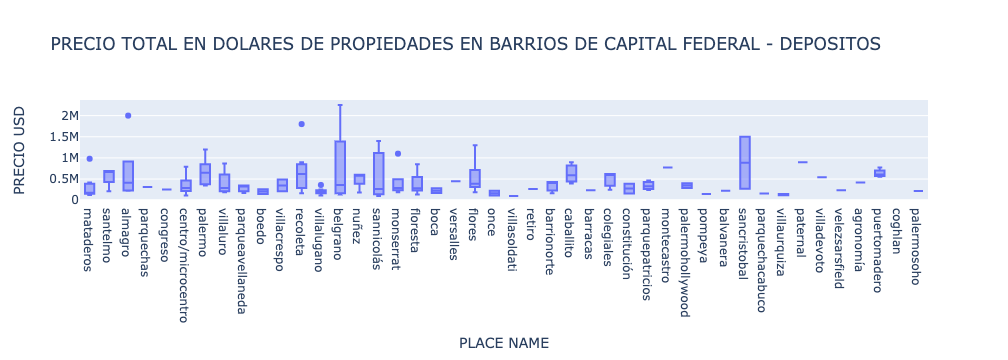

In [304]:
df_depositos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]
fig = px.box(df_depositos_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DEPOSITOS')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [305]:
precio_outliers_depositos_caba = ['mataderos','almagro','recoleta','villalugano','monserrat']


for outliers in precio_outliers_depositos_caba:
    q1 = df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_depo_max = df_depositos_capitalfederal[np.logical_and(df_depositos_capitalfederal['PLACE NAME']==outliers, df_depositos_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_depo_min = df_depositos_capitalfederal[np.logical_and(df_depositos_capitalfederal['PLACE NAME']==outliers, df_depositos_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_depo_max)
    df = df.drop(index_outlier_depo_min)
    


In [306]:
df_depositos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]
df_depositos_capitalfederal.describe().iloc[:,10:]

floor  rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  4.000 36.000    15.000                    127.000   
mean   3.500  4.278  2816.667                    250.528   
std    1.732  1.210  1960.290                    214.980   
min    2.000  1.000   500.000                     49.000   
25%    2.000  3.000  2000.000                    117.500   
50%    3.500  4.500  2300.000                    184.000   
75%    5.000  5.000  3550.000                    329.500   
max    5.000  6.000  8500.000                   1200.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 114.000             98.000     124.000     123.000  
mean                  284.439           1973.655  407772.581  409624.390  
std                   229.380           1777.365  323077.186  323737.126  
min                    50.000            500.000  100000.000  100000.000  
25%                   138.000            983.130  189250.000  193500.000  
50%                   208.500           1408.003  290000.000  290000.000  
75%                   378.750           2196.429  542500.000  545000.000  
max                  1315.000           9750.000 2250000.000 2250000.000

In [307]:
index_depositos_m2 = df_depositos_capitalfederal.sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3].index

df_depositos_capitalfederal.sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]

operation property_type    place_name  \
72181      sell         store        flores   
45354      sell         house  sancristobal   
53818      sell         store      floresta   

                       place_with_parent_names country_name      state_name  \
72181        |argentina|capitalfederal|flores|    argentina  capitalfederal   
45354  |argentina|capitalfederal|sancristobal|    argentina  capitalfederal   
53818      |argentina|capitalfederal|floresta|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon       price  \
72181  3433918.000  -346404343272,-584472117129 -34.640 -58.447 1300000.000   
45354  3429153.000        -346262123,-583970854 -34.626 -58.397 1500000.000   
53818  3433910.000                          NaN     NaN     NaN  850000.000   

      currency  price_aprox_local_currency  price_aprox_usd  \
72181      usd                22937850.000      1300000.000   
45354      usd                26466750.000      1500000.000   
53818      usd                14997825.000       850000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
72181             1315.000               1100.000           988.593   
45354             1200.000               1200.000          1250.000   
53818             1100.000               1100.000           772.727   

       price_per_m2  floor  rooms  expenses  \
72181      1181.818    NaN    NaN       NaN   
45354      1250.000    NaN    NaN       NaN   
53818       772.727    NaN    NaN       NaN   

                                                                                                                                                        properati_url  \
72181                  http://wwwproperaticomar/1bmx8_venta_local_flores_carabobo-av-_1400_luminoso_garage_aire-acondicionado_subte-linea-e_cassia-alfano-propiedades   
45354  http://wwwproperaticomar/19yrf_venta_casa_san-cristobal_pichincha-al-1400_parrilla_patio_aire-acondicionado_subte-linea-e_subte-linea-h_lepore-propiedades_dpr   
53818                                                                                   http://wwwproperaticomar/1all2_venta_local_floresta_patio_grupo-mega-cano_geo   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  \
72181                                                                                                                                                

In [308]:
index_precios = df_depositos_capitalfederal.sort_values('PRECIO USD',ascending = False)[:5].index 

df_depositos_capitalfederal.sort_values('PRECIO USD',ascending = False)[:5]

operation property_type    place_name  \
70184      sell         house      belgrano   
45354      sell         house  sancristobal   
33818      sell         store    sannicolás   
72181      sell         store        flores   
52525      sell         store       palermo   

                       place_with_parent_names country_name      state_name  \
70184      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
45354  |argentina|capitalfederal|sancristobal|    argentina  capitalfederal   
33818    |argentina|capitalfederal|sannicolás|    argentina  capitalfederal   
72181        |argentina|capitalfederal|flores|    argentina  capitalfederal   
52525       |argentina|capitalfederal|palermo|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon       price  \
70184  3436077.000                          NaN     NaN     NaN 2250000.000   
45354  3429153.000        -346262123,-583970854 -34.626 -58.397 1500000.000   
33818  6693229.000        -346065703,-583806794 -34.607 -58.381 1400000.000   
72181  3433918.000  -346404343272,-584472117129 -34.640 -58.447 1300000.000   
52525  3430234.000  -345873075435,-584109480193 -34.587 -58.411 1200000.000   

      currency  price_aprox_local_currency  price_aprox_usd  \
70184      usd                39700125.000      2250000.000   
45354      usd                26466750.000      1500000.000   
33818      usd                24702300.000      1400000.000   
72181      usd                22937850.000      1300000.000   
52525      usd                21173400.000      1200000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
70184              750.000                600.000          3000.000   
45354             1200.000               1200.000          1250.000   
33818              287.000                273.000          4878.049   
72181             1315.000               1100.000           988.593   
52525                  NaN                280.000               NaN   

       price_per_m2  floor  rooms  expenses  \
70184      3750.000    NaN    NaN       NaN   
45354      1250.000    NaN    NaN       NaN   
33818      5128.205    NaN    NaN       NaN   
72181      1181.818    NaN    NaN       NaN   
52525      4285.714    NaN    NaN  8500.000   

                                                                                                                                                                                          properati_url  \
70184  http://wwwproperaticomar/1bizr_venta_casa_belgrano_suite_jardin_lavadero_parrilla_piscina_quincho_terraza_toilette_vestidor_luminoso_vista_dependencias_garage_federico-galceran-propiedades_glf   
45354                                    http://wwwproperaticomar/19yrf_venta_casa_san-cristobal_pichincha-al-1400_parrilla_patio_aire-acondicionado_subte-linea-e_subte-linea-h_lepore-propiedades_dpr   
33818                         http://wwwproperaticomar/193u1_venta_local_san-nicolas_garage_aire-acondicionado_subte-linea-d_subte-linea-b_subte-linea-a_subte-linea-e_subte-linea-c_adrian-mercado-s-a   
72181                                                    http://wwwproperaticomar/1bmx8_venta_local_flores_carabobo-av-_1400_luminoso_garage_aire-acondicionado_subte-linea-e_cassia-alfano-propiedades   
52525                                                                                        http://wwwproperaticomar/1air7_venta_local_palermo_arenales_3400_patio_garage_subte-linea-d_wy-propiedades   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [309]:
# Segun zonaprop tiene un precio elevado para su zona.

df = df.drop(index_precios[3])

#### Duplex/Triplex - usd

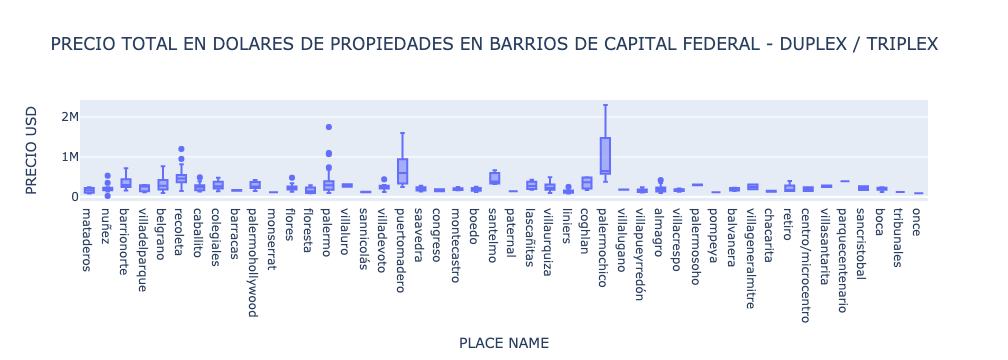

In [310]:
df_duplex_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]
fig = px.box(df_duplex_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DUPLEX / TRIPLEX')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [311]:
precio_outliers_duplex_caba = ['nuñez','recoleta','caballito','flores','palermo','villadevoto','liniers','almagro']


for outliers in precio_outliers_duplex_caba:
    q1 = df_duplex_capitalfederal[df_duplex_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_duplex_capitalfederal[df_duplex_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_duplex_max = df_duplex_capitalfederal[np.logical_and(df_duplex_capitalfederal['PLACE NAME']==outliers, df_duplex_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_duplex_min = df_duplex_capitalfederal[np.logical_and(df_duplex_capitalfederal['PLACE NAME']==outliers, df_duplex_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_duplex_max)
    df = df.drop(index_outlier_duplex_min)
    


In [312]:
df_duplex_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]
df_duplex_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 42.000 237.000    68.000                    356.000   
mean   5.571   3.274  4046.912                     99.669   
std    4.379   1.159  3047.801                     45.626   
min    1.000   1.000   300.000                     48.000   
25%    2.000   2.000  1897.500                     63.750   
50%    4.500   3.000  3000.000                     85.000   
75%    8.750   4.000  6000.000                    129.000   
max   15.000   8.000 17000.000                    290.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 277.000            266.000     368.000     368.000  
mean                  111.791           2612.083  341438.986  293373.893  
std                    51.179            945.757  613272.133  217322.987  
min                    50.000            900.000   82000.000   82000.000  
25%                    71.000           1971.032  175000.000  175000.000  
50%                    98.000           2451.989  235000.000  235000.000  
75%                   144.000           2954.601  340000.000  335250.000  
max                   350.000           6611.111 9435376.000 2300000.000

#### Piso/Penthouses - usd

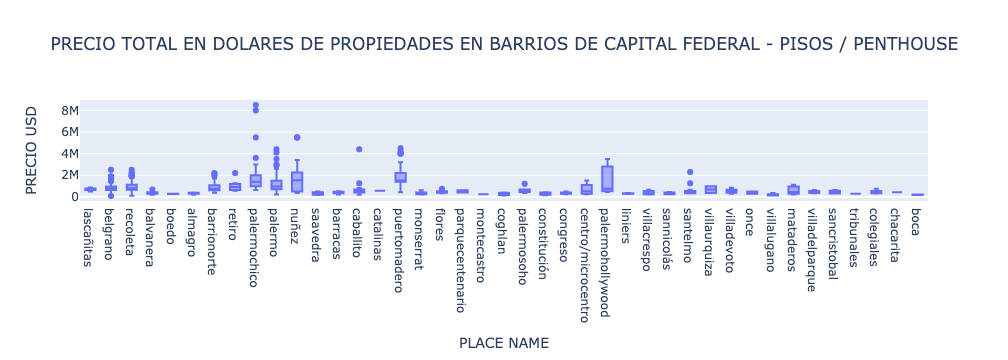

In [313]:
df_pisos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]
fig = px.box(df_pisos_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PISOS / PENTHOUSE')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [314]:
precio_outliers_pisos_caba = ['belgrano','recoleta','barrionorte','retiro','palermochico','palermo','nuñez','caballito','puertomadero','palermosoho','centro/microcentro',
                              'santelmo']


for outliers in precio_outliers_pisos_caba:
    q1 = df_pisos_capitalfederal[df_pisos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_pisos_capitalfederal[df_pisos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_pisos_max = df_pisos_capitalfederal[np.logical_and(df_pisos_capitalfederal['PLACE NAME']==outliers, df_pisos_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_pisos_min = df_pisos_capitalfederal[np.logical_and(df_pisos_capitalfederal['PLACE NAME']==outliers, df_pisos_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_pisos_max)
    df = df.drop(index_outlier_pisos_min)
    


In [315]:
df_pisos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]
df_pisos_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 66.000 484.000   277.000                    759.000   
mean   4.485   5.215 12317.935                    238.416   
std    3.447   1.606  7628.134                     79.729   
min    1.000   2.000   850.000                     48.000   
25%    1.000   4.000  7000.000                    193.000   
50%    4.000   5.000 11635.000                    229.000   
75%    6.750   6.000 16000.000                    282.500   
max   14.000  14.000 70000.000                    639.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 704.000            631.000     722.000     722.000  
mean                  266.926           3221.644  843616.557  841605.667  
std                    76.872           1738.610  522197.913  522301.025  
min                    68.000            268.470  110000.000   89937.580  
25%                   220.000           2127.552  489247.500  489000.000  
50%                   246.000           2852.349  710000.000  707500.000  
75%                   304.000           3882.745 1059250.000 1055250.000  
max                   666.000          12796.209 3500000.000 3500000.000

In [316]:
index_sup_cuv = df_pisos_capitalfederal.sort_values('SUPERFICIE CUBIERTA EN M2',ascending = False)[:5].index
df_pisos_capitalfederal.sort_values('SUPERFICIE CUBIERTA EN M2',ascending = False)[:5]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
48788                    639.000                 639.000            624.413   
25754                    623.000                     NaN                NaN   
43686                    611.000                 666.000                NaN   
34969                    600.000                     NaN                NaN   
4369                     587.000                 587.000           5110.733   

       PRECIO USD                                 title  
48788  399000.000                            moreno1500  
25754  420000.000   hotel/pensionenbalvaneraaptocredito  
43686         NaN                        eylepetrona300  
34969         NaN         departamentoenventaenrecoleta  
4369  3000000.000  importantepenthouseeninmejorablezona

In [317]:
# Dropeo el primer indice, ya que el valor de sup cuv esta mal ingresado.

df = df.drop(index_sup_cuv[0])

In [318]:
index_precio_usd = df_pisos_capitalfederal.sort_values('PRECIO USD',ascending = False)[:5].index
df_pisos_capitalfederal.sort_values('PRECIO USD',ascending = False)[:5]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','PLACE NAME']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
52955                    300.000                 330.000          10606.061   
52721                        NaN                 455.000           7472.527   
52313                        NaN                 455.000           7472.527   
44871                    369.000                 369.000           8672.087   
4369                     587.000                 587.000           5110.733   

       PRECIO USD                                               title  \
52955 3500000.000                       departamento-palermohollywood   
52721 3400000.000  espectacularpisoaltoentorrechteaulibertadorde450m2   
52313 3400000.000                    excelentepiso450m2entorrechateau   
44871 3200000.000                         venta5ambientesforumalcorta   
4369  3000000.000                importantepenthouseeninmejorablezona   

             PLACE NAME  
52955  palermohollywood  
52721             nuñez  
52313             nuñez  
44871             nuñez  
4369       palermochico

### Correlacion entre variables

**Vamos a seguir trabajando solo con capital federal y sus barrios**

##### CORRELACION EN APARTAMENTOS UBICADOS EN CAPITAL FEDERAL

In [319]:
corrientes = df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='corrientes')].index
df.loc[corrientes,'PLACE NAME']='sannicolás'

In [320]:
sanjose=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='sanjose')].index
df.loc[sanjose,'place_name']='sanjose'


In [321]:
once=df[np.logical_and(df['state_name']=='capitalfederal',df['PLACE NAME']=='once')].index
df.loc[once,'PLACE NAME']='balvanera'

In [322]:
suipacha=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='suipacha')].index
df.loc[suipacha,'PLACE NAME']='monserrat'

In [323]:
lima=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='lima')].index
df.loc[lima,'PLACE NAME']='santarita'

In [324]:
florida=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='florida')].index
df.loc[florida,'state_name']='bsasgbazonanorte'


In [325]:
sanjos=df[np.logical_and(df['place_name']=='sanjose',df['PLACE NAME']=='sanjose')].index
df.loc[sanjos[:2],'state_name']='bsasgbazonasur'

### Variables Cuantitativas y Categoricas

Creamos la variable ZONAS COMUNALES, donde vamos a categorizar los distintos barrios de capital por las comunas donde se encuentran

In [326]:
comunas_dict={
'constitucion':'ZONA ESTE COMUNAL',
'catalinas':'ZONA ESTE COMUNAL',
'libertad':'ZONA ESTE COMUNAL',
'retiro':'ZONA ESTE COMUNAL',
'sannicolás':'ZONA ESTE COMUNAL',
'puertomadero':'ZONA ESTE COMUNAL',
'santelmo':'ZONA ESTE COMUNAL',
'montserrat':'ZONA ESTE COMUNAL',
'monserrat':'ZONA ESTE COMUNAL',
'constitución':'ZONA ESTE COMUNAL',
'centro/microcentro':'ZONA ESTE COMUNAL',
'centro':'ZONA ESTE COMUNAL',
'tribunales':'ZONA ESTE COMUNAL',
'sannicolás':'ZONA ESTE COMUNAL',
'recoleta':'ZONA ESTE COMUNAL',
'barrionorte':'ZONA ESTE COMUNAL',
'billinghurst':'ZONA ESTE COMUNAL',
'balvanera':'ZONA ESTE COMUNAL',
'sancristobal':'ZONA ESTE COMUNAL',
'abasto':'ZONA ESTE COMUNAL',
'congreso':'ZONA ESTE COMUNAL',
'sarmiento':'ZONA ESTE COMUNAL',
'once':'ZONA ESTE COMUNAL',
'corrientes':'ZONA ESTE COMUNAL',
'boca':"ZONA SUR COMUNAL",
'barracas':"ZONA SUR COMUNAL",
'parquepatricios':"ZONA SUR COMUNAL",
'pompeya':"ZONA SUR COMUNAL",
'catalinas':"ZONA SUR COMUNAL",
'almagro':"ZONA CENTRO COMUNAL",
'boedo':"ZONA CENTRO COMUNAL",
'donbosco':"ZONA CENTRO COMUNAL",
'caballito':"ZONA CENTRO COMUNAL",
'parquecentenario':"ZONA CENTRO COMUNAL",
'flores':"ZONA CENTRO COMUNAL",
'parquechacabuco':"ZONA CENTRO COMUNAL",
'rivadavia':"ZONA CENTRO COMUNAL",
'villasoldati':"ZONA SUR COMUNAL",
'villariachuelo':"ZONA SUR COMUNAL",
'villalugano':"ZONA SUR COMUNAL",
'liniers':"ZONA OESTE COMUNAL",
'mataderos':"ZONA OESTE COMUNAL",
'parqueavellaneda':"ZONA OESTE COMUNAL",
'villareal':"ZONA OESTE COMUNAL",
'montecastro':"ZONA OESTE COMUNAL", 
'versalles':"ZONA OESTE COMUNAL", 
'floresta':"ZONA OESTE COMUNAL", 
'velezsarsfield':"ZONA OESTE COMUNAL",
'villaluro':"ZONA OESTE COMUNAL",
'villageneralmitre':"ZONA OESTE COMUNAL", 
'villadevoto':"ZONA OESTE COMUNAL", 
'villadelparque':"ZONA OESTE COMUNAL",
'villasantarita':"ZONA OESTE COMUNAL",
'santarita':"ZONA OESTE COMUNAL",
'coghlan':"ZONA NORTE COMUNAL",
'saavedra':"ZONA NORTE COMUNAL",
'villaurquiza':"ZONA NORTE COMUNAL",
'villapueyrredón':"ZONA NORTE COMUNAL",
'nuñez':"ZONA NORTE COMUNAL",
'belgrano':"ZONA NORTE COMUNAL",
'colegiales':"ZONA NORTE COMUNAL",
'palermo':"ZONA NORTE COMUNAL",
'lasheras':"ZONA NORTE COMUNAL",
'palermochico':"ZONA NORTE COMUNAL",
'palermohollywood':"ZONA NORTE COMUNAL",
'palermoviejo':"ZONA NORTE COMUNAL",
'palermosoho':"ZONA NORTE COMUNAL",
'lascañitas':"ZONA NORTE COMUNAL",
'chacarita':"ZONA NORTE COMUNAL",
'villacrespo':"ZONA NORTE COMUNAL",
'paternal':"ZONA NORTE COMUNAL",
'villaortuzar':"ZONA NORTE COMUNAL",
'agronomía':"ZONA NORTE COMUNAL",
'parquechas':"ZONA NORTE COMUNAL",
}


# comunas 12 13 14 15 grupo norte
# comunas 9, 10 y 11 grupo oeste
# comunas 8 y 4 grupo sur
# comunas 1, 2 y 3 grupo este
# comunas 5,6 y 7 grupo centro


df_capitalfederal = df.loc[df.state_name=='capitalfederal']
zonas_comunas_serie = df_capitalfederal['PLACE NAME'].replace(comunas_dict)
df['ZONAS COMUNALES']=zonas_comunas_serie

In [327]:
def correlation_plotter(data_to_plot,cols_to_plot):
    g = sns.PairGrid(data_to_plot, vars=cols_to_plot, hue='ZONAS COMUNALES' ,palette='bright')
    g.map(plt.scatter, alpha=0.6)
    g.add_legend();
    plt.show()

In [328]:
df_corr_capitalfederal_apartment = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','floor','rooms','expenses','PLACE NAME','ZONAS COMUNALES']]
df_corr_capitalfederal_apartment.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.708   
PRECIO USD                             0.708       1.000   
SUPERFICIE TOTAL EN M2                 0.089       0.698   
SUPERFICIE CUBIERTA EN M2              0.172       0.697   
floor                                  0.222       0.183   
rooms                                 -0.108       0.318   
expenses                               0.396       0.719   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                           0.089                      0.172   
PRECIO USD                                  0.698                      0.697   
SUPERFICIE TOTAL EN M2                      1.000                      0.916   
SUPERFICIE CUBIERTA EN M2                   0.916                      1.000   
floor                                       0.058                      0.029   
rooms                                       0.604                      0.639   
expenses                                    0.595                      0.619   

                           floor  rooms  expenses  
PRECIO USD POR M2          0.222 -0.108     0.396  
PRECIO USD                 0.183  0.318     0.719  
SUPERFICIE TOTAL EN M2     0.058  0.604     0.595  
SUPERFICIE CUBIERTA EN M2  0.029  0.639     0.619  
floor                      1.000 -0.019     0.191  
rooms                     -0.019  1.000     0.379  
expenses                   0.191  0.379     1.000

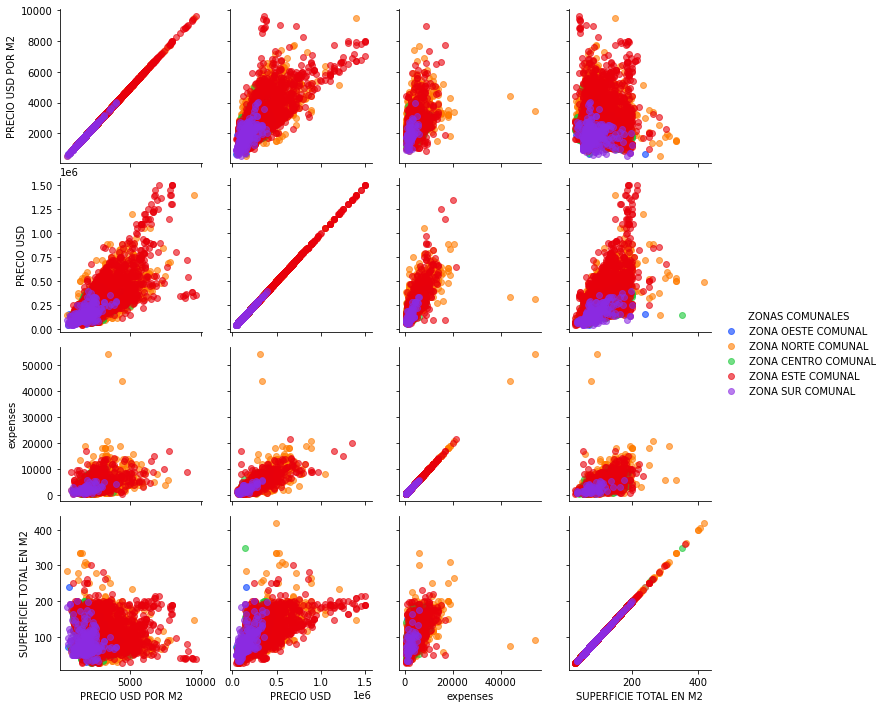

In [329]:
correlation_plotter(df_corr_capitalfederal_apartment,['PRECIO USD POR M2','PRECIO USD','expenses','SUPERFICIE TOTAL EN M2'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones DEPARTAMENTOS:
  
   * Las zonas comunales Norte y Este son las que presentan los departamentos mas caros, mientras que la Zona comunal Sur, es la que presenta los mas                economicos.
   
   * Las Zona comunales Norte y Este, tambien son los que presentan los departamentos con mas SUPERFICIE TOTAL EN M2.

   * Podemos ver que logicamente hay una correlacion `POSITIVA` con el PRECIO USD.
   
   * Podemos ver que hay una correlacion `POSITIVA` con el valor de las EXPENSAS del departamento, departamentos ubicados en zonas mas costosas o que tienen        mas amenities, suelen tener un PRECIO USD POR M2 mayor.
   
   * Podemos ver que hay una correlacion `POSITIVA` con el valor de SUPERFICIE del departamento.

##### CORRELACION EN CASAS UBICADAS EN CAPITAL FEDERAL

In [330]:
df_corr_capitalfederal_houses = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME','ZONAS COMUNALES']]
df_corr_capitalfederal_houses.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.676   
PRECIO USD                             0.676       1.000   
SUPERFICIE TOTAL EN M2                -0.087       0.594   
SUPERFICIE CUBIERTA EN M2              0.097       0.651   
rooms                                  0.026       0.380   
expenses                               0.372      -0.457   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.087                      0.097   
PRECIO USD                                  0.594                      0.651   
SUPERFICIE TOTAL EN M2                      1.000                      0.862   
SUPERFICIE CUBIERTA EN M2                   0.862                      1.000   
rooms                                       0.385                      0.543   
expenses                                   -0.171                     -0.449   

                           rooms  expenses  
PRECIO USD POR M2          0.026     0.372  
PRECIO USD                 0.380    -0.457  
SUPERFICIE TOTAL EN M2     0.385    -0.171  
SUPERFICIE CUBIERTA EN M2  0.543    -0.449  
rooms                      1.000       NaN  
expenses                     NaN     1.000

In [331]:
drop=df_corr_capitalfederal_houses[df_corr_capitalfederal_houses['PLACE NAME']=='sanjose'].index
df=df.drop(drop)

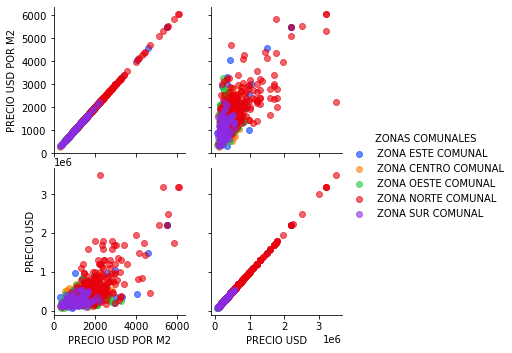

In [332]:
correlation_plotter(df_corr_capitalfederal_houses,['PRECIO USD POR M2','PRECIO USD'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones CASAS:

   * Al igual que con los departamentos, las casas mas caras, las encontramos en la Zona Comunal Norte.

   * Podemos ver que logicamente hay una correlacion `POSITIVA` con el PRECIO USD.
   

##### CORRELACION EN PHs UBICADOS EN CAPITAL FEDERAL

In [333]:
df_corr_capitalfederal_ph = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME','ZONAS COMUNALES']]
df_corr_capitalfederal_ph.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.210   
PRECIO USD                             0.210       1.000   
SUPERFICIE TOTAL EN M2                -0.486       0.687   
SUPERFICIE CUBIERTA EN M2             -0.363       0.647   
rooms                                 -0.279       0.479   
expenses                               0.178       0.246   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.486                     -0.363   
PRECIO USD                                  0.687                      0.647   
SUPERFICIE TOTAL EN M2                      1.000                      0.843   
SUPERFICIE CUBIERTA EN M2                   0.843                      1.000   
rooms                                       0.619                      0.626   
expenses                                    0.137                      0.288   

                           rooms  expenses  
PRECIO USD POR M2         -0.279     0.178  
PRECIO USD                 0.479     0.246  
SUPERFICIE TOTAL EN M2     0.619     0.137  
SUPERFICIE CUBIERTA EN M2  0.626     0.288  
rooms                      1.000    -0.001  
expenses                  -0.001     1.000

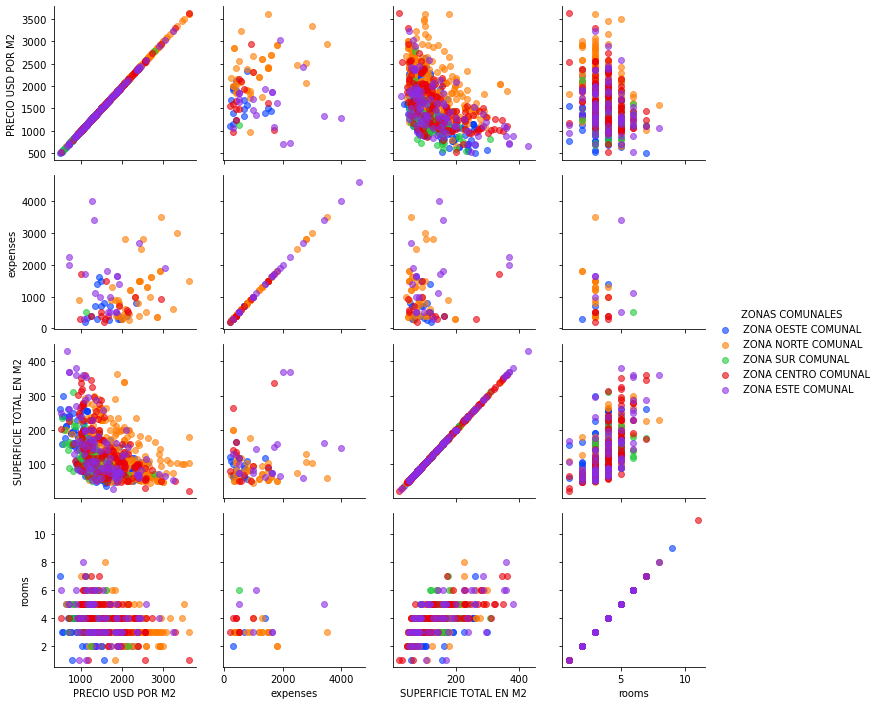

In [334]:
correlation_plotter(df_corr_capitalfederal_ph,['PRECIO USD POR M2','expenses','SUPERFICIE TOTAL EN M2','rooms'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones PHs:
   
   * Los PH que mayores EXPENSAS pagan, se encuentran en la ZONA ESTE COMUNAL y la ZONA NORTE COMUNAL.
   
   * Los PH de mayores dimensiones los encontramos en la ZONA ESTE COMUNAL y la ZONA NORTE COMUNAL.
   
   * Podemos ver que hay una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y las SUPERFICIES que ocupa el PH, a medida que aumentan las dimensiones de los      PH, el PRECIO USD POR M2, va disminuyendo.
    
   * Podemos ver que hay una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y la cantidad de ambientes del PH, lo cual esta relacionado con la conclusion        anterior sobre las dimensiones del PH.
   
   * Podemos ver que hay una correlacion `POSITIVA` entre el PRECIO USD POR M2 y las EXPENSAS que paga el PH, esto se debe probablemente, porque                    PHs ubicados en zonas mas costosas pagan mayores expensas.

##### CORRELACION EN DEPOSITOS UBICADOS EN CAPITAL FEDERAL

In [335]:
df_corr_capitalfederal_depositos = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME','ZONAS COMUNALES']]
df_corr_capitalfederal_depositos.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.363   
PRECIO USD                             0.363       1.000   
SUPERFICIE TOTAL EN M2                -0.329       0.579   
SUPERFICIE CUBIERTA EN M2             -0.268       0.602   
rooms                                 -0.498       0.179   
expenses                              -0.290       0.647   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.329                     -0.268   
PRECIO USD                                  0.579                      0.602   
SUPERFICIE TOTAL EN M2                      1.000                      0.932   
SUPERFICIE CUBIERTA EN M2                   0.932                      1.000   
rooms                                       0.453                      0.527   
expenses                                    0.198                      0.378   

                           rooms  expenses  
PRECIO USD POR M2         -0.498    -0.290  
PRECIO USD                 0.179     0.647  
SUPERFICIE TOTAL EN M2     0.453     0.198  
SUPERFICIE CUBIERTA EN M2  0.527     0.378  
rooms                      1.000       NaN  
expenses                     NaN     1.000

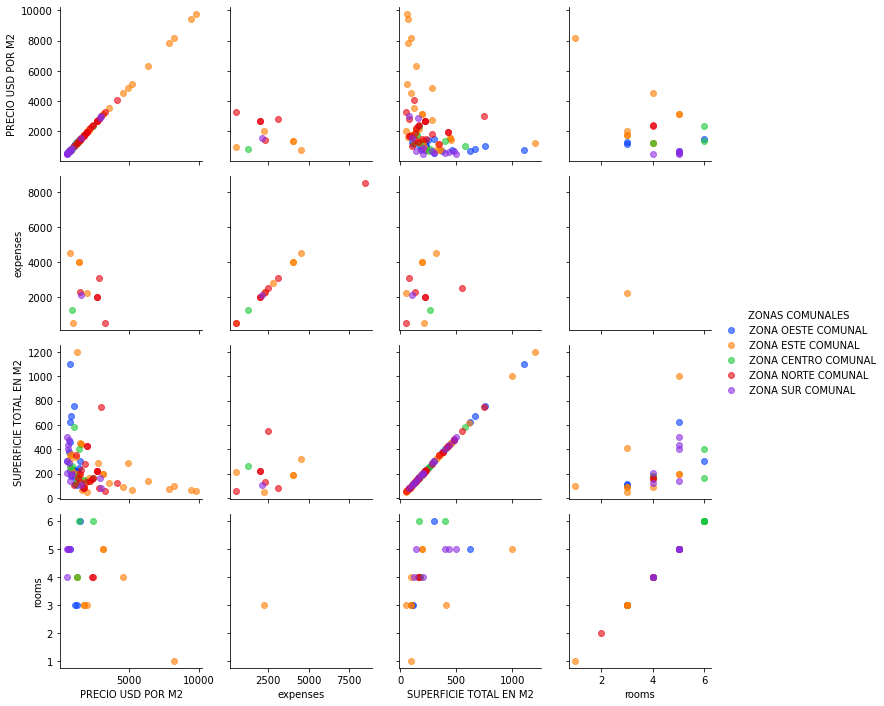

In [336]:
correlation_plotter(df_corr_capitalfederal_depositos,['PRECIO USD POR M2','expenses','SUPERFICIE TOTAL EN M2','rooms'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones DEPOSITOS:

   * Los depositos que mas expensas pagan, se encuentran en la ZONA COMUNAL ESTE.

   * Hay una correlacion `NEGATIVA`, entre el PRECIO USD POR M2 y las dimensiones del deposito.
       
   * Pareciera existir una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y las EXPENSAS que paga el DEPOSITO, pero al ser una cantidad pequeña de datos,        hay que tener cuidado con esta conclusion, no sabemos si es representativa.

##### CORRELACION EN STORES UBICADOS EN CAPITAL FEDERAL

In [337]:
df_corr_capitalfederal_stores = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME','ZONAS COMUNALES']]
df_corr_capitalfederal_stores.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.327   
PRECIO USD                             0.327       1.000   
SUPERFICIE TOTAL EN M2                -0.320       0.664   
SUPERFICIE CUBIERTA EN M2             -0.336       0.593   
rooms                                 -0.532      -0.027   
expenses                              -0.115       0.045   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.320                     -0.336   
PRECIO USD                                  0.664                      0.593   
SUPERFICIE TOTAL EN M2                      1.000                      0.986   
SUPERFICIE CUBIERTA EN M2                   0.986                      1.000   
rooms                                       0.518                      0.466   
expenses                                    0.409                      0.368   

                           rooms  expenses  
PRECIO USD POR M2         -0.532    -0.115  
PRECIO USD                -0.027     0.045  
SUPERFICIE TOTAL EN M2     0.518     0.409  
SUPERFICIE CUBIERTA EN M2  0.466     0.368  
rooms                      1.000     1.000  
expenses                   1.000     1.000

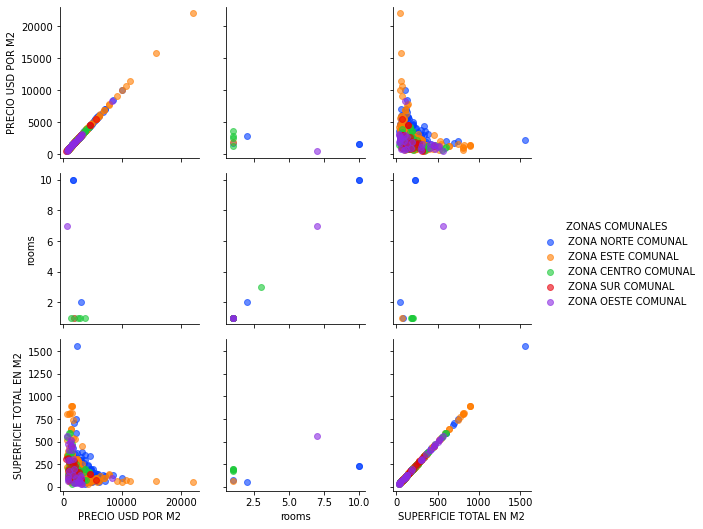

In [338]:
correlation_plotter(df_corr_capitalfederal_stores,['PRECIO USD POR M2','rooms','SUPERFICIE TOTAL EN M2'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones STORES:

   * Pareciera haber una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y la SUPERFICIE, Stores de mayores superficies, su PRECIO USD POR M2 va                  disminuyendo.
   
   * Pareciera haber una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y la cantidad de AMBIENTES del STORE, pero al ser una cantidad pequeña de datos, hay      que tener cuidado con esta conclusion, puede no ser representativa.

##### CORRELACION EN PISOS/SEMI-PISOS/PENTHOUSES UBICADOS EN CAPITAL FEDERAL

In [339]:
df_corr_capitalfederal_pisos = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME','ZONAS COMUNALES']]
df_corr_capitalfederal_pisos.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.881   
PRECIO USD                             0.881       1.000   
SUPERFICIE TOTAL EN M2                 0.035       0.439   
SUPERFICIE CUBIERTA EN M2              0.218       0.473   
rooms                                 -0.141       0.020   
expenses                               0.466       0.529   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                           0.035                      0.218   
PRECIO USD                                  0.439                      0.473   
SUPERFICIE TOTAL EN M2                      1.000                      0.800   
SUPERFICIE CUBIERTA EN M2                   0.800                      1.000   
rooms                                       0.339                      0.463   
expenses                                    0.275                      0.428   

                           rooms  expenses  
PRECIO USD POR M2         -0.141     0.466  
PRECIO USD                 0.020     0.529  
SUPERFICIE TOTAL EN M2     0.339     0.275  
SUPERFICIE CUBIERTA EN M2  0.463     0.428  
rooms                      1.000     0.093  
expenses                   0.093     1.000

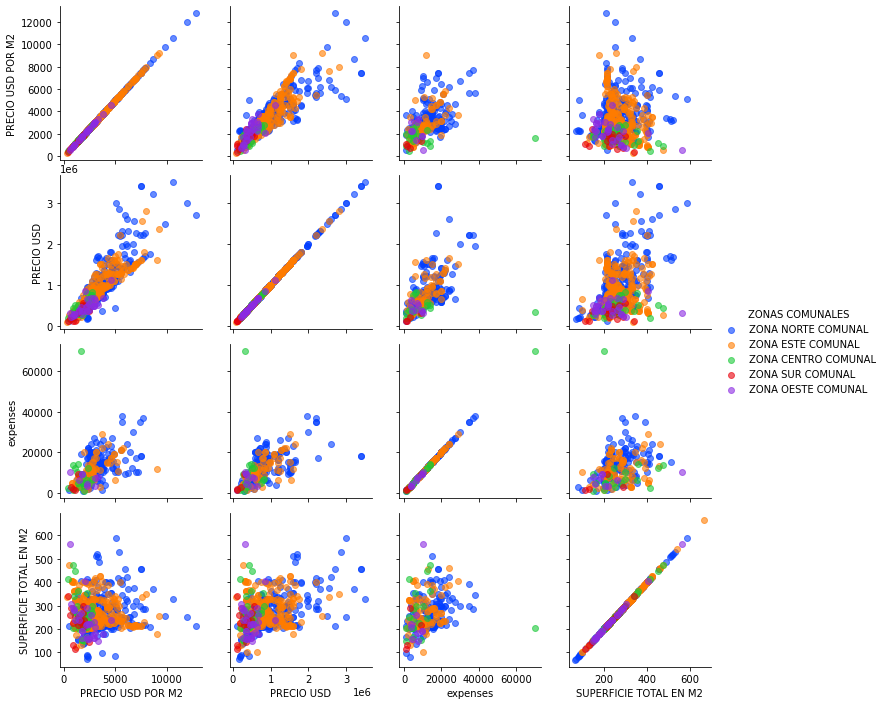

In [340]:
correlation_plotter(df_corr_capitalfederal_pisos,['PRECIO USD POR M2','PRECIO USD','expenses','SUPERFICIE TOTAL EN M2'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones PISOS/SEMI-PISOS/PENTHOUSES:

   * Los PISOS mas costosos, se encuentran en la ZONA NORTE COMUNAL
   
   * Los PISOS que mayor costos de expensas tienen, se encuentran en la ZONA NORTE COMUNAL.
   
   * Los PISOS de mayores dimensiones se encuentran en la ZONA ESTE COMUNAL.

   * Podemos ver que hay una correlacion `POSITIVA` con el PRECIO USD.
   
   * Podemos ver que hay una correlacion `POSITIVA` con el valor de las EXPENSAS del PISO, inmuebles ubicados en zonas mas costosas o que tienen mas amenities,      suelen tener un PRECIO USD POR M2 mayor.
   
   * A diferencia de otras propiedades, donde el PRECIO USD POR M2, disminuia conforme aumentaban las dimensiones de la propiedad, en este caso, podemos ver        que hay una correlacion `POSITIVA` entre las SUPERFICIES y el PRECIO USD POR M2, similar a lo que ocurre con los apartamentos, al aumentar la superficie        del inmueble, el PRECIO USD POR M2, tiene a aumentar.


## 8) Analisis y Operacion Sobre Datos Faltantes

Seguimos trabajando solamente sobre los inmuebles ubicados en capital federal

In [341]:
df_sin_imputar = df[df.state_name=='capitalfederal']

In [342]:
df[df.state_name=='capitalfederal'][['PLACE NAME','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRICE','CURRENCY','PRECIO USD','TIPO DE PROPIEDAD']]\
.isnull().sum()/df[df.state_name=='capitalfederal'].shape[0]*100


PLACE NAME                0.000
SUPERFICIE TOTAL EN M2   21.119
PRECIO USD POR M2        28.030
PRICE                     6.578
CURRENCY                  6.578
PRECIO USD                6.851
TIPO DE PROPIEDAD         0.000
dtype: float64

En primer lugar, vemos si podemos imputar algunos valores de PRECIO USD POR M2, a partir de SUPERFICIE TOTAL EN M2 y PRECIO USD, vamos a seguir la siguiente logica de operacion.

1 PRECIO USD = PRECIO USD POR M2 * SUPERFICIE TOTAL EN M2

2 SUPERFICIE TOTAL EN M2 = PRECIO USD / PRECIO USD POR M2

3 PRECIO USD POR M2 = PRECIO USD / SUPERFICIE TOTAL EN M2

In [343]:
df_PRECIO_USD_NULL_CAPITAL_FED_mask=np.logical_and(df.state_name=='capitalfederal',df['PRECIO USD'].isnull())

df.loc[df_PRECIO_USD_NULL_CAPITAL_FED_mask,'PRECIO USD'] = df[['PRECIO USD POR M2','SUPERFICIE TOTAL EN M2']].apply(lambda x: x['PRECIO USD POR M2']* x['SUPERFICIE TOTAL EN M2'], axis=1)


In [344]:
df_SUPERFICIE_TOTAL_EN_M2_NULL_CAPITAL_FED_mask=np.logical_and(df.state_name=='capitalfederal',df['SUPERFICIE TOTAL EN M2'].isnull())

df.loc[df_SUPERFICIE_TOTAL_EN_M2_NULL_CAPITAL_FED_mask,'SUPERFICIE TOTAL EN M2'] = df[['PRECIO USD','PRECIO USD POR M2']].apply(lambda x: x['PRECIO USD']* x['PRECIO USD POR M2'], axis=1)

In [345]:
df_PRECIO_USD_POR_M2_NULL_CAPITAL_FED_mask=np.logical_and(df.state_name=='capitalfederal',df['PRECIO USD POR M2'].isnull())

df.loc[df_PRECIO_USD_POR_M2_NULL_CAPITAL_FED_mask,'PRECIO USD POR M2'] = df[['PRECIO USD','SUPERFICIE TOTAL EN M2']].apply(lambda x: x['PRECIO USD']/x['SUPERFICIE TOTAL EN M2'], axis=1)

In [346]:
df[df.state_name=='capitalfederal'][['PLACE NAME','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRICE','CURRENCY','PRECIO USD','TIPO DE PROPIEDAD']]\
.isnull().sum()/df[df.state_name=='capitalfederal'].shape[0]*100

PLACE NAME                0.000
SUPERFICIE TOTAL EN M2   21.119
PRECIO USD POR M2        26.684
PRICE                     6.578
CURRENCY                  6.578
PRECIO USD                6.851
TIPO DE PROPIEDAD         0.000
dtype: float64

Logramos bajar un 1.3% aproximadamente la cantidad de NaN values en PRECIO USD POR M2

Ahora vamos a buscar imputar SUPERFICIE TOTAL EN M2, a partir de las medianas de las superficies agrupando por tipo de propiedad y zona.

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - DEPARTAMENTOS

In [347]:
df_departamentos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='apartment')]

superficie_total_departamentos_groupby_place_name_mean=df_departamentos_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']
superficie_total_departamentos_groupby_place_name_mean

PLACE NAME
abasto                77.526
agronomía             66.222
almagro               78.425
balvanera             82.171
barracas              91.103
barrionorte          102.517
belgrano             101.950
boca                  77.254
boedo                 85.737
caballito             89.876
centro/microcentro    82.778
chacarita             71.395
coghlan               82.767
colegiales            73.548
congreso              93.185
constitución          65.706
flores                80.590
floresta              75.797
lascañitas           106.116
liniers               65.058
mataderos             78.692
monserrat             71.444
montecastro           58.500
nuñez                 83.884
palermo               96.797
palermochico         128.402
palermohollywood      81.143
palermosoho           84.179
palermoviejo         126.611
parqueavellaneda      62.875
parquecentenario      99.611
parquechacabuco       71.875
parquechas            75.000
parquepatricios       75.644
pat

Vemos que hay 1 valor de superficie con NaN value VILLARIACHUELO

In [348]:
index_riachuelo = df_departamentos_capitalfederal[df_departamentos_capitalfederal['PLACE NAME']=='villariachuelo'].index
df_departamentos_capitalfederal[df_departamentos_capitalfederal['PLACE NAME']=='villariachuelo']


operation property_type      place_name  \
37502      sell     apartment  villariachuelo   

                         place_with_parent_names country_name      state_name  \
37502  |argentina|capitalfederal|villariachuelo|    argentina  capitalfederal   

       geonames_id              lat-lon     lat     lon     price currency  \
37502  3427379.000  -34698136,-58470461 -34.698 -58.470 85000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
37502                 1499782.500        85000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
37502                 60.000               NaN      1416.667 12.000  3.000   

       expenses  \
37502       NaN   

                                                                                                                       properati_url  \
37502  http://wwwproperaticomar/19e48_venta_departamento_villa-riachuelo_balcon_lavadero_piscina_luminoso_vista_re-max-acci-oacute-n   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  \
37502  corredorresponsable:soniaelvirawunderlich-csi5857contacto:marthamarquez-mlsid#420251066-40setratadeundepartamentode3ambientesmuycómodoluminosoyaireado,ingresamosalmismoporlivingcomedorconsalidaabalcóncerradoconcerramientodealuminioyprotecciónparaniñoshacialaderechadellivingingresamosaampliacocinaconmueblesaltoybajomesada,yacontinuaciónlavaderoseparadodosdormitoriosampliosconplacaresempotradosycómodascajonerasbañocompletoeldepartamentotieneestufaagasycalefónestárecienpintadoylistoparahabitarvistaspanorámicasespacioscomunesconmuchoverdeelpredioseencuentratotalmentecerradoconrejas,loqueleotorgaalcomplejoprivacidadyseguridad-eledificioeselnúmero49yseencuentrasobrelacolectoradelaavenidageneralpaz-excelenteyrápidasalidahaciacapitalyprovinciaclubesconampliasactividadesdeportivasypiscina-expensas$1,730-granoportunidadparatenertuviviendapropia!!!!!llamame-   

                                        title  \
37502  ventadepartamento3ambientesvillacelina   

                                                                                                                                                            image_thumbnail  \
37502  https://thumbs4properaticom/5/lj1l7nvhaaxghfnjbgrdkj5kmzs=/trim/198x0/smart/filters:strip_icc()/remaxcomar/userimages/42/l_6ee344d1aa0d4426bd28f5e85706f06d_ilistjpg   

           PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
37502  villariachuelo                     60.000                     NaN   

       PRECIO USD POR M2     PRICE CURRENCY  PRECIO USD TIPO DE PROPIEDAD  \
37502                NaN 85000.000      usd   85000.000         apartment   

        ZONAS COMUNALES  
37502  ZONA SUR COMUNAL

Observamos que se debe a que no tiene valor de SUPERFICIE TOTAL en el unico registro que existe de esa zona.

Debido a que se trata de un apartamento y las dimensiones cubiertas no suelen ser muy distintas a las totales, vamos a utilizar el valor de la SUPERFICE CUBIERTA

In [349]:
df.loc[index_riachuelo, 'SUPERFICIE TOTAL EN M2'] = df.loc[index_riachuelo, 'SUPERFICIE CUBIERTA EN M2']

In [350]:
df_departamentos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='apartment')]

superficie_total_departamentos_groupby_place_name_mean=df_departamentos_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']

In [351]:
df_departamentos_capital_SUP_TOTAL_null=df_departamentos_capitalfederal[df_departamentos_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_departamentos_capital_SUP_TOTAL_null = df_departamentos_capital_SUP_TOTAL_null.index
barrios_deptos_caba=df_departamentos_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_deptos_caba:
        if barrios == PLACE_NAME:
            return superficie_total_departamentos_groupby_place_name_mean.loc[barrios]

df.loc[index_departamentos_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_departamentos_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - CASAS

In [352]:
df_house_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='house')]

superficie_total_house_groupby_place_name_mean=df_house_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']
superficie_total_house_groupby_place_name_mean

PLACE NAME
abasto                371.500
agronomía             295.667
almagro               345.080
balvanera             233.000
barracas              256.735
barrionorte           396.000
belgrano              437.422
boca                  354.533
boedo                 290.267
caballito             256.780
centro/microcentro    600.000
chacarita             192.600
coghlan               226.750
colegiales            259.462
constitución          236.250
flores                270.614
floresta              276.618
lascañitas            304.000
liniers               244.893
mataderos             263.293
monserrat             399.375
montecastro           156.600
nuñez                 312.280
palermo               367.607
palermochico          461.462
palermohollywood      591.857
palermosoho           318.375
palermoviejo          260.000
parqueavellaneda      209.400
parquechacabuco       293.765
parquechas                NaN
parquepatricios       258.615
paternal              237.545

Observamos que tenemos un NaN en parque chas, debido a que no tenemos valores de Superficie total, solo de superficie cubierta.

In [353]:
df_house_capitalfederal[df_house_capitalfederal['PLACE NAME']=='parquechas']

operation property_type  place_name  \
16904      sell         house  parquechas   
30612      sell         house  parquechas   
79578      sell         house  parquechas   

                     place_with_parent_names country_name      state_name  \
16904  |argentina|capitalfederal|parquechas|    argentina  capitalfederal   
30612  |argentina|capitalfederal|parquechas|    argentina  capitalfederal   
79578  |argentina|capitalfederal|parquechas|    argentina  capitalfederal   

       geonames_id              lat-lon     lat     lon      price currency  \
16904  3430115.000  -34581357,-58478851 -34.581 -58.479 330000.000      usd   
30612  3430115.000  -34587768,-58480246 -34.588 -58.480 310000.000      usd   
79578  3430115.000  -34589122,-58480973 -34.589 -58.481 269000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
16904                 5822685.000       330000.000                  NaN   
30612                 5469795.000       310000.000                  NaN   
79578                 4746370.500       269000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
16904                180.000               NaN      1833.333    NaN  5.000   
30612                138.000               NaN      2246.377    NaN  4.000   
79578                141.000               NaN      1907.801    NaN  6.000   

       expenses  \
16904       NaN   
30612       NaN   
79578       NaN   

                                                                                                                                                                       properati_url  \
16904  http://wwwproperaticomar/17h9g_venta_casa_parque-chas_balcon_baulera_suite_jardin_lavadero_parrilla_patio_piscina_terraza_toilette_placard_subte-linea-b_re-max-acci-oacute-n   
30612                                                                                          http://wwwproperaticomar/18t5z_venta_casa_parque-chas_patio_terraza_garage_re-max-uno   
79578                                                         http://wwwproperaticomar/1c5yq_venta_casa_parque-chas_lavadero_parrilla_terraza_luminoso_garage_placard_re-max-alianza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  \
16904                                                                                                                                                                                                   corredorresponsable:marianoaufseher-cucicba4251contacto:alejandralopez-mlsid#420251092-41muylindacasasobrelotepropiode5,50(frente)/7,50(ctrfte)x11defondo3pisosrecicladayampliadaenel2009enplantabaja:halldeentrada,livingconventanaalfrenteconhogar,bar,ybarraampliotoilettecomedordiariococinacomedorconhornoindustrialyhornoparapizzasdoblebachatechosdeestilotipobovedilla1erplanta:dormitorioprincipalcondobleplacardybañoensuitealfrente,2dormitoriosconplacardysalidaabalconcorrido2dobañocompl

In [354]:
df_houses_capital_SUP_TOTAL_null=df_house_capitalfederal[df_house_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_houses_capital_SUP_TOTAL_null = df_houses_capital_SUP_TOTAL_null.index
barrios_houses_caba=df_house_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_houses_caba:
        if barrios == PLACE_NAME:
            return superficie_total_house_groupby_place_name_mean.loc[barrios]

df.loc[index_houses_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_houses_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - PHs

In [355]:
df_ph_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='ph')]

superficie_total_ph_groupby_place_name_mean=df_ph_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']

superficie_total_ph_groupby_place_name_mean

PLACE NAME
abasto              121.500
agronomía           123.333
almagro             153.122
balvanera           140.238
barracas            133.897
barrionorte          88.500
belgrano            142.111
boca                104.875
boedo               175.421
caballito           146.689
chacarita           122.500
coghlan             137.100
colegiales          139.118
congreso             67.500
constitución        106.444
flores              122.647
floresta            121.351
lascañitas           82.500
liniers             124.833
mataderos           120.296
monserrat           121.500
montecastro         105.500
nuñez               119.077
palermo             153.510
palermohollywood     92.750
palermosoho         120.286
palermoviejo        131.500
parqueavellaneda    150.750
parquecentenario    127.500
parquechacabuco     131.727
parquechas          150.000
parquepatricios     113.842
paternal            101.000
pompeya             158.167
recoleta             85.600
saavedra 

Observamos que tenemos un NaN en sarmiento y villa soldati, debido a que no tenemos valores de Superficie total.

In [356]:
df_ph_capitalfederal[df_ph_capitalfederal['PLACE NAME']=='sarmiento']

Empty DataFrame
Columns: [operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail, PLACE NAME, SUPERFICIE CUBIERTA EN M2, SUPERFICIE TOTAL EN M2, PRECIO USD POR M2, PRICE, CURRENCY, PRECIO USD, TIPO DE PROPIEDAD, ZONAS COMUNALES]
Index: []

In [357]:
df_ph_capitalfederal[df_ph_capitalfederal['PLACE NAME']=='villasoldati']

operation property_type    place_name  \
22229      sell            ph  villasoldati   

                       place_with_parent_names country_name      state_name  \
22229  |argentina|capitalfederal|villasoldati|    argentina  capitalfederal   

       geonames_id             lat-lon     lat     lon     price currency  \
22229  3427366.000  -3466244,-58448424 -34.662 -58.448 95000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
22229                 1676227.500        95000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
22229                 78.000               NaN      1217.949  2.000  3.000   

       expenses  \
22229       NaN   

                                                                                                             properati_url  \
22229  http://wwwproperaticomar/180kv_venta_ph_villa-soldati_lavadero_patio_terraza_luminoso_subte-premetro_re-max-alianza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  \
22229  corredorresponsable:martinmanias-cucicba6277contacto:nancyguitar-mlsid#420541033-50departamentophporpasillo,antiguoperomuybienconservadosólodosunidades,entradaindependientemuytranquiloyseguropatioconmozaicoscocinacomedorconmesada,alacenaybajomesadalivingcomedorconpisosdemozaicogranitoconventanaalpatiobañocompletodormitorioprincipalconventanaallavaderoypisosdeparquetdormitoriochicoconpisosdegranitoyventanaalpatiolavaderoterrazaconampliocuartodeguardadocercade:premetroadoscuadrasavcruzadoscuadrasdejumbolíneasdetrasportepúblico:101-143-150-76-46lapropiedadtieneplanosnoactualizados,consultarasubancoparasabersiesaptaasulíneadecrédito   

                                             title  \
22229  departartamphp/pasillo,3ambsc/patioyterraza   

                                                                                                                                                            image_thumbnail  \
22229  https://thumbs4properaticom/2/tlcdhpek41-ji03hktwetgdljmy=/trim/198x0/smart/filters:strip_icc()/remaxcomar/userimages/42/l_aa832f253a394e15b77fad67ff6e6e2d_ilistjpg   

         PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
22229  villasoldati                     78.000                     NaN   

       PRECIO USD POR M2     PRICE CURRENCY  PRECIO USD TIPO DE PROPIEDAD  \
22229                NaN 95000.000      usd   95000.000                ph   

        ZONAS COMUNALES  
22229  ZONA SUR COMUNAL

In [358]:
df_ph_capital_SUP_TOTAL_null=df_ph_capitalfederal[df_ph_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_ph_capital_SUP_TOTAL_null = df_ph_capital_SUP_TOTAL_null.index
barrios_ph_caba=df_ph_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_ph_caba:
        if barrios == PLACE_NAME:
            return superficie_total_ph_groupby_place_name_mean.loc[barrios]

df.loc[index_ph_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_ph_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - STORES

In [359]:
df_store_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='store')]

superficie_total_store_groupby_place_name_mean=df_store_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']
superficie_total_store_groupby_place_name_mean

PLACE NAME
abasto               165.800
almagro              208.273
balvanera            234.469
barracas             181.571
barrionorte           99.923
belgrano             221.208
boca                 187.500
boedo                181.111
caballito            223.643
centro/microcentro   209.032
chacarita             80.000
coghlan              278.000
colegiales           118.600
congreso             190.545
constitución         249.400
flores               168.235
floresta             116.000
lascañitas           350.000
liniers              282.833
mataderos            182.667
monserrat            356.360
nuñez                255.364
palermo              150.188
palermohollywood     370.667
palermosoho          176.571
palermoviejo             NaN
parquecentenario     100.000
parquechacabuco      450.500
parquechas           180.000
parquepatricios      164.083
paternal             162.750
pompeya              256.667
puertomadero         120.667
recoleta             120.000
ret

Observamos que tenemos un NaN en palermo viejo, villa lugano y villa luro.

In [360]:
df_store_capitalfederal[df_store_capitalfederal['PLACE NAME']=='palermoviejo']

operation property_type    place_name  \
61870      sell         store  palermoviejo   

                               place_with_parent_names country_name  \
61870  |argentina|capitalfederal|palermo|palermoviejo|    argentina   

           state_name  geonames_id                     lat-lon     lat  \
61870  capitalfederal          NaN  -345981559056,-58408105003 -34.598   

          lon      price currency  price_aprox_local_currency  \
61870 -58.408 198000.000      usd                 3493611.000   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
61870       198000.000                  NaN                104.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
61870               NaN      1903.846    NaN    NaN       NaN   

                                                                                                                                             properati_url  \
61870  http://wwwproperaticomar/1b0mr_venta_local_palermo-viejo_cordoba-av-_2900_estrenar_subte-linea-d_subte-linea-b_subte-linea-h_urbano-propiedades_ghw   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  \
61870  ventaopermutadelocalaestrenar,enplantabaja,alfrente,conentradaindependiente,enedificiomodernoyconmuybuenaubicación,sobrelaavcórdobaenelbarriodepalermo,dondetransitanporteñosyturistas,ademásdevariadaslíneasdecolectivoylossubtesdenlacercanaavsantaféyelbenlaavcorrientesenlazonapredominanloslocalescomerciales,oficinaseinstitucionesdeenseñanzacomolasuniversidadesdemedicina,económicasyelhospitaldeclínicasellocalestáequipadocon1bañoycocina;esaptoprofesionalyadmitevariosrubros,enlamedidaquenoafectenlaestéticadeledificioylatranquilidaddeloshabitantesnoesaptogastronomianiotrorubroquerequieraventilaciónalos4vientoslosgastosactualessonexpensasde$4500yablde$600mensualesrespectoalapermuta,puedenserpropiedadesencapitaloprovinciadebuenosaires,incluyendolacostaatlántica,preferentementeconrentacontactos:silvianigro4115-7111//115606-4694urbanopropiedadesavsantafe1480capitalfederaltel   

                    title  \
61870  local-palermoviejo   

                                                                                                                                                                                                                 image_thumbnail  \
61870  https://thumbs4properaticom/6/bstjfl0o6fcvnfpapq7r_14khx0=/trim/198x0/smart/filters:strip_icc()/tbcns3-accelerateamazonawscom/water_pics/26587532703267028673046008213336306989990428537777195557089879454329085842557jpg   

         PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
61870  palermoviejo                    104.000                     NaN   

       PRECIO USD POR M2      PRICE CURRENCY  PRECIO USD TIPO DE PROPIEDAD  \
61870                NaN 198000.000      usd  198000.000             store   

          ZONAS COMUNALES  
61870  ZONA NORTE COMUNAL

In [361]:
df_store_capitalfederal[df_store_capitalfederal['PLACE NAME']=='villalugano']

operation property_type   place_name  \
13043      sell         store  villalugano   

                      place_with_parent_names country_name      state_name  \
13043  |argentina|capitalfederal|villalugano|    argentina  capitalfederal   

       geonames_id               lat-lon     lat     lon     price currency  \
13043  3427408.000  -34670624,-584801284 -34.671 -58.480 48000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
13043                  846936.000        48000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
13043                    NaN               NaN           NaN    NaN    NaN   

       expenses  \
13043       NaN   

                                                            properati_url  \
13043  http://wwwproperaticomar/16zyk_venta_local_villa-lugano_g-goffredo   

                                                                                                                                                                                  description  \
13043  ventadelocalconfondodecomercio,totalmenteequipadoparaactividadesdepedicuríatambiéncuentaconcamillaparamasajesavisopublicadoporpixelinmobiliario(serviciodepáginaswebparainmobiliarias)   

                                   title  \
13043  localc/fondodecomercioenlugano1y2   

                                                                                                                                                                                                                                                          image_thumbnail  \
13043  https://thumbs4properaticom/6/ornmcl1axyuxq_jrfgrfuj0bmas=/trim/198x0/smart/filters:strip_icc()/mapsgoogleapiscom/maps/api/staticmap%3fkey=aizasyctb7aox9mj3hcrd_u4kj5n0v8sykusnaa&center=-34670624,-584801284&zoom=19&size=800x600&maptype=satellite&sensor=false   

        PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
13043  villalugano                        NaN                     NaN   

       PRECIO USD POR M2     PRICE CURRENCY  PRECIO USD TIPO DE PROPIEDAD  \
13043                NaN 48000.000      usd   48000.000             store   

        ZONAS COMUNALES  
13043  ZONA SUR COMUNAL

In [362]:
df_store_capitalfederal[df_store_capitalfederal['PLACE NAME']=='villaluro']

operation property_type place_name  \
54182      sell         store  villaluro   

                    place_with_parent_names country_name      state_name  \
54182  |argentina|capitalfederal|villaluro|    argentina  capitalfederal   

       geonames_id lat-lon  lat  lon      price currency  \
54182  3427407.000     NaN  NaN  NaN 330000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
54182                 5822685.000       330000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
54182                    NaN               NaN           NaN    NaN    NaN   

       expenses  \
54182       NaN   

                                                                   properati_url  \
54182  http://wwwproperaticomar/1amaj_venta_local_villa-luro_capital-brokers_gd0   

                                                                                                                                                                                                                                                                                                                             description  \
54182  capitalbrokerspropiedadeso15-localcomercialconoficinassobrelotepropioventacondicionadaalaobtenciónporpartedelpropietariodelcotilasmedidas,superficiesyexpensasconsignadasenlapresentesonaproximadasynoresultanvinculanteslosdatosdefinitivossonlosquesurgendeltitulodepropiedadydelrecibodeexpensascapitalbrokerspropiedades|o15-   

       title  \
54182  venta   

                                                                                                                                                                                                                image_thumbnail  \
54182  https://thumbs4properaticom/1/juydcegjgshlmd-urmr_vm95jmg=/trim/198x0/smart/filters:strip_icc()/tbcns3-accelerateamazonawscom/pictures/101759704569414378514765128838292935500253150122343920915629633744466221354165jpg   

      PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
54182  villaluro                        NaN                     NaN   

       PRECIO USD POR M2      PRICE CURRENCY  PRECIO USD TIPO DE PROPIEDAD  \
54182                NaN 330000.000      usd  330000.000             store   

          ZONAS COMUNALES  
54182  ZONA OESTE COMUNAL

In [363]:
df_store_capital_SUP_TOTAL_null=df_store_capitalfederal[df_store_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_store_capital_SUP_TOTAL_null = df_store_capital_SUP_TOTAL_null.index
barrios_store_caba=df_store_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_store_caba:
        if barrios == PLACE_NAME:
            return superficie_total_store_groupby_place_name_mean.loc[barrios]

df.loc[index_store_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_store_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - DEPOSITOS

In [364]:
df_depositos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='deposito')]

superficie_total_deposito_groupby_place_name_mean=df_depositos_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']
superficie_total_deposito_groupby_place_name_mean

PLACE NAME
agronomía            350.000
almagro              282.000
balvanera            181.000
barracas             403.000
barrionorte          107.500
belgrano             344.200
boca                 274.000
boedo                135.000
caballito            373.500
centro/microcentro   217.400
coghlan              148.000
colegiales           296.667
congreso                 NaN
constitución         231.000
flores               258.000
floresta             389.600
mataderos            238.200
monserrat            374.833
montecastro          755.000
nuñez                241.200
palermo              323.333
palermohollywood     303.667
palermosoho           78.000
parqueavellaneda     245.000
parquechacabuco          NaN
parquechas           140.000
parquepatricios      240.333
paternal                 NaN
pompeya              120.000
puertomadero          66.000
recoleta             133.571
retiro               200.500
sancristobal         775.000
sannicolás           176.000
san

Observamos que tenemos un NaN en congreso, parque chacabuco y paternal

Debido a que consideramos deposito tambien a los departamentos que ofrecen esta posibilidad, vamos a utilizar el mismo criterio que con los apartamentos, tomando el valor de la superficie cubierta, como el valor de superficie total para los ultimos dos index

In [365]:
congreso_index=df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']=='congreso'].index

df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']=='congreso']

operation property_type place_name              place_with_parent_names  \
5618       sell         store   congreso  |argentina|capitalfederal|congreso|   
30594      sell     apartment   congreso  |argentina|capitalfederal|congreso|   

      country_name      state_name  geonames_id              lat-lon     lat  \
5618     argentina  capitalfederal  3435259.000  -34611482,-58387897 -34.611   
30594    argentina  capitalfederal  3435259.000  -34606685,-58390853 -34.607   

          lon      price currency  price_aprox_local_currency  \
5618  -58.388        NaN      NaN                         NaN   
30594 -58.391 255000.000      usd                 4499347.500   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
5618               NaN                  NaN                    NaN   
30594       255000.000                  NaN                116.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
5618                NaN           NaN  2.000    NaN       NaN   
30594               NaN      2198.276  5.000  5.000       NaN   

                                                                                                                                                        properati_url  \
5618                                                                       http://wwwproperaticomar/15ycc_venta_local_congreso_sotano_subte-linea-a_re-max-connection   
30594  http://wwwproperaticomar/18t3f_venta_departamento_congreso_balcon_vestidor_luminoso_impecable_placard_subte-linea-d_subte-linea-b_subte-linea-a_re-max-liberty   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  \
5618                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [366]:
df.loc[congreso_index[0],'SUPERFICIE TOTAL EN M2'] = 496

df.loc[congreso_index[1],'SUPERFICIE TOTAL EN M2']=df.loc[congreso_index[1],'SUPERFICIE CUBIERTA EN M2']

In [367]:
index_chacabuco = df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']=='parquechacabuco'].index

df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']=='parquechacabuco']

operation property_type       place_name  \
45369      sell         house  parquechacabuco   

                          place_with_parent_names country_name  \
45369  |argentina|capitalfederal|parquechacabuco|    argentina   

           state_name  geonames_id             lat-lon     lat     lon  \
45369  capitalfederal  3430116.000  -34643421,-5843686 -34.643 -58.437   

           price currency  price_aprox_local_currency  price_aprox_usd  \
45369 159000.000      usd                 2805475.500       159000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
45369                  NaN                100.000               NaN   

       price_per_m2  floor  rooms  expenses  \
45369      1590.000    NaN  6.000       NaN   

                                                                                                      properati_url  \
45369  http://wwwproperaticomar/19yve_venta_casa_parque-chacabuco_lavadero_patio_luminoso_garage_re-max-cosmopolita   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
45369  corredorresponsable:patriciamariasodor-cucicba5414/csi6061contacto:arielsottosanti-mlsid#291103-30casaenlotepropioidealtallerdecostura,depositoentradavehículoutilitariodosbaños6ambpatiocubiertoampliogarajecocinaareciclarlavaderopróximoavenidasinvitamosaverfotosyvideodelapropiedadelpreciodelinmueblepuedesermodificadosinprevioavisotodafotoy/ográficoesdecarácternocontractualtodainformaciónesasóloefectoorientativolasmedidas,superficies,metrajesyproporcionesinformadossonaproximados,lasmedidasrealessurgirándeltítulodepropiedadrespectivoavisolegal:corredorresponsablemaríapatriciasodorcucicba5414/csi6061encumplimientodelasnormaslegalesaplicables,todaslasoperacionesinmobiliariassonconcluidasporelcorredorinmobiliariomatriculadoycolegiadodelaoficinare/maxcadaoficinaesdegestiónindependientelapublicación,uso,copiaeimpresióntotaloparcialdeestemensajeodocumentosadjuntosquedaprohibidasucontenidonopuedeserpublicado,transmitidooreveladoatercerosnidivulgadoenformaalgunaencumplimientodelaley2340cucicba,ley10973pciabsas,ley22802delealtadcomercial,ley24240dedefensadelconsumidor,lasnormasdelcódigocivilycomercialdelanaciónyconstitucionales,losagentesnoejercenelcorretajeinmobiliario   

                                           title  \
45369  casalotepropioidealtallercostura,depósito   

                                                                                                                                                            image_thumbnail  \
45369  https://thumbs4properaticom/1/370ebfsgdd9whoidt3ad09u-ale=/trim/198x0/smart/filters:strip_icc()/remaxcomar/userimages/42/l_b600f79ff72449e2a4ae405f051c6c6a_ilistjpg   

            PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
45369  parquechacabuco                    100.000                     NaN   

       PREC

In [368]:
paternal_index=df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']=='paternal'].index

df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']=='paternal']

operation property_type place_name              place_with_parent_names  \
53229      sell         store   paternal  |argentina|capitalfederal|paternal|   

      country_name      state_name  geonames_id                      lat-lon  \
53229    argentina  capitalfederal  3430087.000  -346089581386,-584659541013   

          lat     lon      price currency  price_aprox_local_currency  \
53229 -34.609 -58.466 900000.000      usd                15880050.000   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
53229       900000.000                  NaN                853.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
53229               NaN      1055.100    NaN    NaN       NaN   

                                                                                                                properati_url  \
53229  http://wwwproperaticomar/1akf9_venta_local_paternal_terrero_1700_patio_lujoso_aire-acondicionado_grupo-mega-pedace_gen   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
53229  importantisimoedificioinustrialde3plantasconentradaparacamión,condoblecortina,enexcelenteestado,condetallesdecategoria,puedeexplotarsedemanereamixtaindustriayviviendaplantabaja:entradaaoficina(3,55x3,16)yentrepiso,cocinaybañoparapersonaldeseguridad,yescalerademármolconaccesoalaplantaalta,tambienentradadecamión(5,50x8,36),condoblepersiana,todalaplantaesgalpon(8,66x23),sincolumnas,bañosyvestuarios,alcontrafrenteoficinaenalto,saladecontrol(6,16x3,10)quemiraaldepósito1erpiso:(pisounicoquepuedeservivienda)con5oficinasohabitacionesde(4,44x3,90/-3x3,90/-3,60x3,80/-4x4,36/-7,36x4,06/-2,80x3,41),unarchivo,bañoyantebaño,2patios,ysalóndepósito(11,30x6,36)2dopiso:alfrentesalondeconferencia(8,66x10,90)techodemaderaadosaguas,pisosceramicos,cocinacompleta,oficina(4x2,60)yalfondodepósito(8,36x11,40)techoreticuladoparabolico(mixtoviviendaygalpony/ooficinaygalpon)superficietotal853m2,284m2porplantamontacargas,calefaccioncentralyaireacondicionadotambien,electriciadindustrialdetallesdegrancategoriahabilitadoacualmentecomo:comerciomayorista,articuloslibreria,pepeleria,carton,impresos,filat,juguetes,discosygrabaciones(s/deposito),oficinascomerciallasmedidassonaproximadas,planosenoficna   

                                                          title  \
53229  edificioindustrial3plantasentradadecamionexcelenteestado   

                                                                                                                                                                                                                 image_thumbnail  \
53229  https://thumbs4properaticom/3/vas9bawgsveyvpz339uwdv2l664=/trim/198x0/smart/filters:strip_icc()/tbcns3-accelerateamazonawscom/water_pics/53155313786161900421363963140938651366710455991116165730005234656786656197578jpg   

      PLACE NAME  SUPERFI

In [369]:
df.loc[paternal_index,'SUPERFICIE TOTAL EN M2'] = 853


In [370]:
df_depositos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='deposito')]

superficie_total_deposito_groupby_place_name_mean=df_depositos_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']

In [371]:
df_depositos_capital_SUP_TOTAL_null=df_depositos_capitalfederal[df_depositos_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_depositos_capital_SUP_TOTAL_null = df_depositos_capital_SUP_TOTAL_null.index
barrios_depositos_caba=df_depositos_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_depositos_caba:
        if barrios == PLACE_NAME:
            return superficie_total_deposito_groupby_place_name_mean.loc[barrios]

df.loc[index_depositos_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_depositos_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - DUPLEX/TRIPLEX

In [372]:
df_duplex_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='duplex/triplex')]

superficie_total_duplex_groupby_place_name_mean=df_duplex_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']
superficie_total_duplex_groupby_place_name_mean

PLACE NAME
almagro               62.000
balvanera            102.000
barracas              99.000
barrionorte          135.500
belgrano             111.100
boca                 120.750
boedo                103.250
caballito            104.727
centro/microcentro    91.000
chacarita             55.000
coghlan              153.333
colegiales           122.667
congreso              73.000
flores               101.167
floresta              75.000
lascañitas           100.500
liniers               65.000
mataderos             96.667
monserrat             60.000
montecastro          104.667
nuñez                 74.267
palermo              111.579
palermochico         204.500
palermohollywood      94.286
palermosoho          137.000
parquecentenario     190.000
paternal              63.000
pompeya                  NaN
puertomadero         134.000
recoleta             150.864
retiro               111.000
saavedra              82.636
sancristobal         155.500
sannicolás            60.000
san

Observamos que tenemos un NaN en pompeya.

In [373]:
df_duplex_capitalfederal[df_duplex_capitalfederal['PLACE NAME']=='pompeya']

operation property_type place_name             place_with_parent_names  \
25171      sell            ph    pompeya  |argentina|capitalfederal|pompeya|   

      country_name      state_name  geonames_id              lat-lon     lat  \
25171    argentina  capitalfederal  3430387.000  -34646048,-58414174 -34.646   

          lon      price currency  price_aprox_local_currency  \
25171 -58.414 115000.000      usd                 2029117.500   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
25171       115000.000                  NaN                 66.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
25171               NaN      1742.424    NaN  4.000       NaN   

                                                                                                            properati_url  \
25171  http://wwwproperaticomar/18azx_venta_ph_pompeya_balcon_lavadero_patio_terraza_placard_subte-linea-h_re-max-premium   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  \
25171  corredorresponsable:arielchampanier-cucicba4330contacto:lucíabonetsemenas-mlsid#181284-61venta4ambduplexalbertoeinsteinyavalmafuertetodoluz!!enpb,seencuentraellivingcomedor,cocina,patiodondeseubicaellavadero,bañoyundormitorioconplacardutilizadohoycomodormitorioprincipalenlapartesuperiorseencuentranunbaño,dospiezasdeexcelentesdimensionesconplacardsybalcónterrazade9metrostransportescercanoscolectivos:6,9,15,28,32,46,70,75,85,91,112,115,128,150,160,165,193trenes:drantoniosáenz(belgranosur),drantoniosáenz(belgranosur)   

                                 title  \
25171  venta4ambduplexhospitaleslineah   

                                                                                                                                                            image_thumbnail  \
25171  https://thumbs4properaticom/0/svuvuriuxgmfnkx9xawcdugoack=/trim/198x0/smart/filters:strip_icc()/remaxcomar/userimages/42/l_3bc6b05bdfae47eb8adcb5d719869f72_ilistjpg   

      PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
25171    pompeya                     66.000                     NaN   

       PRECIO USD POR M2      PRICE CURRENCY  PRECIO USD TIPO DE PROPIEDAD  \
25171                NaN 115000.000      usd  115000.000    duplex/triplex   

        ZONAS COMUNALES  
25171  ZONA SUR COMUNAL

In [374]:
df_duplex_capital_SUP_TOTAL_null=df_duplex_capitalfederal[df_duplex_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_duplex_capital_SUP_TOTAL_null = df_duplex_capital_SUP_TOTAL_null.index
barrios_duplex_caba=df_duplex_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_duplex_caba:
        if barrios == PLACE_NAME:
            return superficie_total_duplex_groupby_place_name_mean.loc[barrios]

df.loc[index_duplex_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_duplex_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

### IMPUTACION DE SUPERFICIE TOTAL EN M2 - PISOS/PENTHOUSES

In [375]:
df_pisos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal', df['TIPO DE PROPIEDAD']=='piso/penthouse')]

superficie_total_pisos_groupby_place_name_mean=df_pisos_capitalfederal.groupby('PLACE NAME').mean()['SUPERFICIE TOTAL EN M2']
superficie_total_pisos_groupby_place_name_mean

PLACE NAME
almagro              233.615
balvanera            260.364
barracas             233.444
barrionorte          278.271
belgrano             267.063
boca                 276.000
boedo                249.500
caballito            276.882
catalinas            300.000
centro/microcentro   313.750
chacarita            202.000
coghlan              220.500
colegiales           229.800
congreso             262.400
constitución         243.500
flores               250.500
lascañitas           240.300
liniers              260.000
mataderos            271.667
monserrat            226.636
montecastro          289.000
nuñez                277.179
palermo              279.957
palermochico         282.000
palermohollywood     267.667
palermosoho          203.000
parquecentenario     237.000
puertomadero         275.900
recoleta             273.303
retiro               256.526
saavedra             139.143
sancristobal         360.000
sannicolás           243.667
santelmo             383.000
tri

In [376]:
df_pisos_capital_SUP_TOTAL_null=df_pisos_capitalfederal[df_pisos_capitalfederal['SUPERFICIE TOTAL EN M2'].isnull()]
index_pisos_capital_SUP_TOTAL_null = df_pisos_capital_SUP_TOTAL_null.index
barrios_pisos_caba=df_pisos_capitalfederal['PLACE NAME'].unique()

def imputador(PLACE_NAME):
    for barrios in barrios_pisos_caba:
        if barrios == PLACE_NAME:
            return superficie_total_pisos_groupby_place_name_mean.loc[barrios]

df.loc[index_pisos_capital_SUP_TOTAL_null,'SUPERFICIE TOTAL EN M2']=df_pisos_capital_SUP_TOTAL_null['PLACE NAME'].apply(lambda x: imputador(x))

Vamos a revisar como quedo nuestra columna SUPERFICIE TOTAL EN M2

In [377]:
df[df.state_name=='capitalfederal'][['PLACE NAME','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRICE','CURRENCY','PRECIO USD','TIPO DE PROPIEDAD']]\
.isnull().sum()/df[df.state_name=='capitalfederal'].shape[0]*100

PLACE NAME                0.000
SUPERFICIE TOTAL EN M2    0.068
PRECIO USD POR M2        26.684
PRICE                     6.578
CURRENCY                  6.578
PRECIO USD                6.851
TIPO DE PROPIEDAD         0.000
dtype: float64

In [378]:
df[np.logical_and(df.state_name=='capitalfederal',df['SUPERFICIE TOTAL EN M2'].isnull())]\
        [['TIPO DE PROPIEDAD','PLACE NAME','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2']]

TIPO DE PROPIEDAD       PLACE NAME  SUPERFICIE CUBIERTA EN M2  \
13043             store      villalugano                        NaN   
16904             house       parquechas                    180.000   
22229                ph     villasoldati                     78.000   
25171    duplex/triplex          pompeya                     66.000   
30612             house       parquechas                    138.000   
45369          deposito  parquechacabuco                    100.000   
54182             store        villaluro                        NaN   
61870             store     palermoviejo                    104.000   
79578             house       parquechas                    141.000   

       SUPERFICIE TOTAL EN M2  
13043                     NaN  
16904                     NaN  
22229                     NaN  
25171                     NaN  
30612                     NaN  
45369                     NaN  
54182                     NaN  
61870                     NaN  
79578                     NaN

Los valores que quedaron sin imputar, son aquellos donde no tenemos registros, para poder sacar su valor de imputacion.

#### Ahora imputamos el PRECIO USD POR M2 con PRICE USD y SUPERFICIE TOTAL EN M2

In [379]:
df_PRECIO_USD_POR_M2_NULL_CAPITAL_FED_mask=np.logical_and(df.state_name=='capitalfederal',df['PRECIO USD POR M2'].isnull())

df.loc[df_PRECIO_USD_POR_M2_NULL_CAPITAL_FED_mask,'PRECIO USD POR M2'] = df[['PRECIO USD','SUPERFICIE TOTAL EN M2']].apply(lambda x: x['PRECIO USD']/x['SUPERFICIE TOTAL EN M2'], axis=1)

In [380]:
df[df.state_name=='capitalfederal'].isnull().sum()/df[df.state_name=='capitalfederal'].shape[0]*100

operation                     0.000
property_type                 0.000
place_name                    0.000
place_with_parent_names       0.000
country_name                  0.000
state_name                    0.000
geonames_id                   4.658
lat-lon                      15.622
lat                          15.622
lon                          15.622
price                         6.911
currency                      6.911
price_aprox_local_currency    6.911
price_aprox_usd               6.911
surface_total_in_m2          22.238
surface_covered_in_m2        10.011
price_usd_per_m2             28.030
price_per_m2                 15.304
floor                        89.225
rooms                        46.178
expenses                     75.471
properati_url                 0.000
description                   0.000
title                         0.000
image_thumbnail               0.000
PLACE NAME                    0.000
SUPERFICIE CUBIERTA EN M2    10.011
SUPERFICIE TOTAL EN M2      

### Vamos a ver como se afecto el PRECIO USD POR M2 con un scatterplot antes y despues de la imputacion.

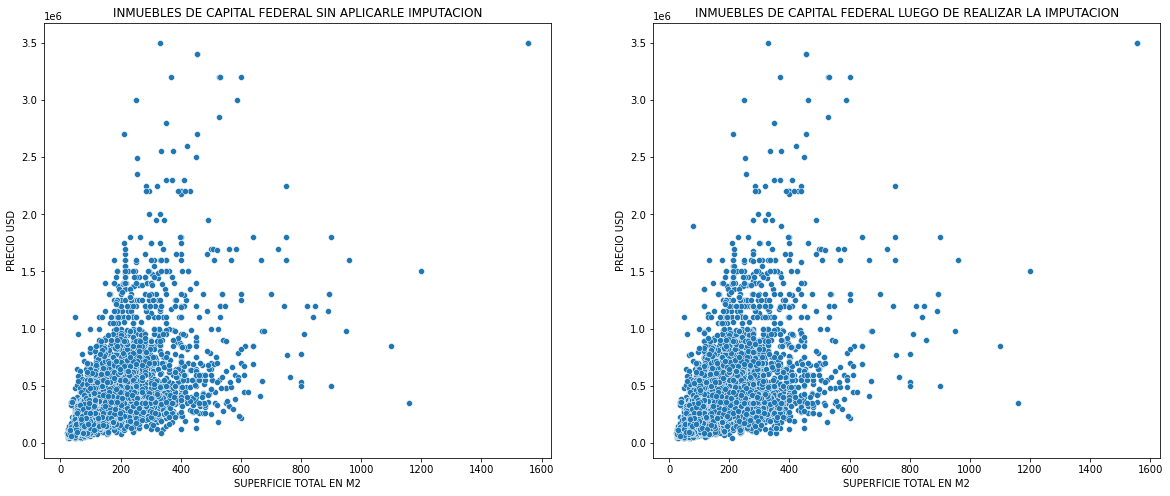

In [381]:
fig,ax = plt.subplots(ncols=2, figsize=(20,8))

g1 =sns.scatterplot(data = df[df.state_name=='capitalfederal'], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD',ax = ax[1])
g2 = sns.scatterplot(data = df_sin_imputar, x='SUPERFICIE TOTAL EN M2', y='PRECIO USD', ax=ax[0])

g1.set_title("INMUEBLES DE CAPITAL FEDERAL LUEGO DE REALIZAR LA IMPUTACION")
g2.set_title("INMUEBLES DE CAPITAL FEDERAL SIN APLICARLE IMPUTACION")

plt.show()

### Vamos a separar por zonas comunales a los inmuebles, a ver como afecto la imputacion.

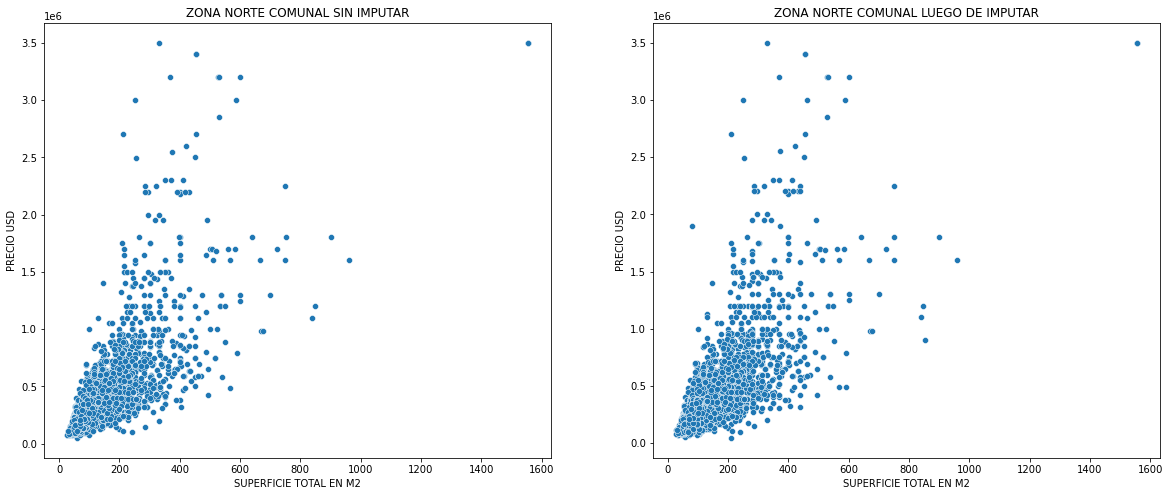

In [382]:
fig,ax = plt.subplots(ncols=2, figsize=(20,8))

g1 = sns.scatterplot(data = df[np.logical_and(df.state_name=='capitalfederal',df['ZONAS COMUNALES']=='ZONA NORTE COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD',ax = ax[1])
g2 = sns.scatterplot(data = df_sin_imputar[np.logical_and(df_sin_imputar.state_name=='capitalfederal',df_sin_imputar['ZONAS COMUNALES']=='ZONA NORTE COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD', ax=ax[0])

g1.set_title("ZONA NORTE COMUNAL LUEGO DE IMPUTAR")
g2.set_title("ZONA NORTE COMUNAL SIN IMPUTAR")

plt.show()

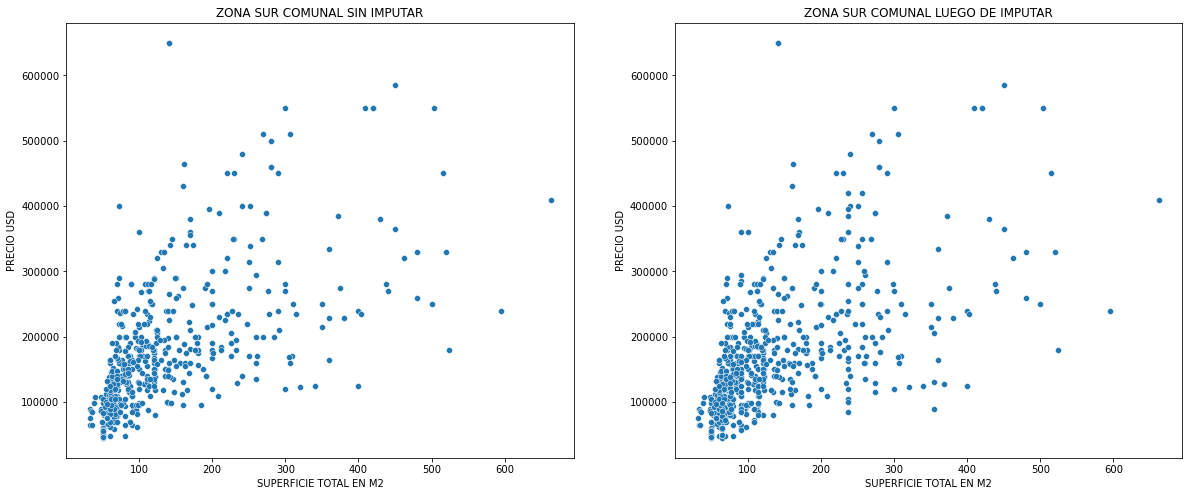

In [383]:
fig,ax = plt.subplots(ncols=2, figsize=(20,8))

g1 = sns.scatterplot(data = df[np.logical_and(df.state_name=='capitalfederal',df['ZONAS COMUNALES']=='ZONA SUR COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD',ax = ax[1])
g2 = sns.scatterplot(data = df_sin_imputar[np.logical_and(df_sin_imputar.state_name=='capitalfederal',df_sin_imputar['ZONAS COMUNALES']=='ZONA SUR COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD', ax=ax[0])

g1.set_title("ZONA SUR COMUNAL LUEGO DE IMPUTAR")
g2.set_title("ZONA SUR COMUNAL SIN IMPUTAR")

plt.show()

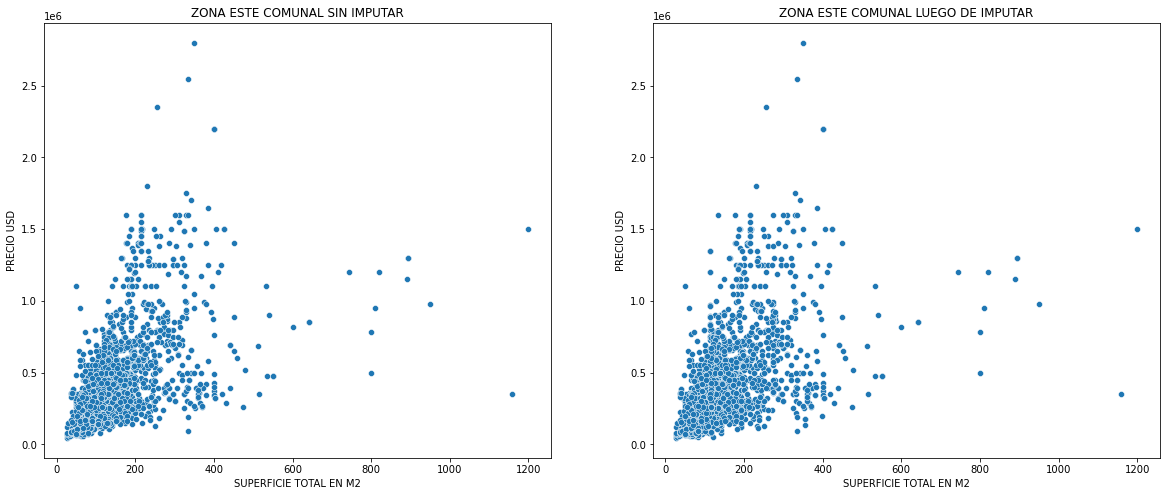

In [384]:
fig,ax = plt.subplots(ncols=2, figsize=(20,8))

g1 = sns.scatterplot(data = df[np.logical_and(df.state_name=='capitalfederal',df['ZONAS COMUNALES']=='ZONA ESTE COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD',ax = ax[1])
g2 = sns.scatterplot(data = df_sin_imputar[np.logical_and(df_sin_imputar.state_name=='capitalfederal',df_sin_imputar['ZONAS COMUNALES']=='ZONA ESTE COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD', ax=ax[0])

g1.set_title("ZONA ESTE COMUNAL LUEGO DE IMPUTAR")
g2.set_title("ZONA ESTE COMUNAL SIN IMPUTAR")

plt.show()

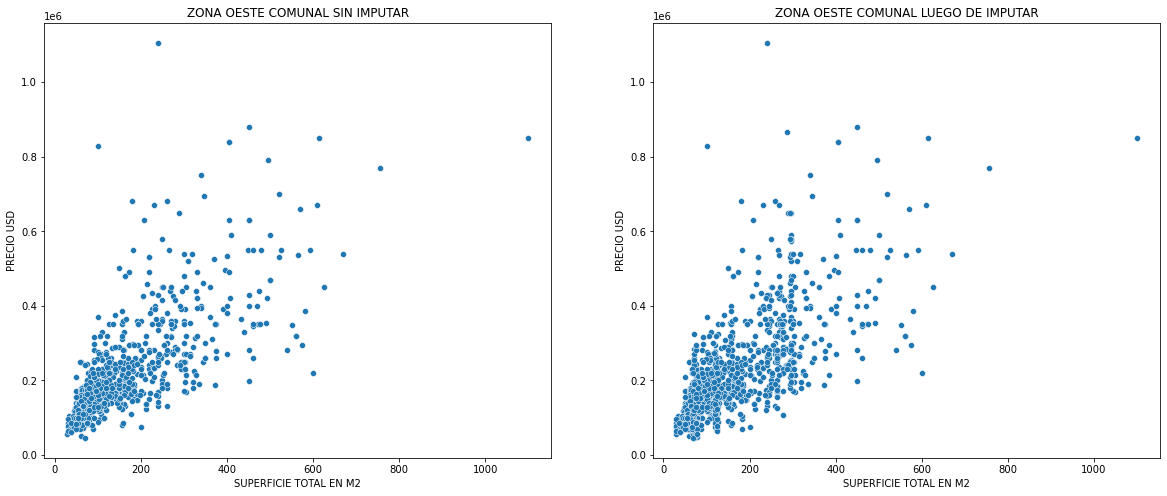

In [385]:
fig,ax = plt.subplots(ncols=2, figsize=(20,8))

g1 = sns.scatterplot(data = df[np.logical_and(df.state_name=='capitalfederal',df['ZONAS COMUNALES']=='ZONA OESTE COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD',ax = ax[1])
g2 = sns.scatterplot(data = df_sin_imputar[np.logical_and(df_sin_imputar.state_name=='capitalfederal',df_sin_imputar['ZONAS COMUNALES']=='ZONA OESTE COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD', ax=ax[0])

g1.set_title("ZONA OESTE COMUNAL LUEGO DE IMPUTAR")
g2.set_title("ZONA OESTE COMUNAL SIN IMPUTAR")

plt.show()

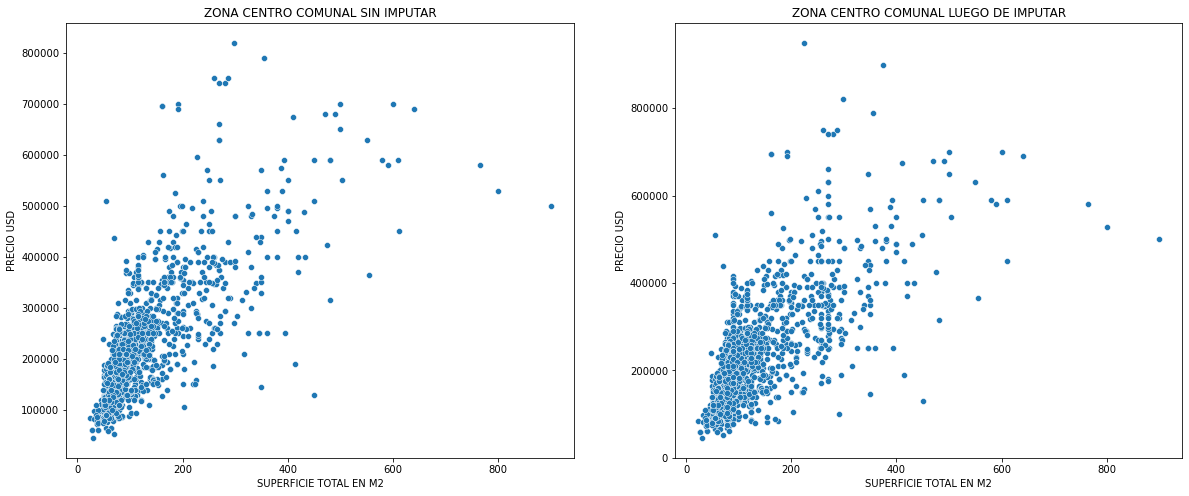

In [386]:
fig,ax = plt.subplots(ncols=2, figsize=(20,8))

g1 = sns.scatterplot(data = df[np.logical_and(df.state_name=='capitalfederal',df['ZONAS COMUNALES']=='ZONA CENTRO COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD',ax = ax[1])
g2 = sns.scatterplot(data = df_sin_imputar[np.logical_and(df_sin_imputar.state_name=='capitalfederal',df_sin_imputar['ZONAS COMUNALES']=='ZONA CENTRO COMUNAL')], x='SUPERFICIE TOTAL EN M2', y='PRECIO USD', ax=ax[0])

g1.set_title("ZONA CENTRO COMUNAL LUEGO DE IMPUTAR")
g2.set_title("ZONA CENTRO COMUNAL SIN IMPUTAR")

plt.show()

#### **No parece haber grandes cambios luego de la imputacion, por lo que vamos a adoptarla**